In [220]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from datetime import datetime
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import tensorflow as tf
import distutils as _distutils
from tensorflow.keras.models import Sequential
import tensorflow_datasets as tfds
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional #Deep learning
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
import shap

CPU times: total: 0 ns
Wall time: 999 µs


In [221]:
pd.set_option('display.max_columns', None) #Display all columns
data = pd.read_csv(r"E:\DataScientist_01_Assessment.csv") # Read the data into a DataFrame

In [222]:
data.head()

District    Cluster    Village        HouseHoldID  HouseholdSize  TimeToOPD  \
0  Kanungu  Rutendere   Kangyeyo  KAN-KAN-FER-K1768              3         60   
1  Kanungu    Kihanda  Omurwambu  KAN-OMU-KAN-K4711              3        120   
2  Kanungu   Bujengwe     Byumba  KAN-BYU-ANN-K4055              2         40   
3  Kanungu   Bujengwe     Byumba  KAN-BYU-YUS-K4026              8         15   
4  Kanungu   Bujengwe     Kazahi  KAN-KAZ-FAU-K2057              5        120   

   TimeToWater  AgricultureLand  Season1CropsPlanted  Season2CropsPlanted  \
0         35.0             0.25                    0                    6   
1         10.0             1.00                    2                    3   
2         10.0              NaN                    3                    3   
3         40.0             1.00                    2                    4   
4         51.0             1.00                    2                    2   

   PerennialCropsGrown  VSLA_Profits  VSLA_Profits.1  Season1VegetableIncome  \
0                    1             0        0.000000                0.000000   
1                    3             0        0.000000                0.000000   
2                    2             0        0.000000                0.000000   
3                    4         20000        4.481111                0.000000   
4                    1             0        0.000000               22.405556   

   Season2VegatableIncome  VegetableIncome  Season1VegetableValue  \
0                     0.0         0.000000               3.920972   
1                     0.0         0.000000               0.000000   
2                     0.0         0.000000               0.672167   
3                     0.0         0.000000               6.945722   
4                     0.0        22.405556              38.089444   

   Season2VegetableValue  SeasonalVegetableValue  FormalEmployment  \
0               5.601389                9.522361               0.0   
1               1.344333                1.344333               0.0   
2               1.792444                2.464611               0.0   
3               0.000000                6.945722               0.0   
4               0.000000               38.089444               0.0   

   PersonalBusinessAndSelfEmployment  CasualLabour  RemittancesAndGifts  \
0                           0.000000     44.811111            33.608333   
1                           0.000000      0.000000             6.721667   
2                           0.000000     91.414667            26.886667   
3                           4.481111      0.000000             0.000000   
4                           0.000000      0.000000           123.230556   

   RentIncome  Season1CropIncome  Season2CropIncome  SeasonalCropIncome  \
0         0.0           0.000000          45.931389           45.931389   
1         0.0           0.000000          13.219278           13.219278   
2         0.0          43.018667          21.285278           64.303944   
3         0.0         123.230556           3.360833          126.591389   
4         0.0          22.405556           0.896222           23.301778   

   PerenialCropIncome  LivestockIncome  Season1AgricValue  Season2AgricValue  \
0           31.367778              0.0           3.920972         115.500639   
1          103.065556              0.0          57.694306          75.058611   
2           14.787667              0.0          89.398167          55.005639   
3           27.782889              0.0         175.077011          87.381667   
4            0.000000              0.0          67.664778          35.624833   

   SeasonalAgricValue  PerennialAgricValue  AgricValue  \
0          119.421611           109.787222  229.208833   
1          132.752917           170.282222  303.035139   
2          144.403806            34.952667  179.356472   
3          262.458678            62.735556  325.194233   
4          103.289611           197.168889  300.458500   

   

In [223]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 3897
Number of Columns 75


In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 75 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   District                                  3897 non-null   object 
 1   Cluster                                   3897 non-null   object 
 2   Village                                   3897 non-null   object 
 3   HouseHoldID                               3897 non-null   object 
 4   HouseholdSize                             3897 non-null   int64  
 5   TimeToOPD                                 3897 non-null   int64  
 6   TimeToWater                               3897 non-null   float64
 7   AgricultureLand                           3834 non-null   float64
 8   Season1CropsPlanted                       3897 non-null   int64  
 9   Season2CropsPlanted                       3897 non-null   int64  
 10  PerennialCropsGrown                 

In [225]:
#Checking null values
pd.set_option('display.max_columns', None)
data.iloc[:, 0:29].isnull().sum()

District                              0
Cluster                               0
Village                               0
HouseHoldID                           0
HouseholdSize                         0
TimeToOPD                             0
TimeToWater                           0
AgricultureLand                      63
Season1CropsPlanted                   0
Season2CropsPlanted                   0
PerennialCropsGrown                   0
VSLA_Profits                          0
VSLA_Profits.1                        0
Season1VegetableIncome                0
Season2VegatableIncome                0
VegetableIncome                       0
Season1VegetableValue                 0
Season2VegetableValue                 0
SeasonalVegetableValue                0
FormalEmployment                      0
PersonalBusinessAndSelfEmployment     0
CasualLabour                          0
RemittancesAndGifts                   0
RentIncome                            0
Season1CropIncome                     0


In [226]:
#Checking %age of null values compared to the whole dataset
data.iloc[:, 0:29].isnull().sum()*100 / len(data)

District                             0.000000
Cluster                              0.000000
Village                              0.000000
HouseHoldID                          0.000000
HouseholdSize                        0.000000
TimeToOPD                            0.000000
TimeToWater                          0.000000
AgricultureLand                      1.616628
Season1CropsPlanted                  0.000000
Season2CropsPlanted                  0.000000
PerennialCropsGrown                  0.000000
VSLA_Profits                         0.000000
VSLA_Profits.1                       0.000000
Season1VegetableIncome               0.000000
Season2VegatableIncome               0.000000
VegetableIncome                      0.000000
Season1VegetableValue                0.000000
Season2VegetableValue                0.000000
SeasonalVegetableValue               0.000000
FormalEmployment                     0.000000
PersonalBusinessAndSelfEmployment    0.000000
CasualLabour                      

In [227]:
#Checking null values, 30 t0 58  columns
pd.set_option('display.max_columns', None)
data.iloc[:, 29:58].isnull().sum()

Season1AgricValue                              0
Season2AgricValue                              0
SeasonalAgricValue                             0
PerennialAgricValue                            0
AgricValue                                     0
LivestockIncomeConsumed                        0
LivestockAssetValue                            0
HouseholdIcome                                 0
Consumption+Residues                           0
HHIncome+Consumption+Residues                  0
HHIncome+Consumption+Assets+Residues           0
Assets                                         0
Assets.1                                       0
HHIncome/Day                                   0
Consumption/Day                                0
HHIncome+Consumption+Residues/Day              0
HHIncome+Consumption+Assets+Residues/Day       0
hhh_sex                                        0
hhh_read_write                                 0
Material_walls                                 0
radios_owned        

In [228]:
#Checking %age of null values compared to the whole dataset
data.iloc[:, 29:58].isnull().sum()*100 / len(data)

Season1AgricValue                            0.000000
Season2AgricValue                            0.000000
SeasonalAgricValue                           0.000000
PerennialAgricValue                          0.000000
AgricValue                                   0.000000
LivestockIncomeConsumed                      0.000000
LivestockAssetValue                          0.000000
HouseholdIcome                               0.000000
Consumption+Residues                         0.000000
HHIncome+Consumption+Residues                0.000000
HHIncome+Consumption+Assets+Residues         0.000000
Assets                                       0.000000
Assets.1                                     0.000000
HHIncome/Day                                 0.000000
Consumption/Day                              0.000000
HHIncome+Consumption+Residues/Day            0.000000
HHIncome+Consumption+Assets+Residues/Day     0.000000
hhh_sex                                      0.000000
hhh_read_write              

In [229]:
#Checking null values, 30 t0 58  columns
pd.set_option('display.max_columns', None)
data.iloc[:, 58:75].isnull().sum()

daily_meals                         0
latrine_constructed                 0
tippy_tap_available                 0
soap_ash_available                  0
standard_hangline                   0
kitchen_house                       0
bathroom_constructed                0
swept_compound                      0
dish_rack_present                   0
composts                            0
non_bio_waste_mgt_present           0
apply_liquid_manure                 0
organic_pesticide_expenditure    3214
water_control_practise              0
soil_management                     0
food_banana_wilt_diseases        1348
postharvest_food_storage            0
dtype: int64

In [230]:

data.iloc[:, 58:75].isnull().sum()*100 / len(data)

daily_meals                       0.000000
latrine_constructed               0.000000
tippy_tap_available               0.000000
soap_ash_available                0.000000
standard_hangline                 0.000000
kitchen_house                     0.000000
bathroom_constructed              0.000000
swept_compound                    0.000000
dish_rack_present                 0.000000
composts                          0.000000
non_bio_waste_mgt_present         0.000000
apply_liquid_manure               0.000000
organic_pesticide_expenditure    82.473698
water_control_practise            0.000000
soil_management                   0.000000
food_banana_wilt_diseases        34.590711
postharvest_food_storage          0.000000
dtype: float64

In [231]:
# Filter columns where null values is greater than 0
null_percentage = data.isnull().sum() * 100 / len(data)
columns_with_null_values = null_percentage[null_percentage > 0].index
print(columns_with_null_values)

Index(['AgricultureLand', 'business_number', 'Loan_from',
       'organic_pesticide_expenditure', 'food_banana_wilt_diseases'],
      dtype='object')


In [232]:
#Call only columns with null values
columns_with_null_data = data[columns_with_null_values]
columns_with_null_data.head()

AgricultureLand business_number Loan_from  organic_pesticide_expenditure  \
0             0.25               0       NaN                            NaN   
1             1.00               0       NaN                            NaN   
2              NaN               0         7                            NaN   
3             1.00             NaN         7                            NaN   
4             1.00             NaN       NaN                            NaN   

  food_banana_wilt_diseases  
0                       NaN  
1                         2  
2                       1 2  
3                         2  
4                       NaN

In [233]:
columns_with_null_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AgricultureLand                3834 non-null   float64
 1   business_number                3872 non-null   object 
 2   Loan_from                      863 non-null    object 
 3   organic_pesticide_expenditure  683 non-null    float64
 4   food_banana_wilt_diseases      2549 non-null   object 
dtypes: float64(2), object(3)
memory usage: 152.4+ KB


In [234]:
#Filling Missing Values, Mean and mode Used
data['AgricultureLand'] = data['AgricultureLand'].fillna(value=data['AgricultureLand'].mean())
data['business_number'] = data['business_number'].fillna(value=data['business_number'].mode()[0])
data['Loan_from'] = data['Loan_from'].fillna(value=data['Loan_from'].mode()[0])
data['organic_pesticide_expenditure'] = data['organic_pesticide_expenditure'].fillna(value=data['organic_pesticide_expenditure'].mean())
data['food_banana_wilt_diseases'] = data['food_banana_wilt_diseases'].fillna(value=data['food_banana_wilt_diseases'].mode()[0])

In [235]:
#Checking null values again after transformations
pd.set_option('display.max_columns', None)
data.isnull().sum()

District                         0
Cluster                          0
Village                          0
HouseHoldID                      0
HouseholdSize                    0
                                ..
organic_pesticide_expenditure    0
water_control_practise           0
soil_management                  0
food_banana_wilt_diseases        0
postharvest_food_storage         0
Length: 75, dtype: int64

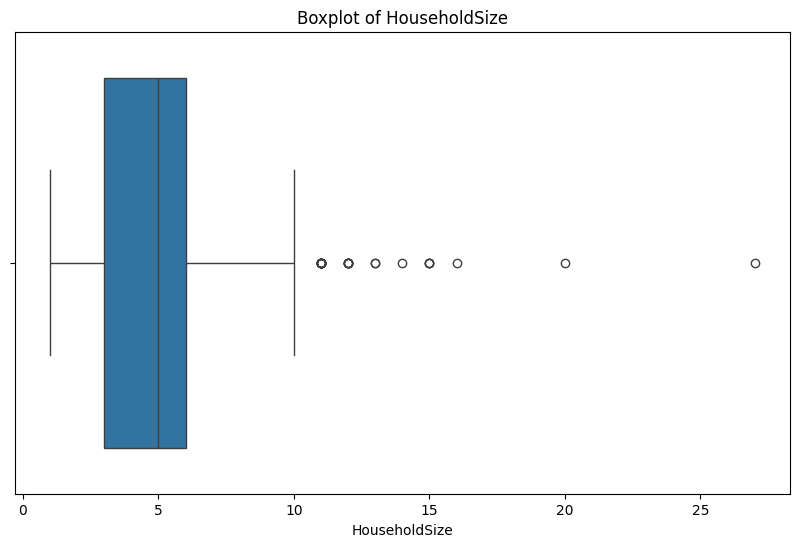

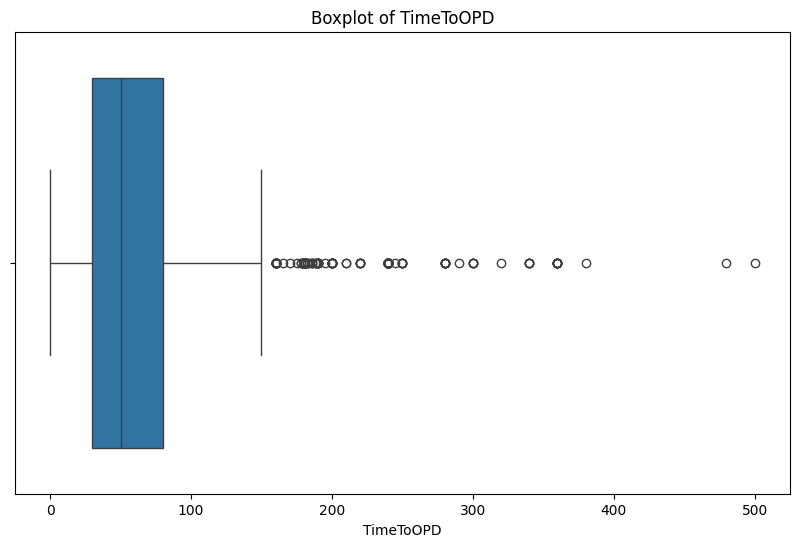

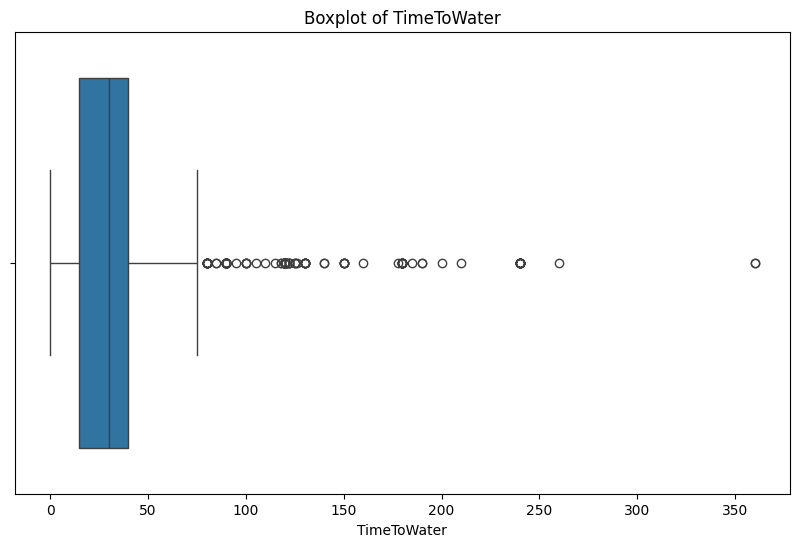

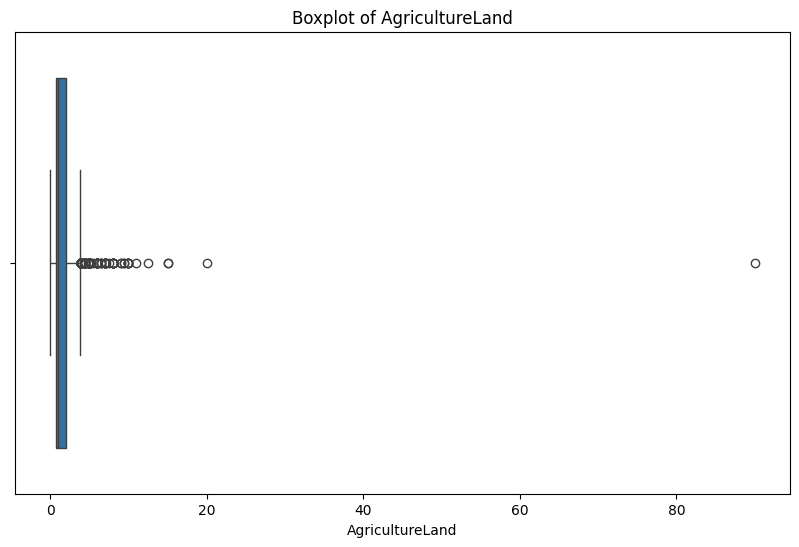

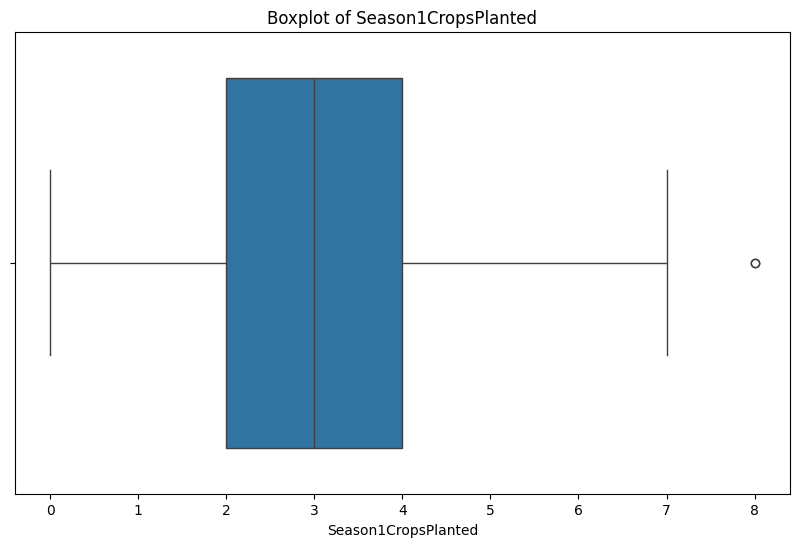

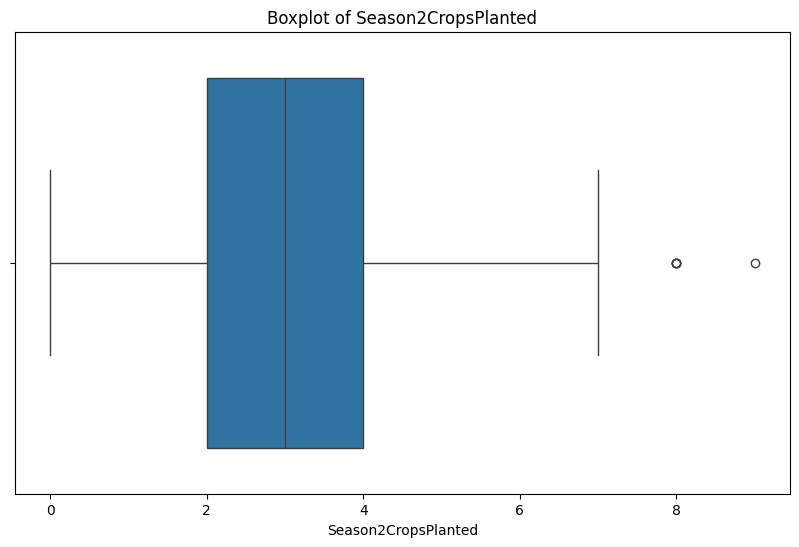

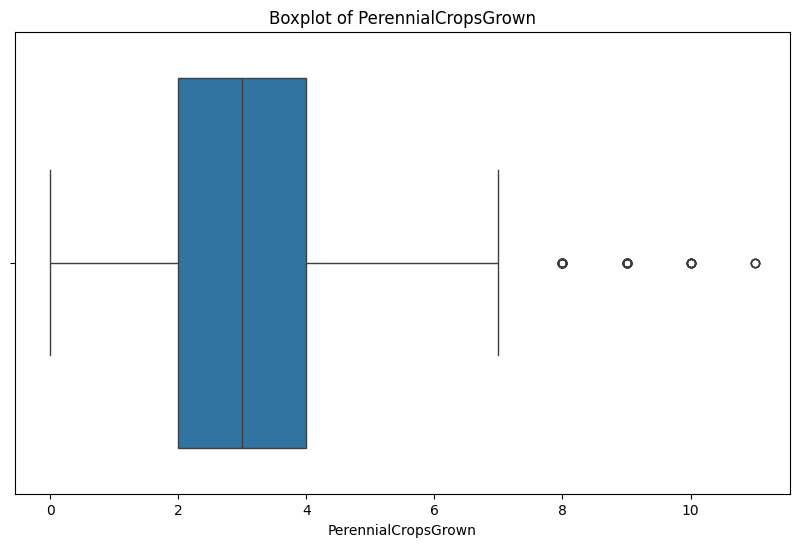

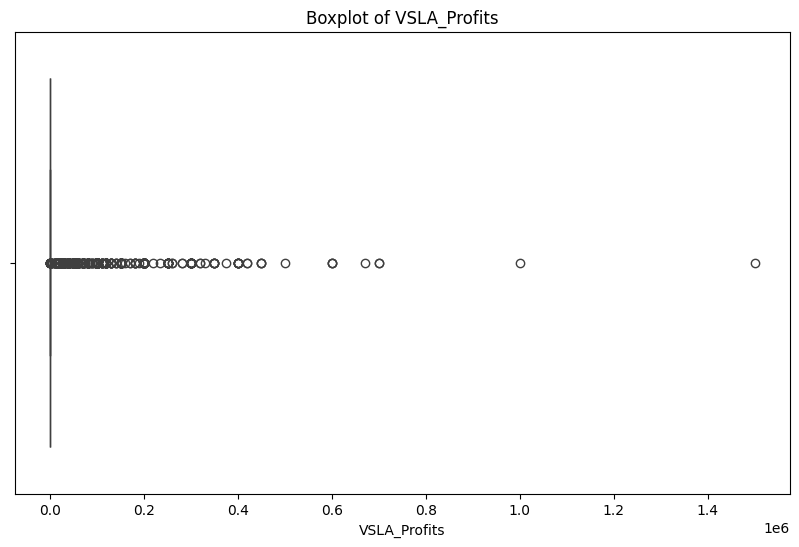

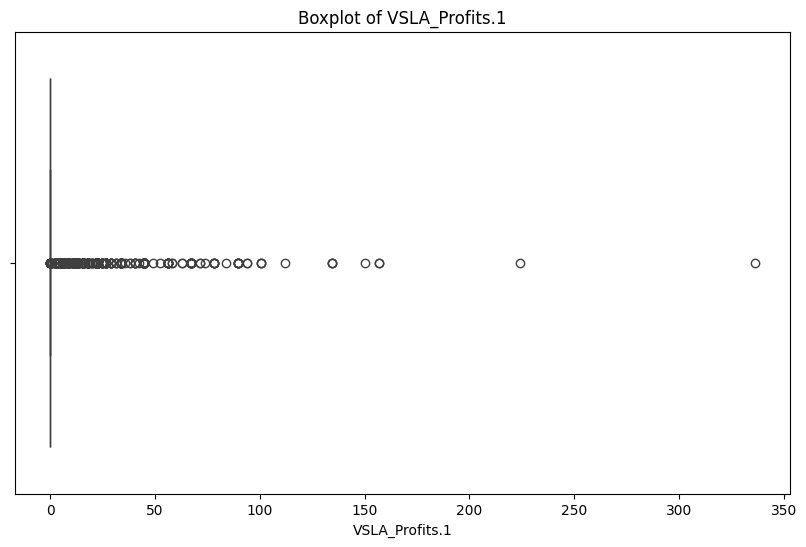

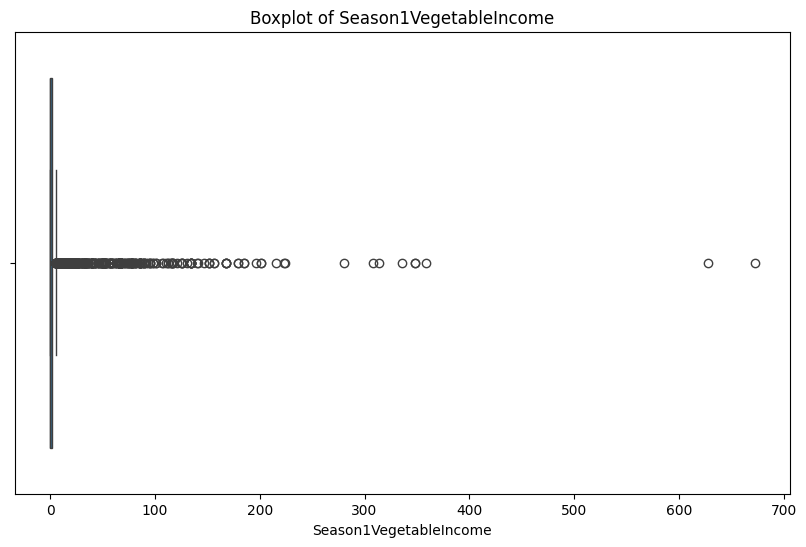

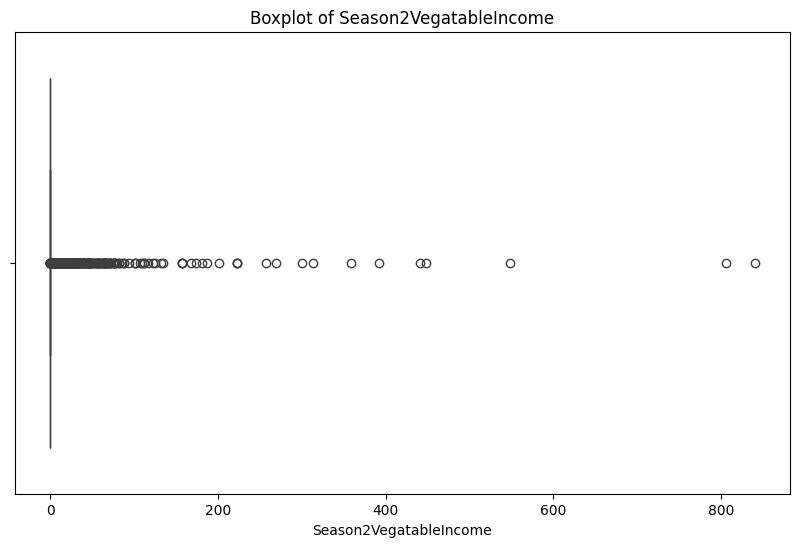

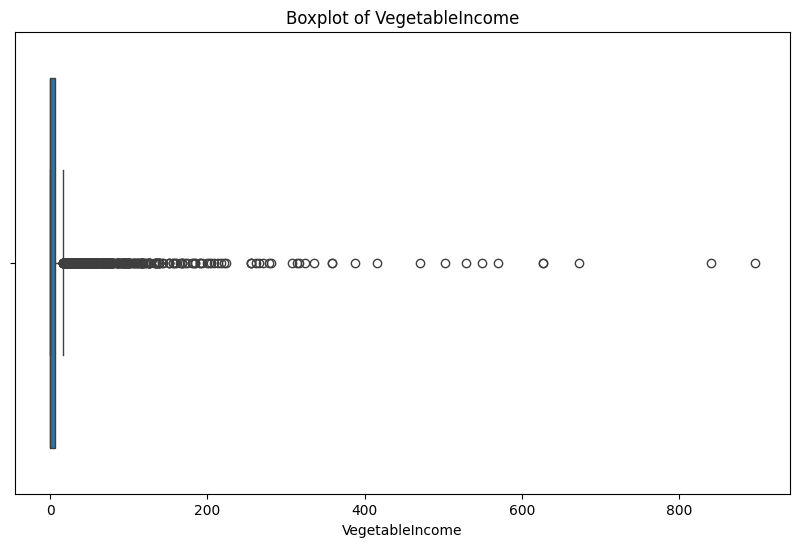

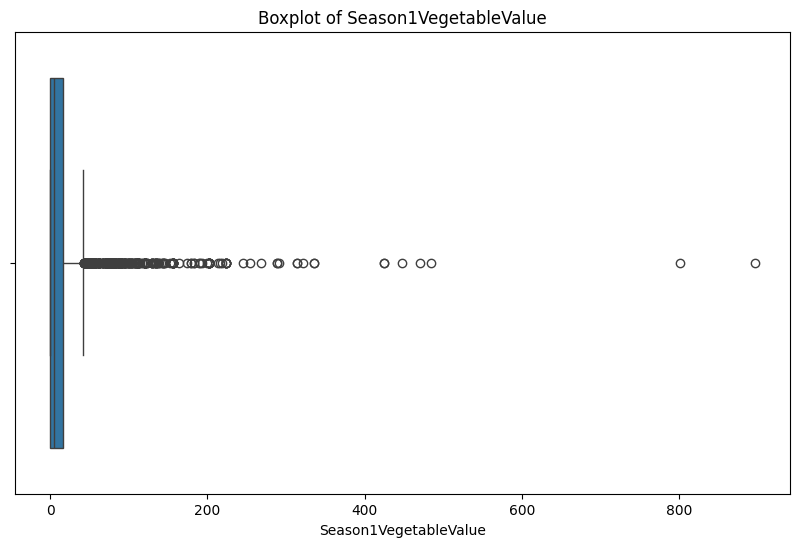

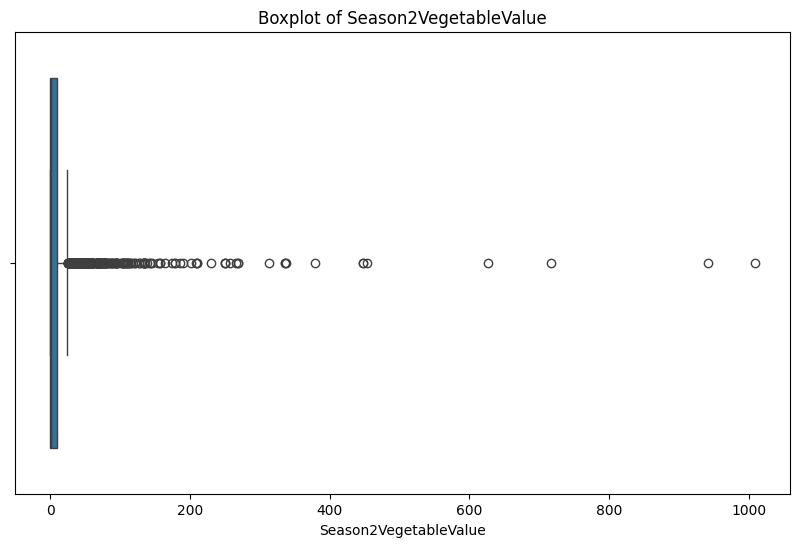

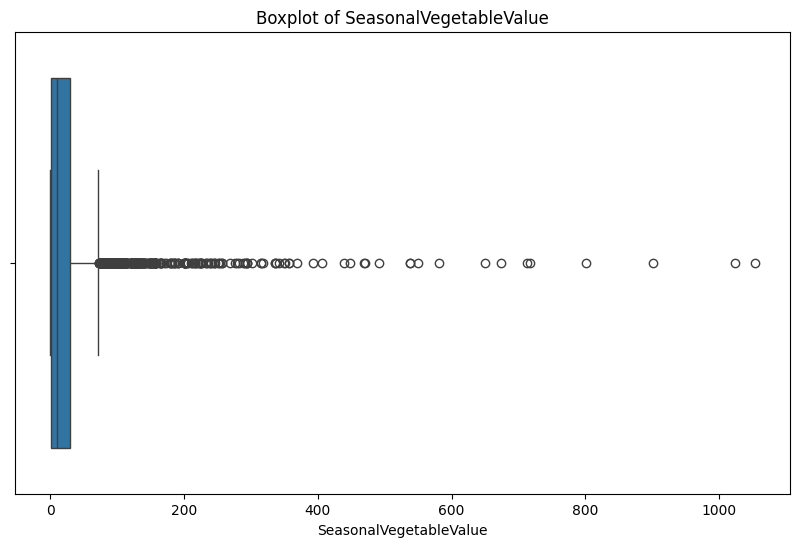

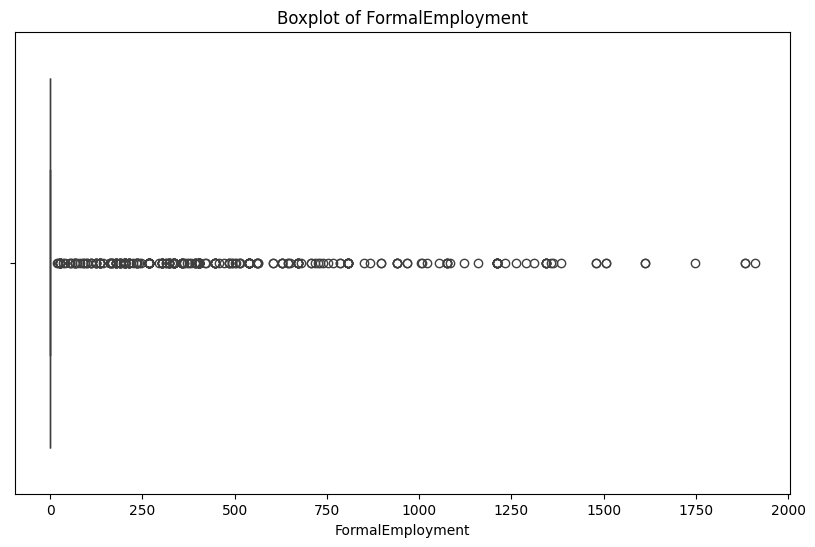

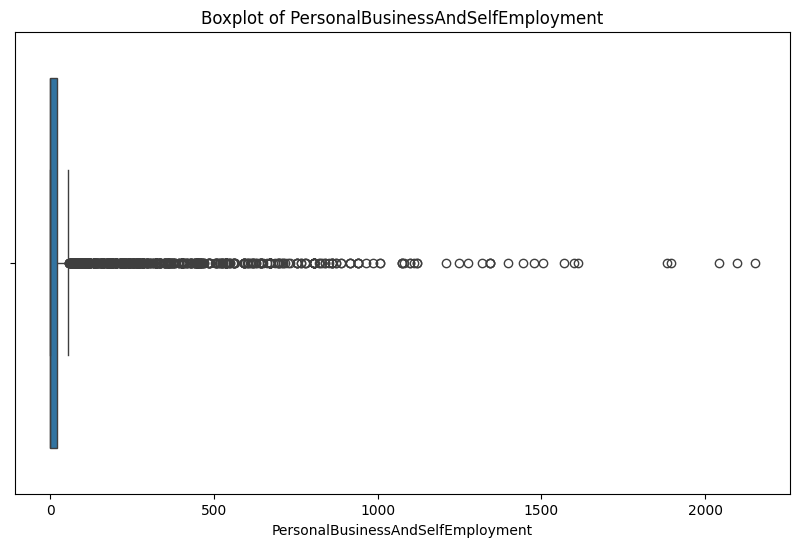

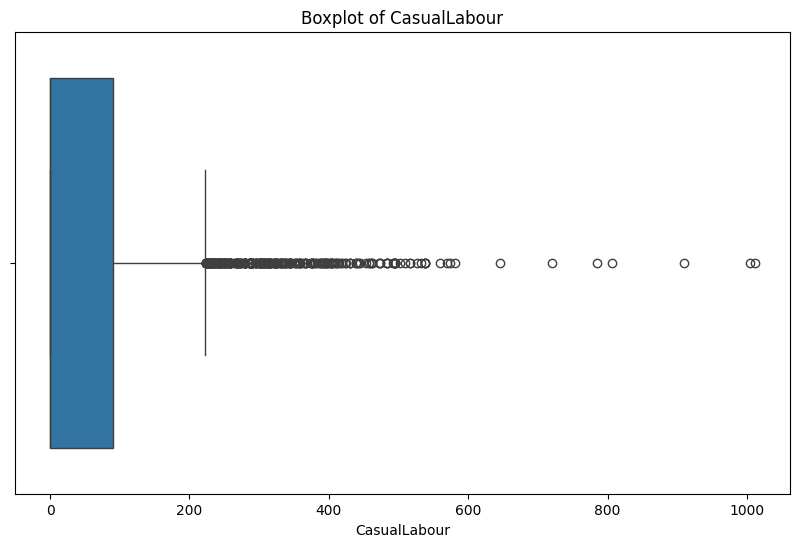

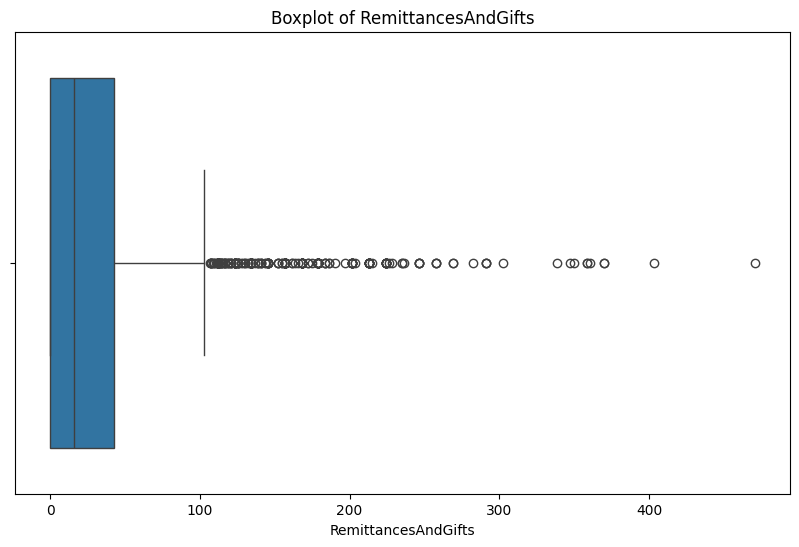

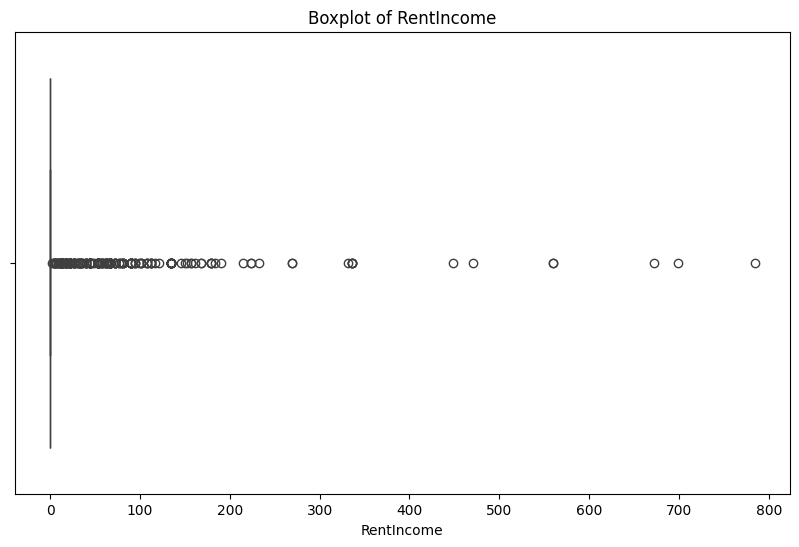

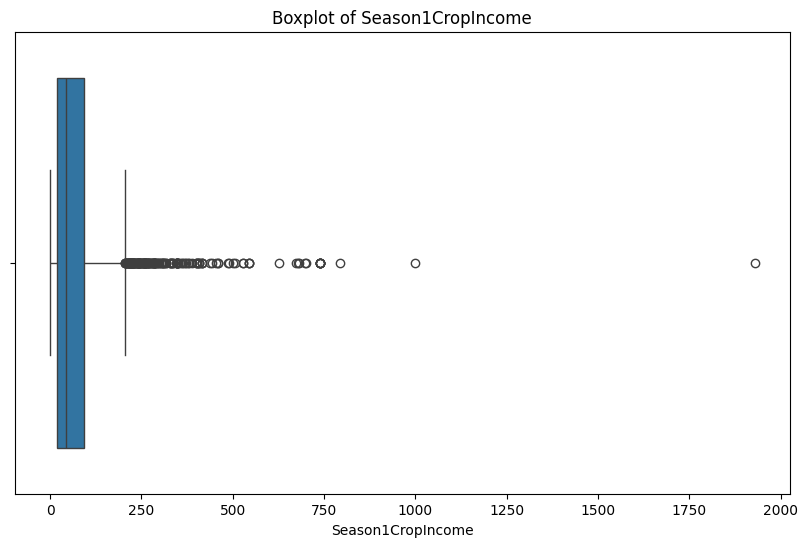

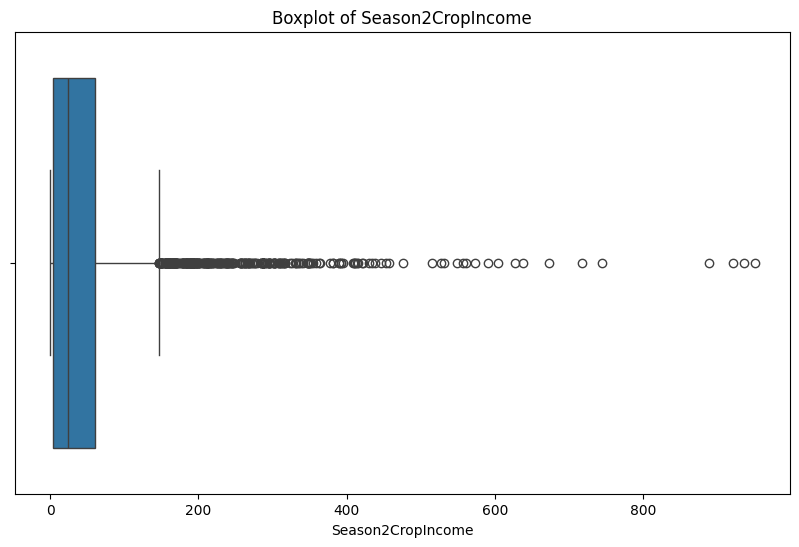

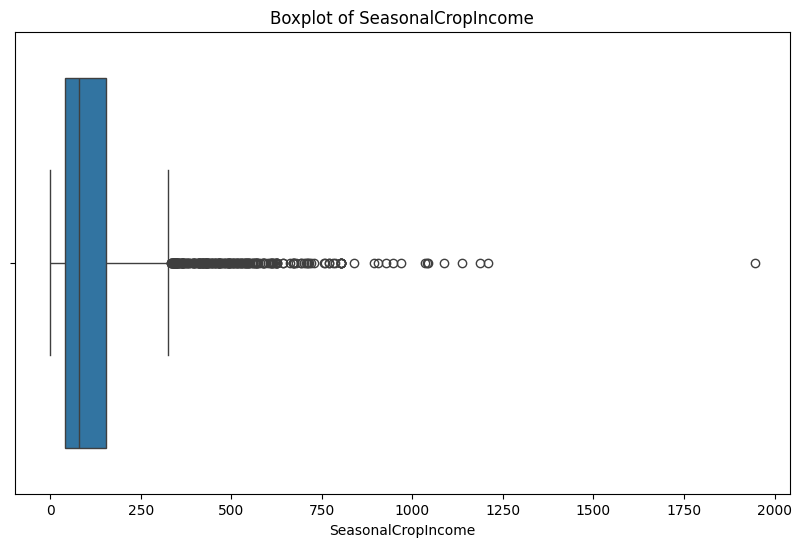

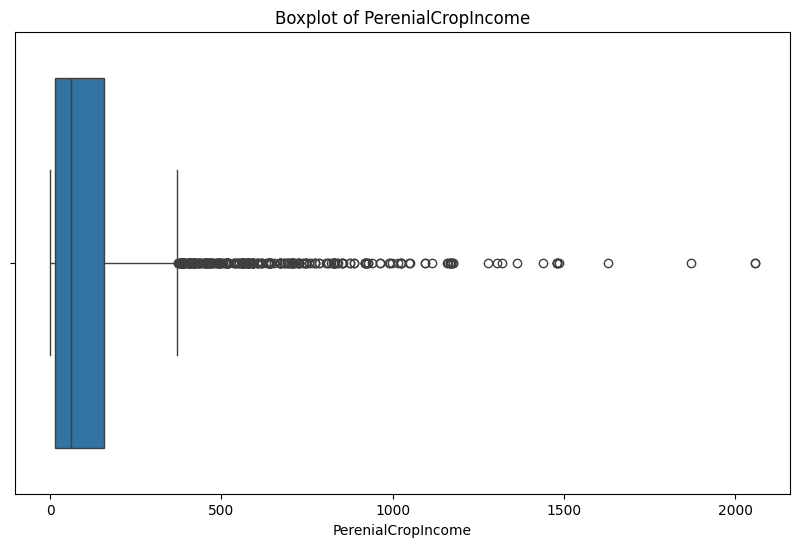

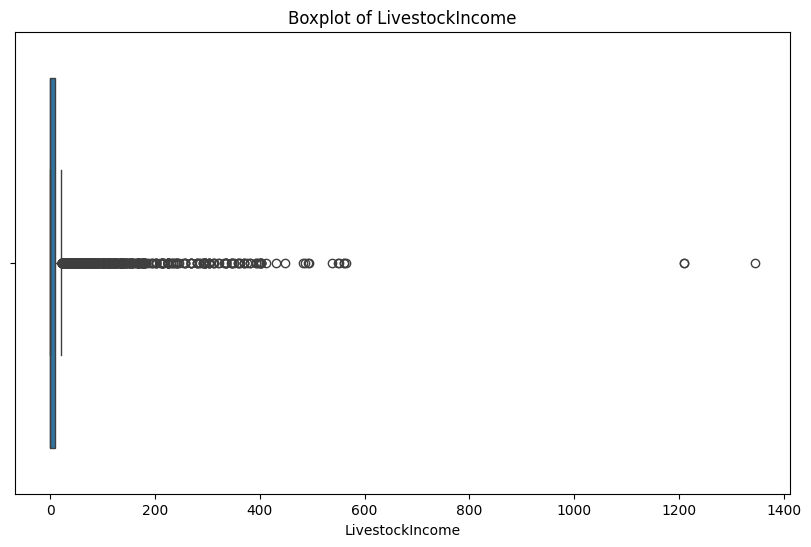

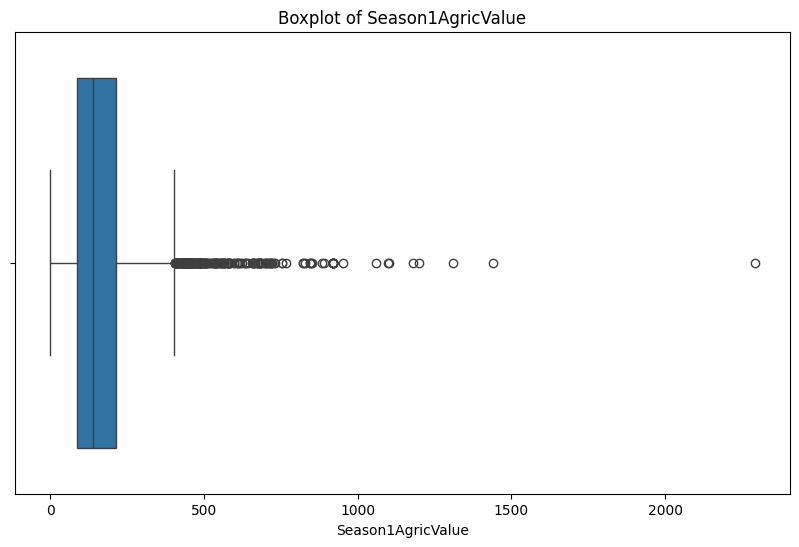

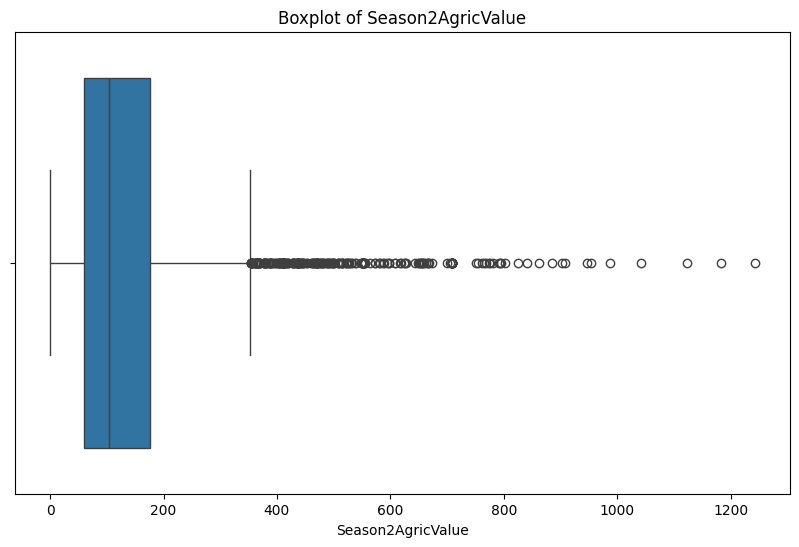

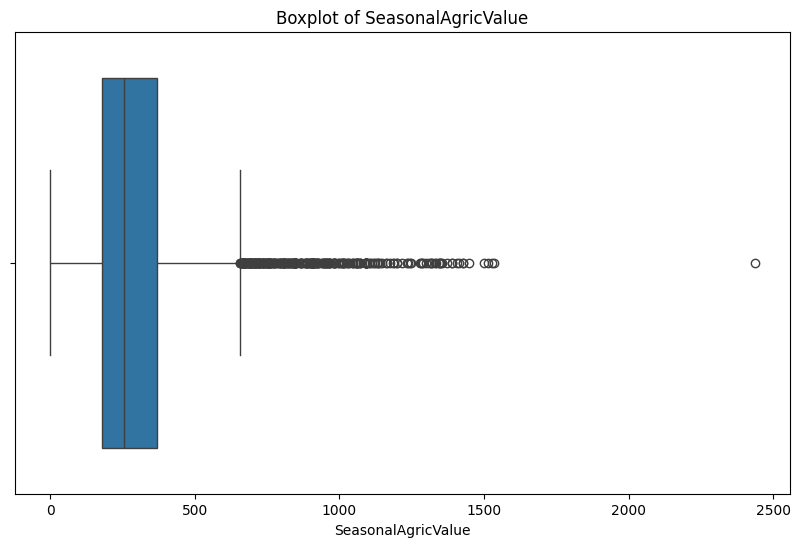

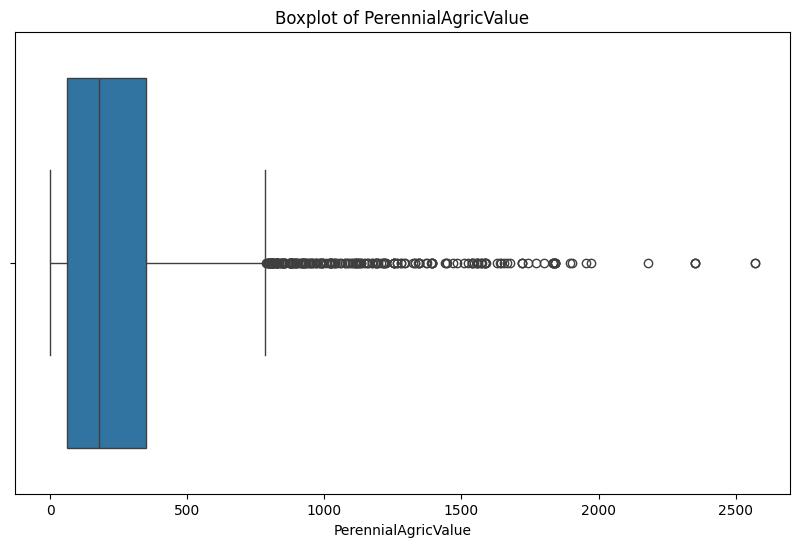

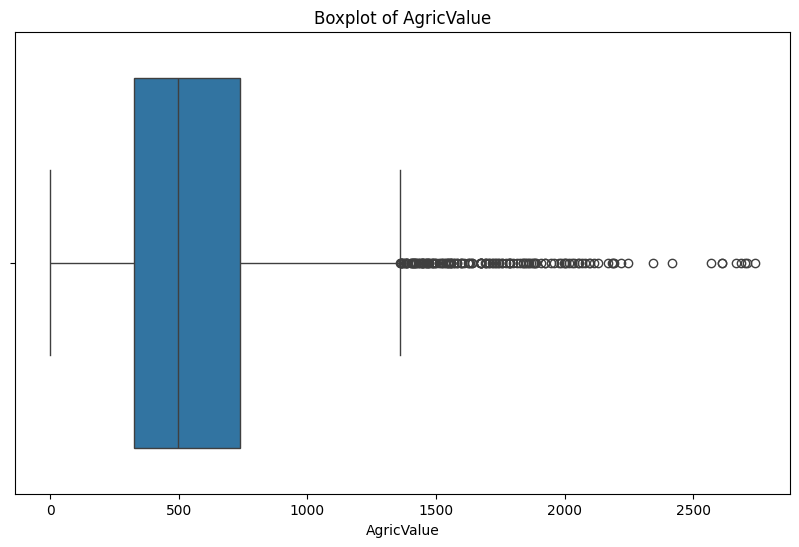

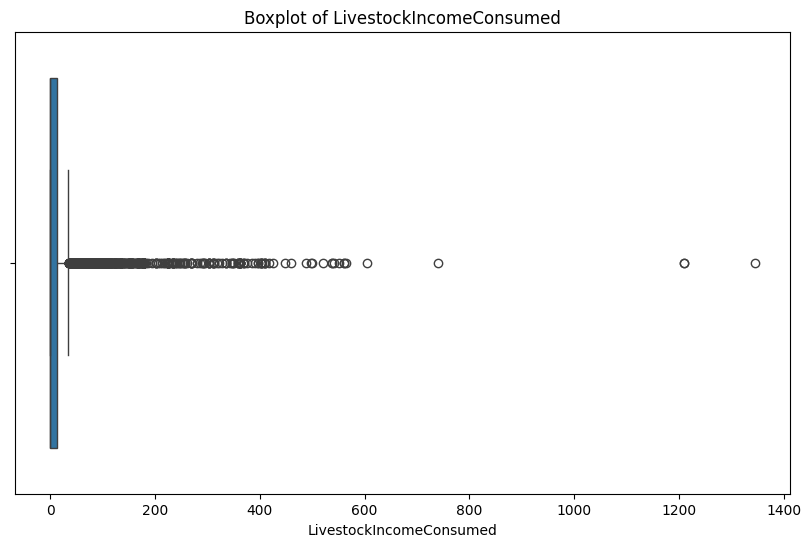

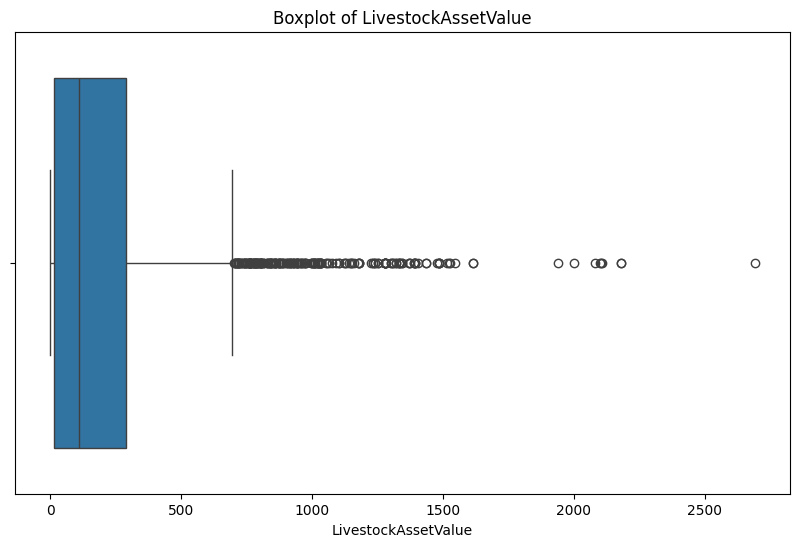

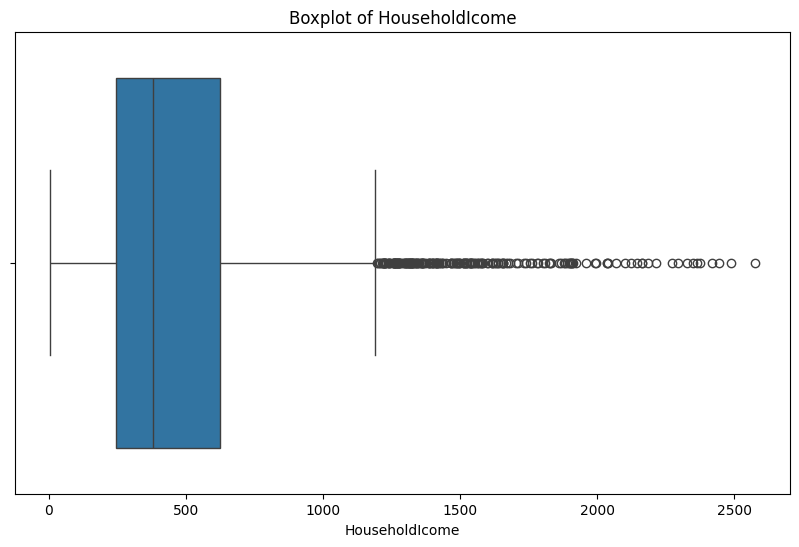

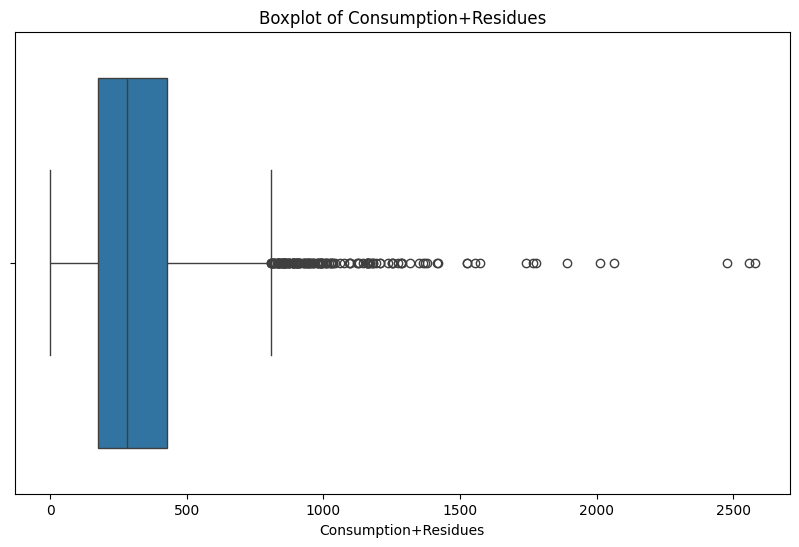

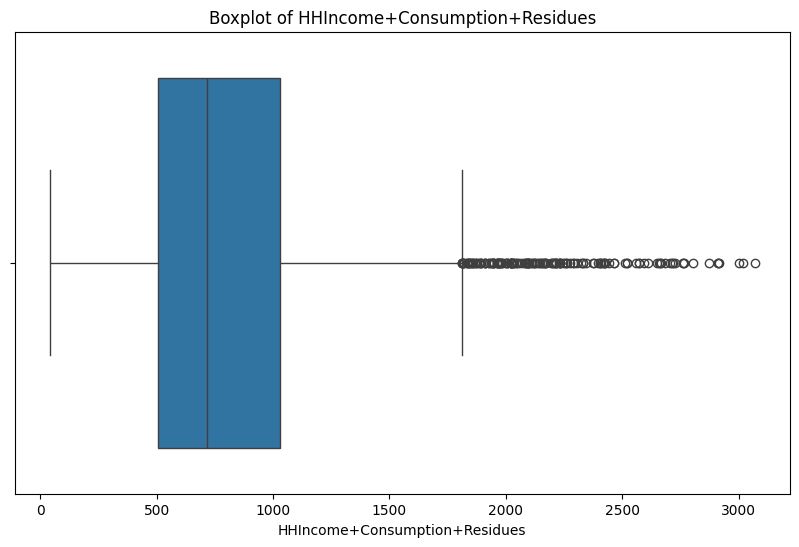

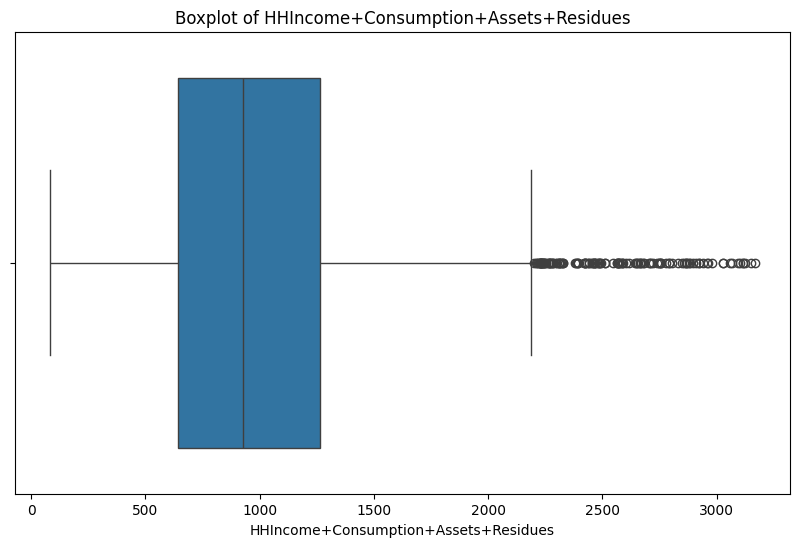

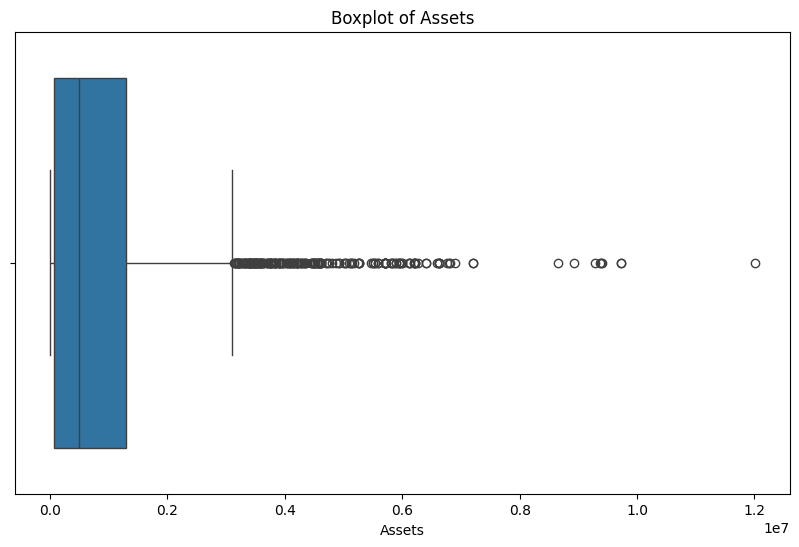

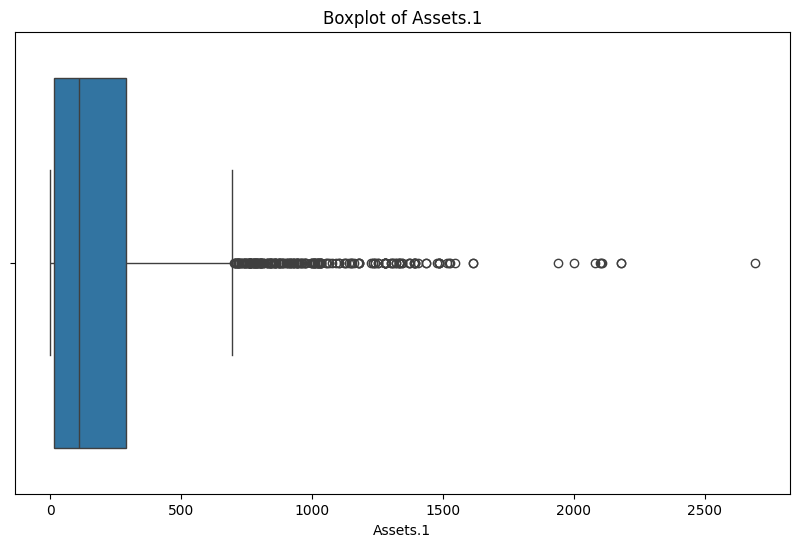

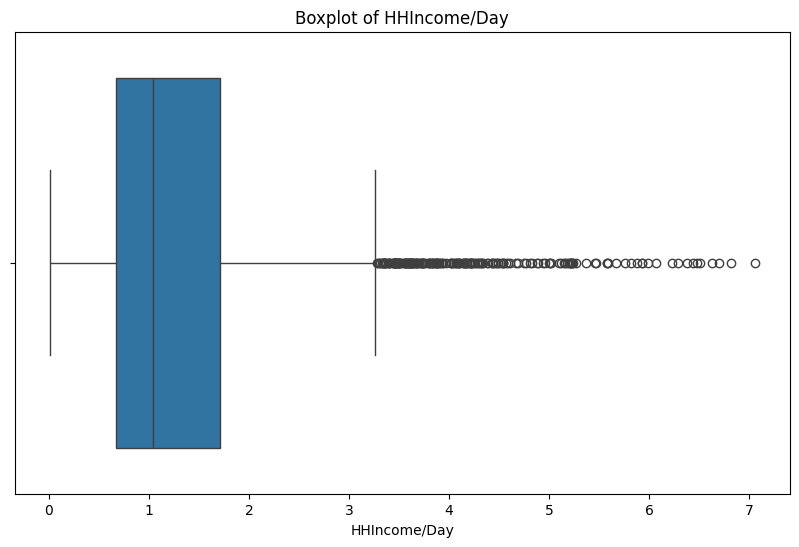

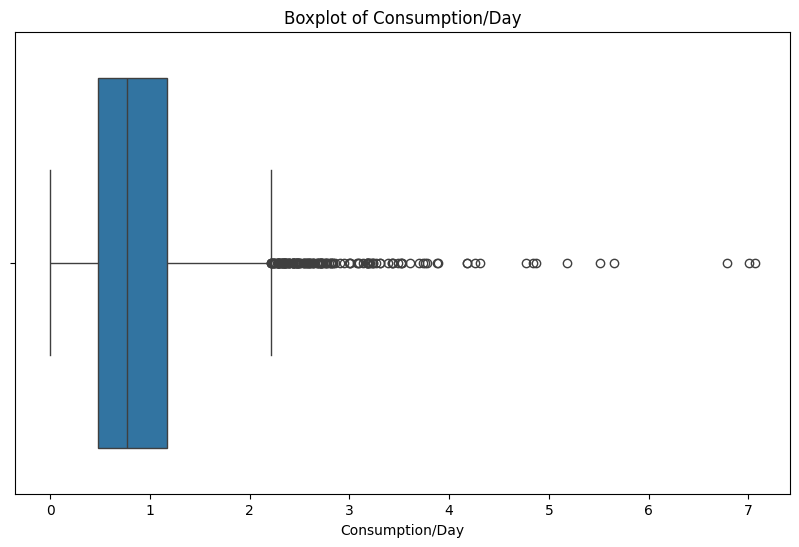

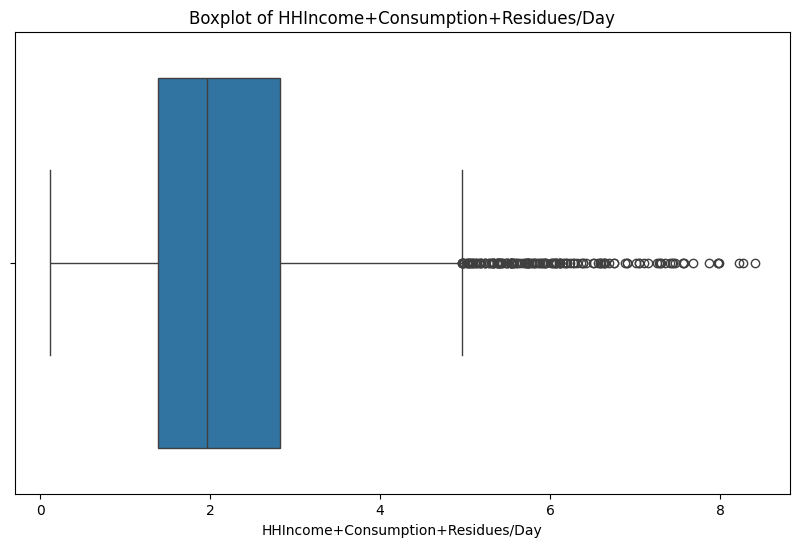

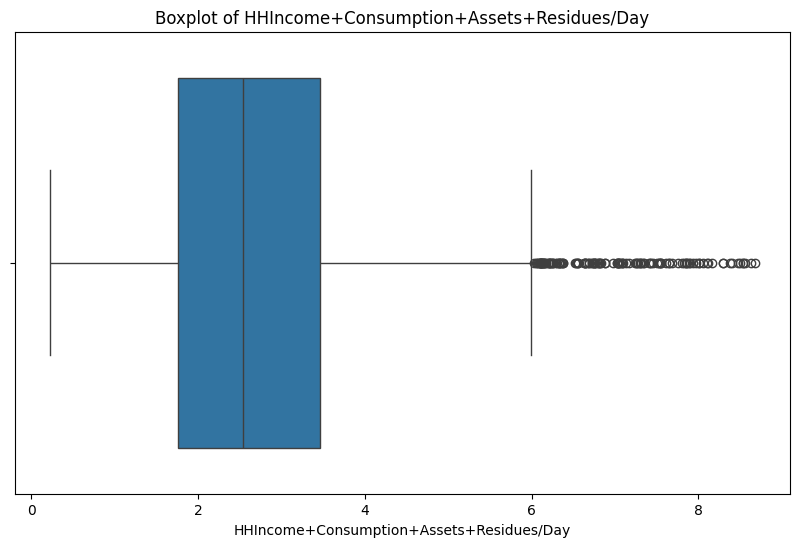

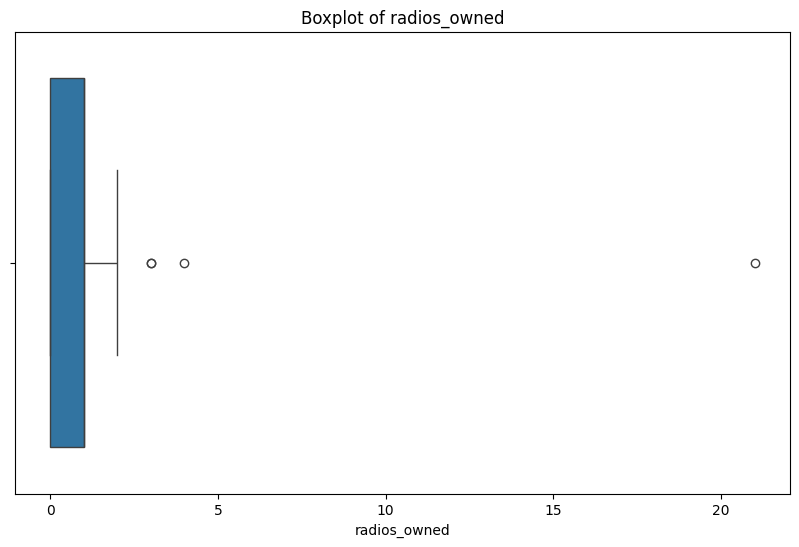

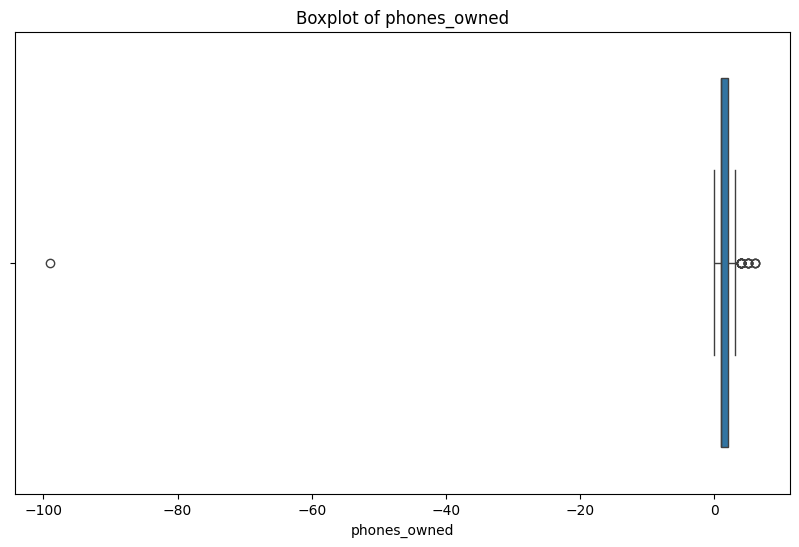

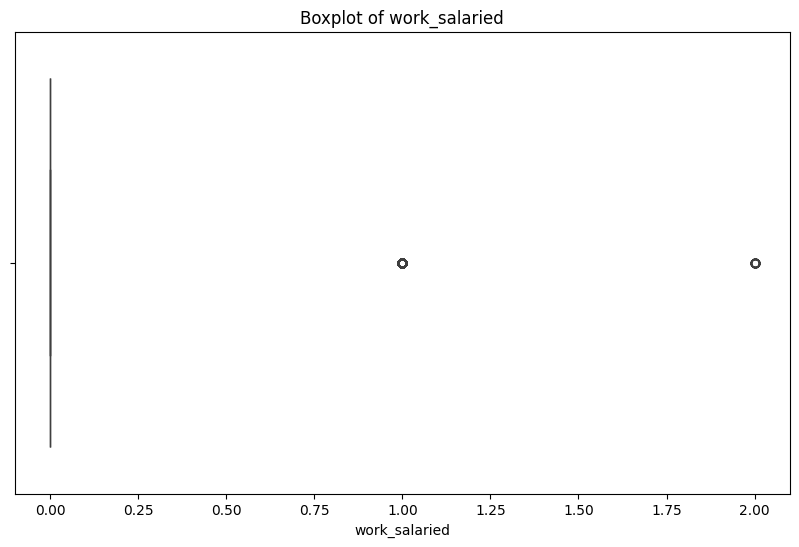

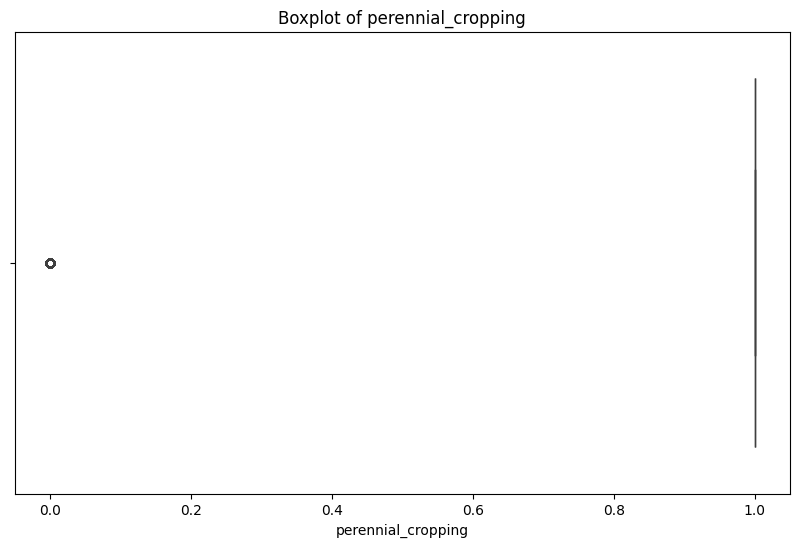

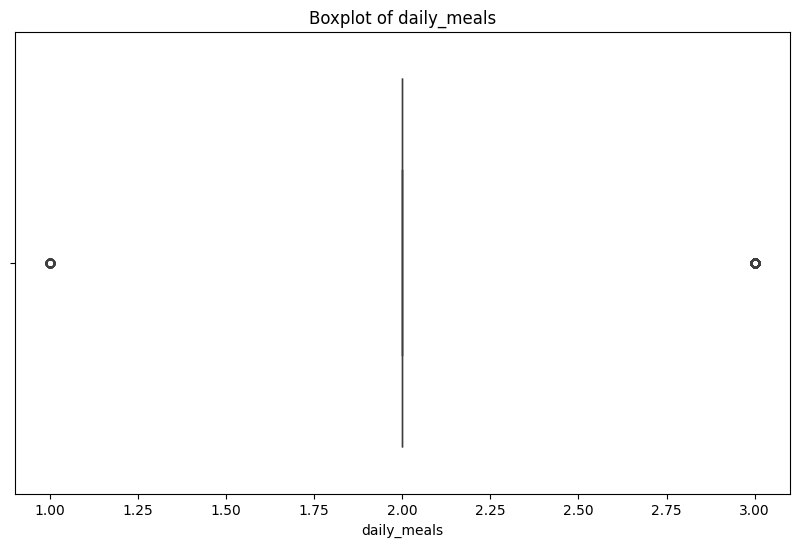

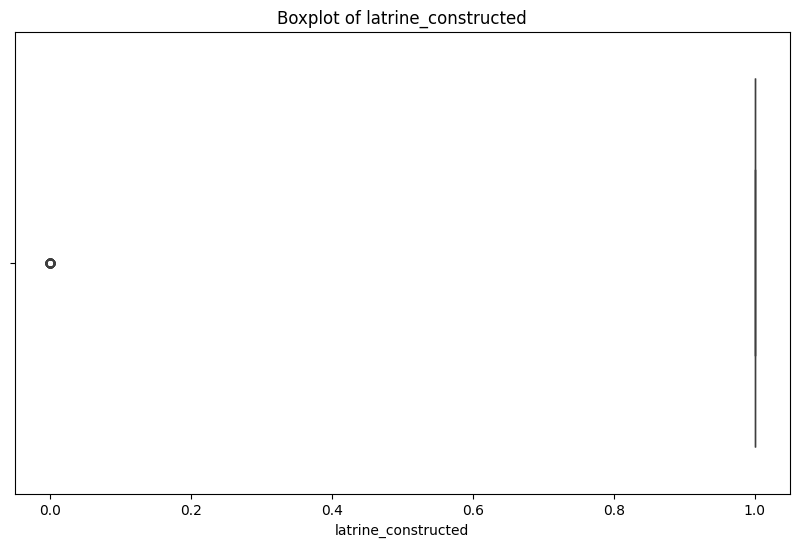

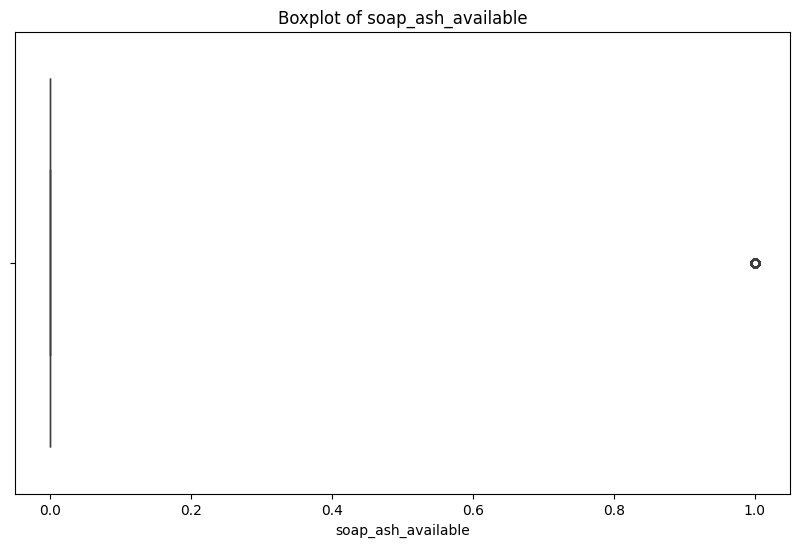

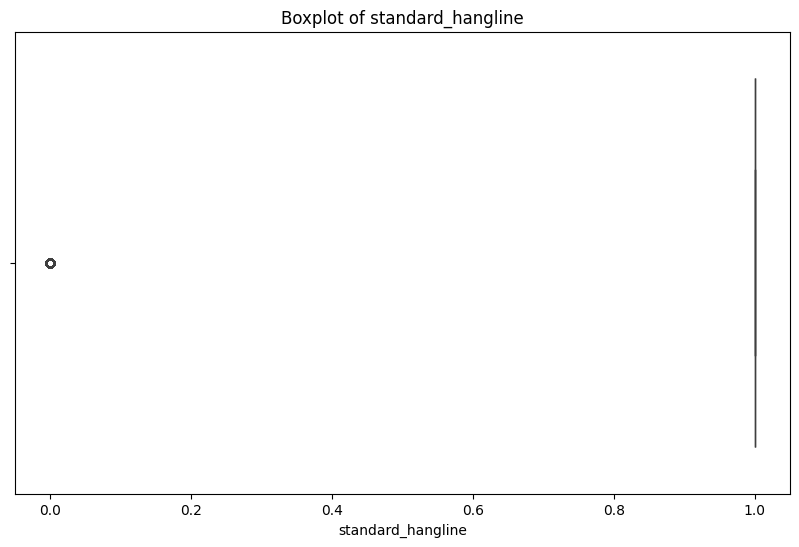

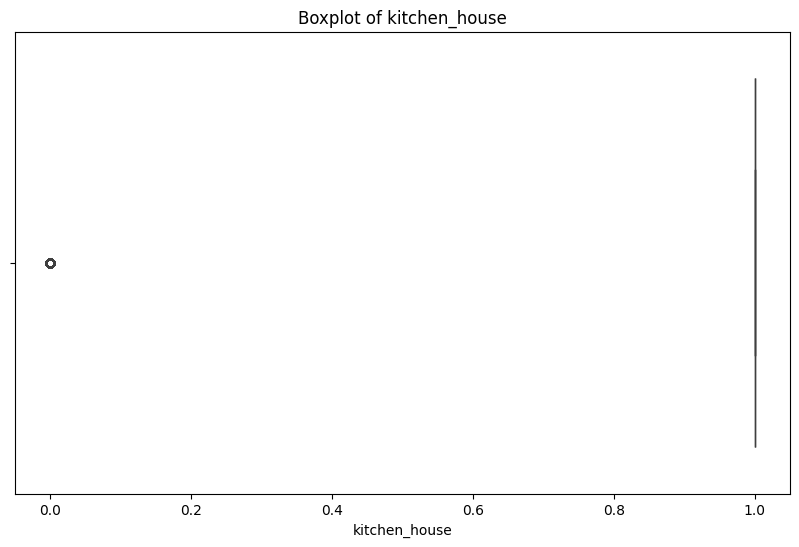

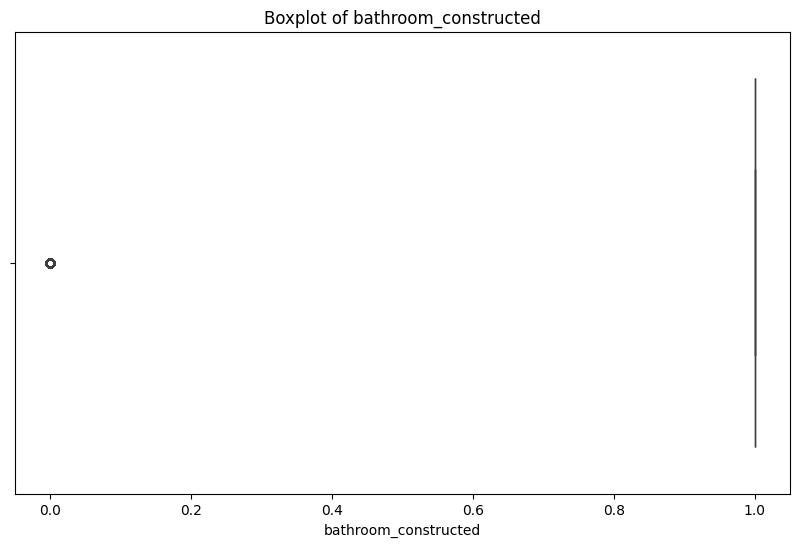

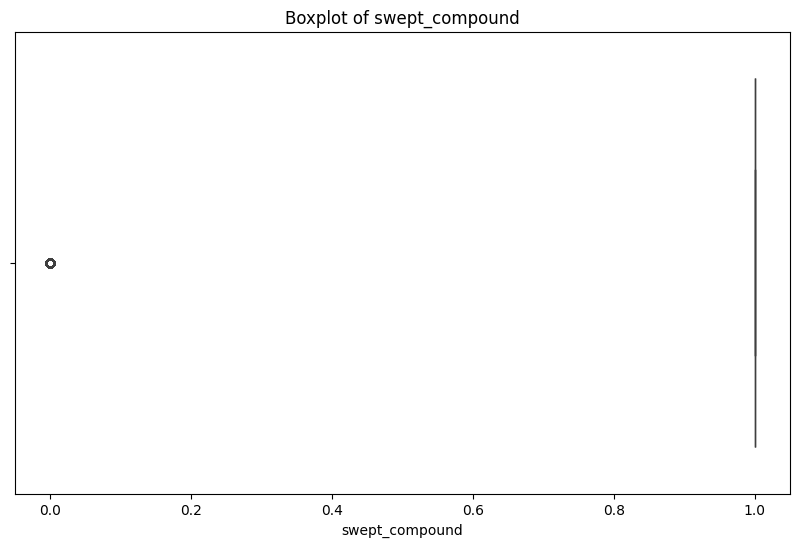

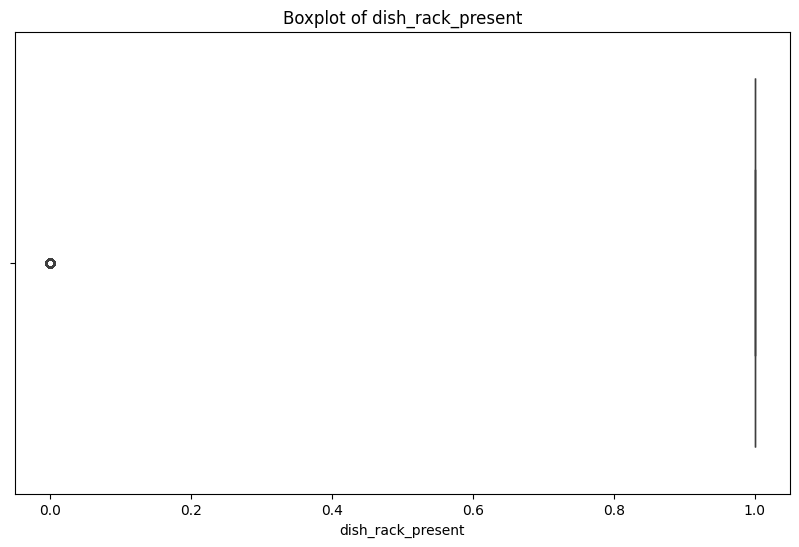

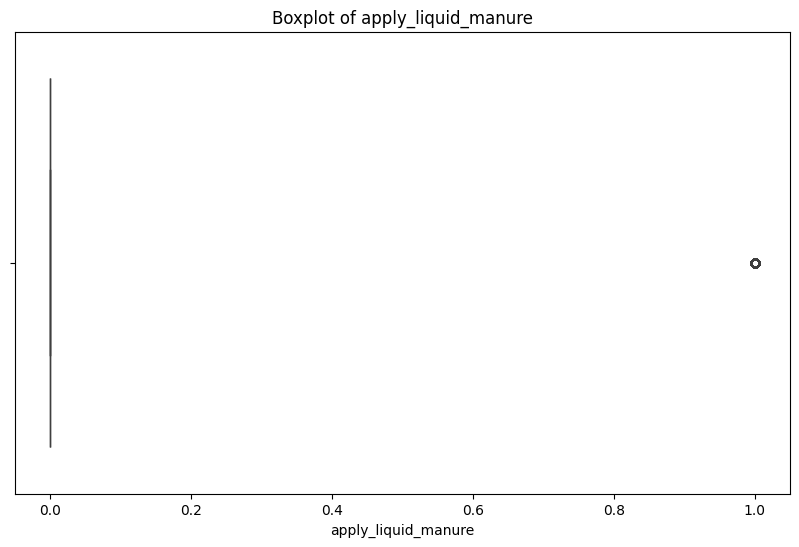

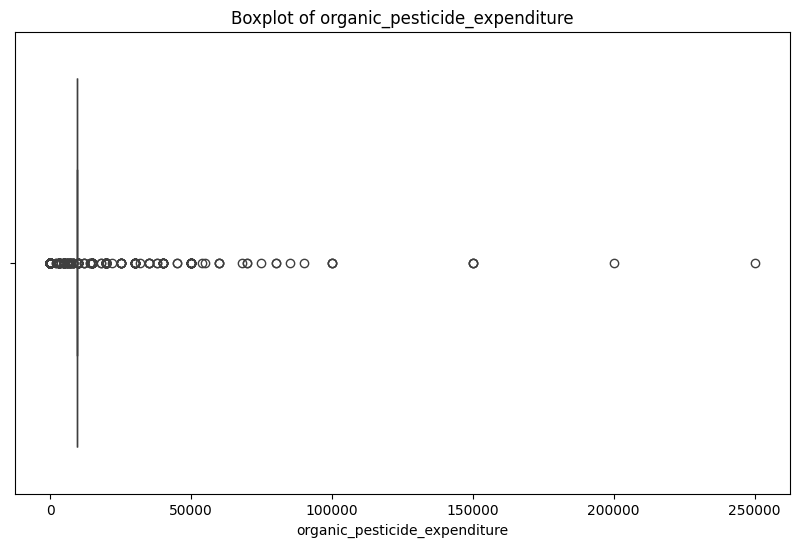

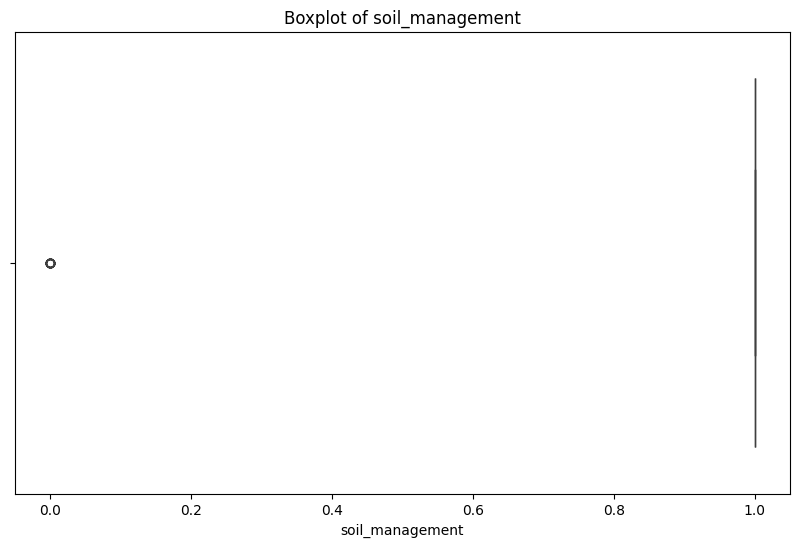

Column: HouseholdSize
IQR: 3.0
Lower Bound: -1.5
Upper Bound: 10.5
Number of Outliers: 31
Outliers: 
30     11
341    11
574    14
581    15
644    13
Name: HouseholdSize, dtype: int64

Column: TimeToOPD
IQR: 50.0
Lower Bound: -45.0
Upper Bound: 155.0
Number of Outliers: 304
Outliers: 
37     180
104    180
113    180
171    160
177    180
Name: TimeToOPD, dtype: int64

Column: TimeToWater
IQR: 25.0
Lower Bound: -22.5
Upper Bound: 77.5
Number of Outliers: 242
Outliers: 
10      80.0
91     120.0
102    190.0
143    180.0
163    100.0
Name: TimeToWater, dtype: float64

Column: AgricultureLand
IQR: 1.2
Lower Bound: -0.9999999999999998
Upper Bound: 3.8
Number of Outliers: 206
Outliers: 
17    4.0
23    6.0
33    4.0
49    4.0
52    4.0
Name: AgricultureLand, dtype: float64

Column: Season1CropsPlanted
IQR: 2.0
Lower Bound: -1.0
Upper Bound: 7.0
Number of Outliers: 2
Outliers: 
1697    8
2138    8
Name: Season1CropsPlanted, dtype: int64

Column: Season2CropsPlanted
IQR: 2.0
Lower Bound: -1

In [236]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns

# Dictionary to hold outliers for each column
outliers_dict = {}

# Loop through each numerical column
for col in numerical_cols:
    if data[col].isnull().any():
        # Skip columns with NaN values
        continue
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    q1 = np.quantile(data[col], 0.25)
    q3 = np.quantile(data[col], 0.75)
    
    # Calculate IQR
    iqr = q3 - q1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers
    outliers = data[col][(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    if not outliers.empty:
        outliers_dict[col] = {
            'IQR': iqr,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Number of Outliers': len(outliers),
            'Outliers': outliers
        }

        # Plot boxplot for outliers
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

# Print outliers details
for col, details in outliers_dict.items():
    print(f"Column: {col}")
    print(f"IQR: {details['IQR']}")
    print(f"Lower Bound: {details['Lower Bound']}")
    print(f"Upper Bound: {details['Upper Bound']}")
    print(f"Number of Outliers: {details['Number of Outliers']}")
    print(f"Outliers: \n{details['Outliers'].head()}\n")

In [237]:
#To remove the Outliers
numerical_cols = data.select_dtypes(include=[np.number]).columns

# Copy the dataset to avoid altering the original one
cleaned_data = data.copy()

# Loop through each numerical column to remove outliers
for col in numerical_cols:
    if cleaned_data[col].isnull().any():
        # Skip columns with NaN values
        continue
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    q1 = np.quantile(cleaned_data[col], 0.25)
    q3 = np.quantile(cleaned_data[col], 0.75)
    
    # Calculate IQR
    iqr = q3 - q1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Remove rows with outliers
    cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

# Check the shape of the cleaned data
print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {cleaned_data.shape}")

# Display the first few rows of the cleaned data
print(cleaned_data.head())

Original data shape: (3897, 75)
Cleaned data shape: (76, 75)
      District   Cluster     Village        HouseHoldID  HouseholdSize  \
7      Kanungu   Kihanda  Nyakarambi  KAN-NYA-MAS-K3930              4   
36     Kanungu   Kihanda   Nyakatoma  KAN-NYA-BAG-K4520              2   
122    Kanungu  Bujengwe      Kazahi  Kan-kaz-isa-k2048              5   
837  Rukungiri    Murama      Kahama  RUK-KAH-ATU-R8089              3   
934  Rukungiri     Ngoma    Kigarama  RUK-KIG-KET-R6550              6   

     TimeToOPD  TimeToWater  AgricultureLand  Season1CropsPlanted  \
7           60         20.0              2.0                    4   
36          40         30.0              2.0                    2   
122        120         30.0              0.5                    2   
837         15          3.0              0.8                    3   
934         30         45.0              2.5                    2   

     Season2CropsPlanted  PerennialCropsGrown  VSLA_Profits  VSLA_Profits.1  \


In [238]:
#Using the data dataframe but assigned to new cleaned data
cleaned_data = data

In [239]:
#Section A, Creating a few new variables

#Income Per Household Member:
data['Income_per_Household_Member'] = data['HouseholdIcome'] / data['HouseholdSize']
#Total Crop Income:
data['Total_Crop_Income'] = data['Season1CropIncome'] + data['Season2CropIncome'] + data['PerenialCropIncome']
#Total Agricultural Value:
data['Total_Agric_Value'] = data['Season1AgricValue'] + data['Season2AgricValue'] + data['PerennialAgricValue']
#Time to Essential Services:
data['Total_Time_to_Services'] = data['TimeToOPD'] + data['TimeToWater']
# VSLA Total Profits:
data['Total_VSLA_Profits'] = data['VSLA_Profits'] + data['VSLA_Profits.1']
#Total Vegetable Income:
data['Total_Vegetable_Income'] = data['Season1VegetableIncome'] + data['Season2VegatableIncome'] + data['VegetableIncome']
#Total Agricultural Income:
data['Total_Agric_Income'] = data['Total_Crop_Income'] + data['LivestockIncome'] + data['Total_Vegetable_Income']
#Household Wealth Indicator:
data['Wealth_Indicator'] = data['HouseholdIcome'] + data['Assets'] + data['Consumption+Residues']
#Daily Household Income per Person:
data['Income_per_Person_per_Day'] = data['HHIncome/Day'] / data['HouseholdSize']
#Livestock Profitability:
data['Livestock_Profitability'] = data['LivestockIncome'] / data['LivestockAssetValue']
#Employment Diversity Index:
data['Basic_Amenities_Score'] = data['latrine_constructed'] + data['tippy_tap_available'] + \
                                data['soap_ash_available'] + data['standard_hangline'] + \
                                data['kitchen_house'] + data['bathroom_constructed'] + \
                                data['swept_compound'] + data['dish_rack_present']
#Agricultural Efficiency:
data['Agric_Efficiency'] = data['AgricultureLand'] / (data['Season1CropsPlanted'] + data['Season2CropsPlanted'] + data['PerennialCropsGrown'])



In [240]:
data.head(1)

District    Cluster   Village        HouseHoldID  HouseholdSize  TimeToOPD  \
0  Kanungu  Rutendere  Kangyeyo  KAN-KAN-FER-K1768              3         60   

   TimeToWater  AgricultureLand  Season1CropsPlanted  Season2CropsPlanted  \
0         35.0             0.25                    0                    6   

   PerennialCropsGrown  VSLA_Profits  VSLA_Profits.1  Season1VegetableIncome  \
0                    1             0             0.0                     0.0   

   Season2VegatableIncome  VegetableIncome  Season1VegetableValue  \
0                     0.0              0.0               3.920972   

   Season2VegetableValue  SeasonalVegetableValue  FormalEmployment  \
0               5.601389                9.522361               0.0   

   PersonalBusinessAndSelfEmployment  CasualLabour  RemittancesAndGifts  \
0                                0.0     44.811111            33.608333   

   RentIncome  Season1CropIncome  Season2CropIncome  SeasonalCropIncome  \
0         0.0                0.0          45.931389           45.931389   

   PerenialCropIncome  LivestockIncome  Season1AgricValue  Season2AgricValue  \
0           31.367778              0.0           3.920972         115.500639   

   SeasonalAgricValue  PerennialAgricValue  AgricValue  \
0          119.421611           109.787222  229.208833   

   LivestockIncomeConsumed  LivestockAssetValue  HouseholdIcome  \
0                      0.0                  0.0      155.718611   

   Consumption+Residues  HHIncome+Consumption+Residues  \
0            151.909667                     307.628278   

   HHIncome+Consumption+Assets+Residues  Assets  Assets.1  HHIncome/Day  \
0                            307.628278       0       0.0      0.426626   

   Consumption/Day  HHIncome+Consumption+Residues/Day  \
0         0.416191                           0.842817   

   HHIncome+Consumption+Assets+Residues/Day  hhh_sex  hhh_read_write  \
0                                  0.842817        2               0   

   Material_walls  radios_owned  phones_owned business_number  work_casual  \
0               2             1             1               0            1   

   work_salaried  save_mode_7 Loan_from  perennial_cropping  \
0              0            0         7                   1   

   household_fertilizer  daily_meals  latrine_constructed  \
0                    99            2                    1   

   tippy_tap_available  soap_ash_available  standard_hangline  kitchen_house  \
0                    0                   0                  0              1   

   bathroom_constructed  swept_compound  dish_rack_present  composts  \
0                     0               0                  1       0.0   

   non_bio_waste_mgt_present  apply_liquid_manure  \
0                          0                    0   

   organic_pesticide_expenditure  water_control_practise  soil_management  \
0                     9478.06735                       1                1   

  food_banana_wilt_diseases  postharvest_food_storage  \
0                         2                         1   

   Income_per_Household_Member  Total_Crop_Income  Total_Agric_Value  \
0                    51.906204          77.299167         229.208833   

   Total_Time_to_Services  Total_VSLA_Profits  Total_Vegetable_Income  \
0                    95.0                 0.0                     0.0   

   Total_Agric_Income  Wealth_Indicator  Income_per_Person_per_Day  \
0           77.299167        307.628278                   0.142209   

   Livestock_Profitability  Basic_Amenities_Score  Agric_Efficiency  
0                      NaN                      3          0.035714

In [241]:
#Create a new variable called ‘ProgressStatus’ on ‘HHIncome+Consumption+Residues/Day’
# Define function to classify ProgressStatus
def classify_ProgressStatus(value):
    if value >= 2.15:
        return "On Track"
    elif 1.77<=value<2.15:
        return "At Risk"
    elif 1.25<=value<1.77:
        return "Struggling"
    else:
        return "Severely Struggling"
# Apply function to create 'Credit_risk_classification' column
data['ProgressStatus'] = data['HHIncome+Consumption+Residues/Day'].apply(classify_ProgressStatus)

In [242]:
#Viewing function result
data['ProgressStatus'].value_counts()

ProgressStatus
On Track               1704
Struggling              901
Severely Struggling     757
At Risk                 535
Name: count, dtype: int64

In [243]:
#Dropping HHIncome+Consumption+Residues/Day to remove multicollinearity
data = data.drop(columns='HHIncome+Consumption+Residues/Day')

#Dropping HouseHoldID, It doesnt add any statistical sense to the analysis 
data = data.drop(columns='HouseHoldID')

In [244]:
#Identify the columns that were used in the creation of new variables in Section A
# List of columns to drop
columns_to_drop = [
    'HouseholdIcome', 'HouseholdSize', 'Season1CropIncome', 'Season2CropIncome', 'PerenialCropIncome',
    'Season1AgricValue', 'Season2AgricValue', 'PerennialAgricValue', 'TimeToOPD', 'TimeToWater',
    'VSLA_Profits', 'VSLA_Profits.1', 'Season1VegetableIncome', 'Season2VegatableIncome', 'VegetableIncome',
    'LivestockIncome', 'Assets', 'Consumption+Residues', 'HHIncome/Day', 'LivestockAssetValue',
    'latrine_constructed', 'tippy_tap_available', 'soap_ash_available', 'standard_hangline', 'kitchen_house',
    'bathroom_constructed', 'swept_compound', 'dish_rack_present', 'AgricultureLand', 'Season1CropsPlanted',
    'Season2CropsPlanted', 'PerennialCropsGrown'
]

# Drop columns from the DataFrame
data = data.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
print(data.head())

  District    Cluster    Village  Season1VegetableValue  \
0  Kanungu  Rutendere   Kangyeyo               3.920972   
1  Kanungu    Kihanda  Omurwambu               0.000000   
2  Kanungu   Bujengwe     Byumba               0.672167   
3  Kanungu   Bujengwe     Byumba               6.945722   
4  Kanungu   Bujengwe     Kazahi              38.089444   

   Season2VegetableValue  SeasonalVegetableValue  FormalEmployment  \
0               5.601389                9.522361               0.0   
1               1.344333                1.344333               0.0   
2               1.792444                2.464611               0.0   
3               0.000000                6.945722               0.0   
4               0.000000               38.089444               0.0   

   PersonalBusinessAndSelfEmployment  CasualLabour  RemittancesAndGifts  \
0                           0.000000     44.811111            33.608333   
1                           0.000000      0.000000             6.721667   

In [245]:
null_percentage = data.isnull().sum() * 100 / len(data)
columns_with_null_values = null_percentage[null_percentage > 0].index
print(columns_with_null_values)

columns_with_null_data = data[columns_with_null_values]
columns_with_null_data.head()

Index(['Livestock_Profitability', 'Agric_Efficiency'], dtype='object')


Livestock_Profitability  Agric_Efficiency
0                      NaN          0.035714
1                      NaN          0.125000
2                      0.0          0.197953
3                      0.0          0.100000
4                      NaN          0.200000

In [246]:
columns_with_null_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Livestock_Profitability  3112 non-null   float64
 1   Agric_Efficiency         3896 non-null   float64
dtypes: float64(2)
memory usage: 61.0 KB


In [247]:
data['Livestock_Profitability'] = data['Livestock_Profitability'].fillna(value=data['Livestock_Profitability'].mean())
data['Agric_Efficiency'] = data['Agric_Efficiency'].fillna(value=data['Agric_Efficiency'].mean())

In [248]:
data.head()

District    Cluster    Village  Season1VegetableValue  \
0  Kanungu  Rutendere   Kangyeyo               3.920972   
1  Kanungu    Kihanda  Omurwambu               0.000000   
2  Kanungu   Bujengwe     Byumba               0.672167   
3  Kanungu   Bujengwe     Byumba               6.945722   
4  Kanungu   Bujengwe     Kazahi              38.089444   

   Season2VegetableValue  SeasonalVegetableValue  FormalEmployment  \
0               5.601389                9.522361               0.0   
1               1.344333                1.344333               0.0   
2               1.792444                2.464611               0.0   
3               0.000000                6.945722               0.0   
4               0.000000               38.089444               0.0   

   PersonalBusinessAndSelfEmployment  CasualLabour  RemittancesAndGifts  \
0                           0.000000     44.811111            33.608333   
1                           0.000000      0.000000             6.721667   
2                           0.000000     91.414667            26.886667   
3                           4.481111      0.000000             0.000000   
4                           0.000000      0.000000           123.230556   

   RentIncome  SeasonalCropIncome  SeasonalAgricValue  AgricValue  \
0         0.0           45.931389          119.421611  229.208833   
1         0.0           13.219278          132.752917  303.035139   
2         0.0           64.303944          144.403806  179.356472   
3         0.0          126.591389          262.458678  325.194233   
4         0.0           23.301778          103.289611  300.458500   

   LivestockIncomeConsumed  HHIncome+Consumption+Residues  \
0                      0.0                     307.628278   
1                      0.0                     309.756806   
2                      0.0                     297.657806   
3                      0.0                     329.675344   
4                      0.0                     423.689056   

   HHIncome+Consumption+Assets+Residues   Assets.1  Consumption/Day  \
0                            307.628278   0.000000         0.416191   
1                            309.756806   0.000000         0.511645   
2                            358.152806  60.495000         0.274698   
3                            385.689233  56.013889         0.468000   
4                            423.689056   0.000000         0.759333   

   HHIncome+Consumption+Assets+Residues/Day  hhh_sex  hhh_read_write  \
0                                  0.842817        2               0   
1                                  0.848649        1               1   
2                                  0.981241        2               1   
3                                  1.056683        1               1   
4                                  1.160792        2               1   

   Material_walls  radios_owned  phones_owned business_number  work_casual  \
0               2             1             1               0            1   
1               2             1             2               0            0   
2               2             0             0               0            1   
3               2             1             1               0            0   
4               1             2             2               0            0   

   work_salaried  save_mode_7 Loan_from  perennial_cropping  \
0              0            0         7                   1   
1              0            1         7                   1   
2              0            1         7                   1   
3              0            1         7                   1   
4              0            0         7                   1   

   household_fertilizer  daily_meals  composts  non_bio_waste_mgt_present  \
0                    99            2       0.0                          0   
1                    99            2       1.0                          1   
2                     1            2       0.0        

In [249]:
#Target Variable  is ProgressStatus
#features are other variables in the dataset

In [250]:
#Exploratory Data Analysis

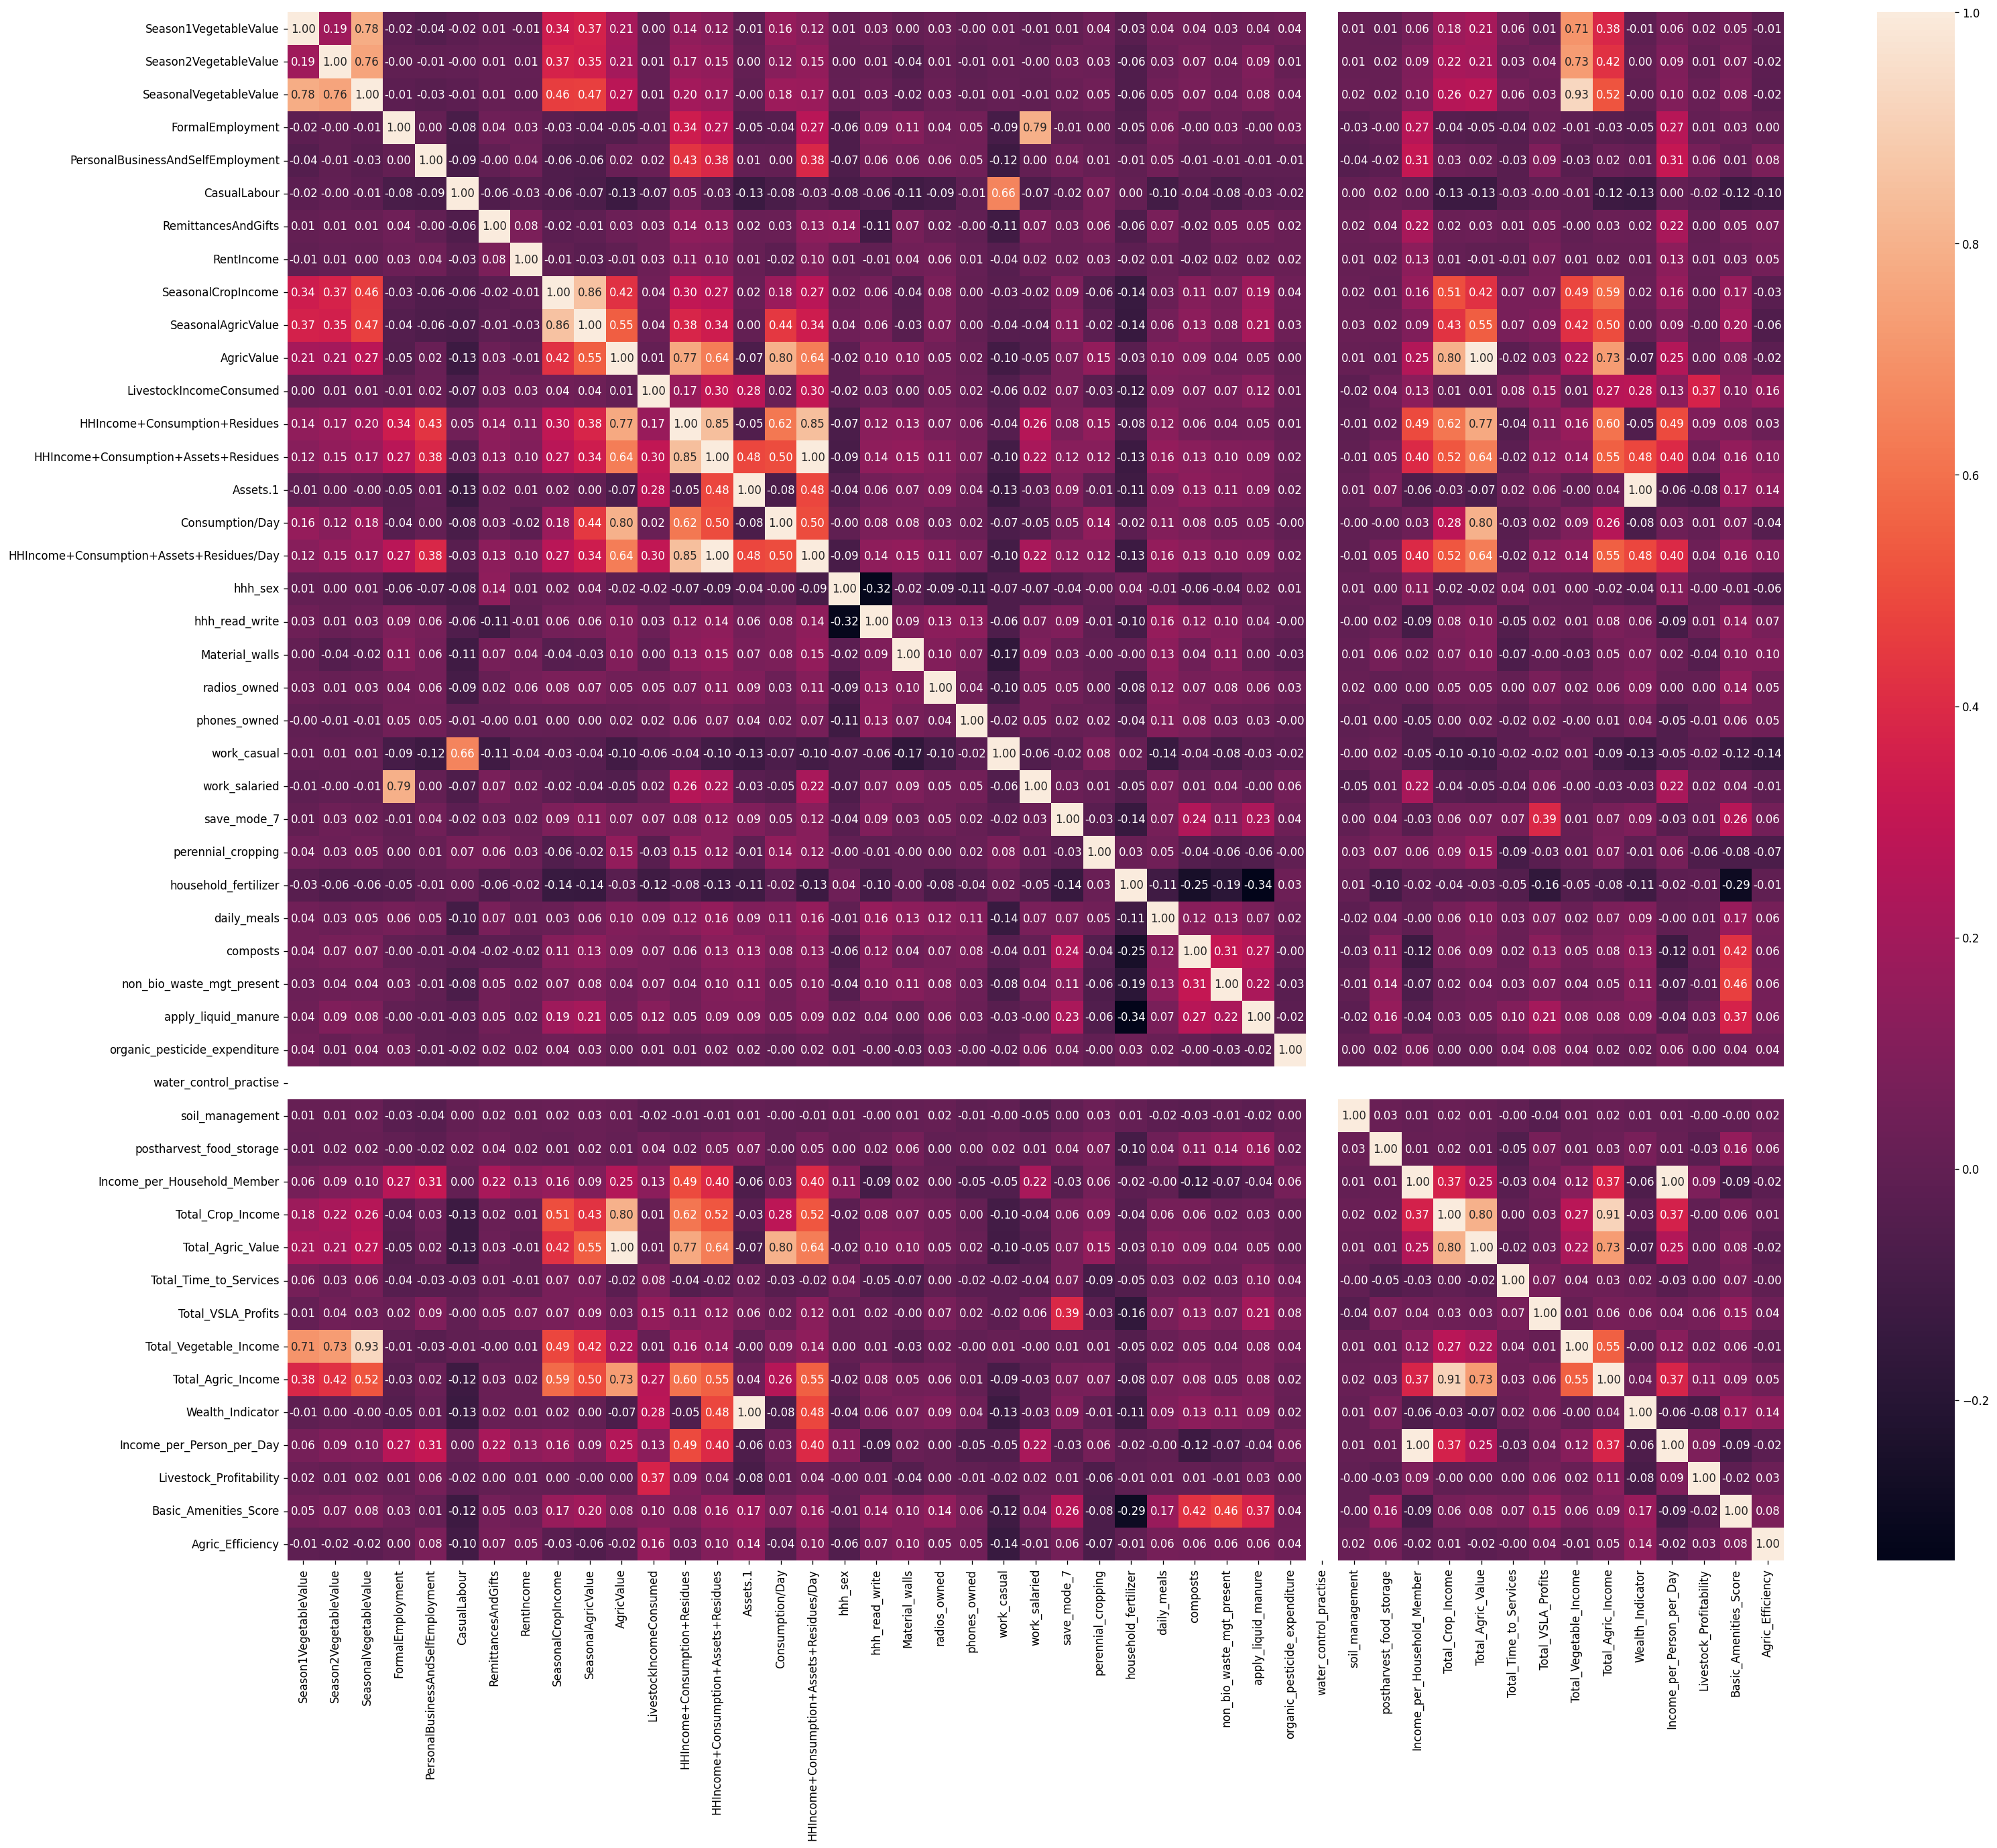

In [251]:
#Correlation matrix for numerical values
numerical_data = data.select_dtypes(include=['int', 'float'])
correlation_matrix = numerical_data.corr()

# Heatmap of correlation matrix
fig = plt.figure(figsize=(30,25), dpi = 120)
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f')
#plt.title('Correlation Heatmap')
plt.show()

In [252]:
data.head()

District    Cluster    Village  Season1VegetableValue  \
0  Kanungu  Rutendere   Kangyeyo               3.920972   
1  Kanungu    Kihanda  Omurwambu               0.000000   
2  Kanungu   Bujengwe     Byumba               0.672167   
3  Kanungu   Bujengwe     Byumba               6.945722   
4  Kanungu   Bujengwe     Kazahi              38.089444   

   Season2VegetableValue  SeasonalVegetableValue  FormalEmployment  \
0               5.601389                9.522361               0.0   
1               1.344333                1.344333               0.0   
2               1.792444                2.464611               0.0   
3               0.000000                6.945722               0.0   
4               0.000000               38.089444               0.0   

   PersonalBusinessAndSelfEmployment  CasualLabour  RemittancesAndGifts  \
0                           0.000000     44.811111            33.608333   
1                           0.000000      0.000000             6.721667   
2                           0.000000     91.414667            26.886667   
3                           4.481111      0.000000             0.000000   
4                           0.000000      0.000000           123.230556   

   RentIncome  SeasonalCropIncome  SeasonalAgricValue  AgricValue  \
0         0.0           45.931389          119.421611  229.208833   
1         0.0           13.219278          132.752917  303.035139   
2         0.0           64.303944          144.403806  179.356472   
3         0.0          126.591389          262.458678  325.194233   
4         0.0           23.301778          103.289611  300.458500   

   LivestockIncomeConsumed  HHIncome+Consumption+Residues  \
0                      0.0                     307.628278   
1                      0.0                     309.756806   
2                      0.0                     297.657806   
3                      0.0                     329.675344   
4                      0.0                     423.689056   

   HHIncome+Consumption+Assets+Residues   Assets.1  Consumption/Day  \
0                            307.628278   0.000000         0.416191   
1                            309.756806   0.000000         0.511645   
2                            358.152806  60.495000         0.274698   
3                            385.689233  56.013889         0.468000   
4                            423.689056   0.000000         0.759333   

   HHIncome+Consumption+Assets+Residues/Day  hhh_sex  hhh_read_write  \
0                                  0.842817        2               0   
1                                  0.848649        1               1   
2                                  0.981241        2               1   
3                                  1.056683        1               1   
4                                  1.160792        2               1   

   Material_walls  radios_owned  phones_owned business_number  work_casual  \
0               2             1             1               0            1   
1               2             1             2               0            0   
2               2             0             0               0            1   
3               2             1             1               0            0   
4               1             2             2               0            0   

   work_salaried  save_mode_7 Loan_from  perennial_cropping  \
0              0            0         7                   1   
1              0            1         7                   1   
2              0            1         7                   1   
3              0            1         7                   1   
4              0            0         7                   1   

   household_fertilizer  daily_meals  composts  non_bio_waste_mgt_present  \
0                    99            2       0.0                          0   
1                    99            2       1.0                          1   
2                     1            2       0.0        

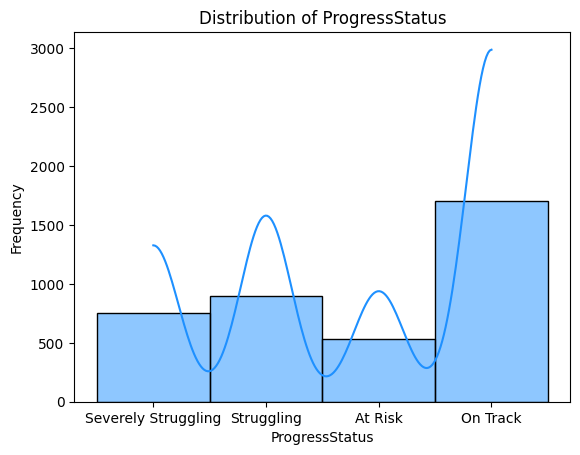

In [253]:
#Distribution of ProgressStatus
sns.histplot(data['ProgressStatus'], bins=100, kde=True, color= '#1E90FF')
plt.title('Distribution of ProgressStatus')
plt.xlabel('ProgressStatus')
plt.ylabel('Frequency')
plt.show()

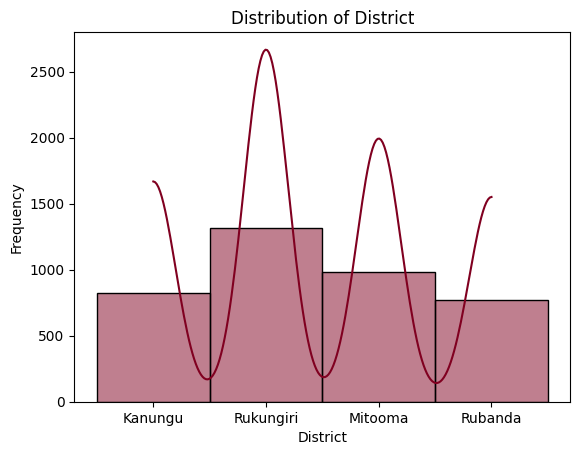

In [254]:
#Distribution of District
sns.histplot(data['District'], bins=30, kde=True, color= '#800020')
plt.title('Distribution of District')
plt.xlabel('District')
plt.ylabel('Frequency')
plt.show()

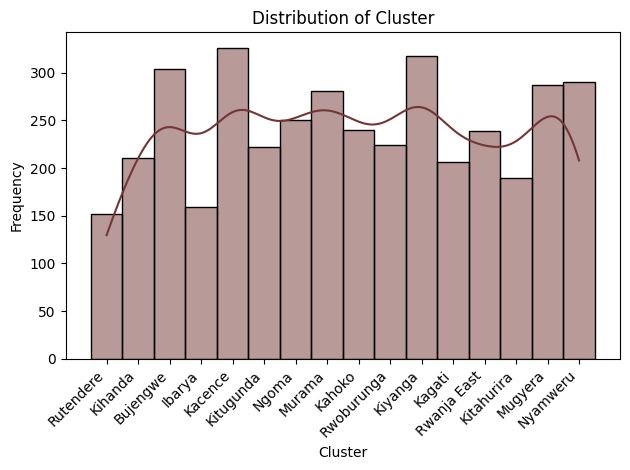

In [255]:
#Distribution of EstimatedSalary
sns.histplot(data['Cluster'], bins=1000, kde=True, color= '#733635')
plt.title('Distribution of Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [256]:
#List of feature columns (excluding target variables)
features = data.columns.difference(['ProgressStatus'])

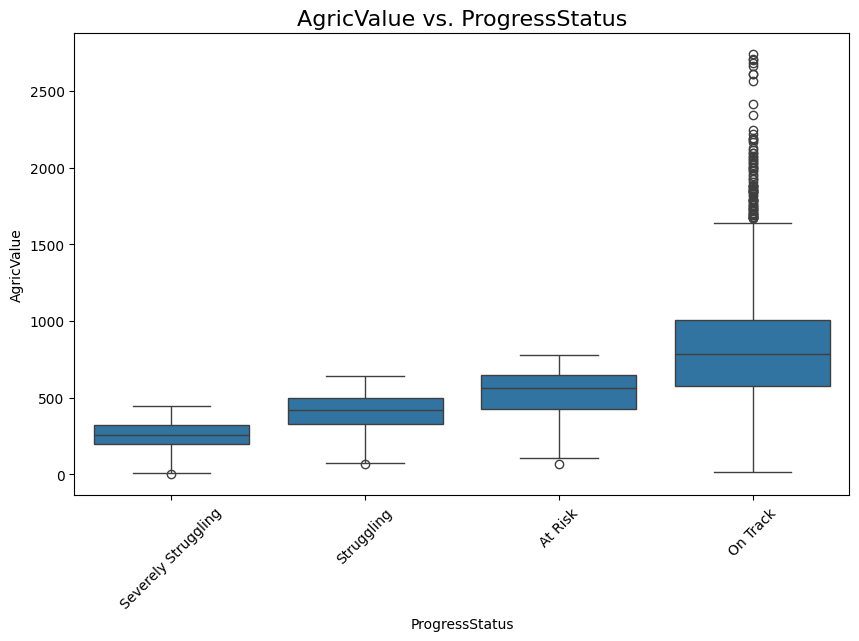

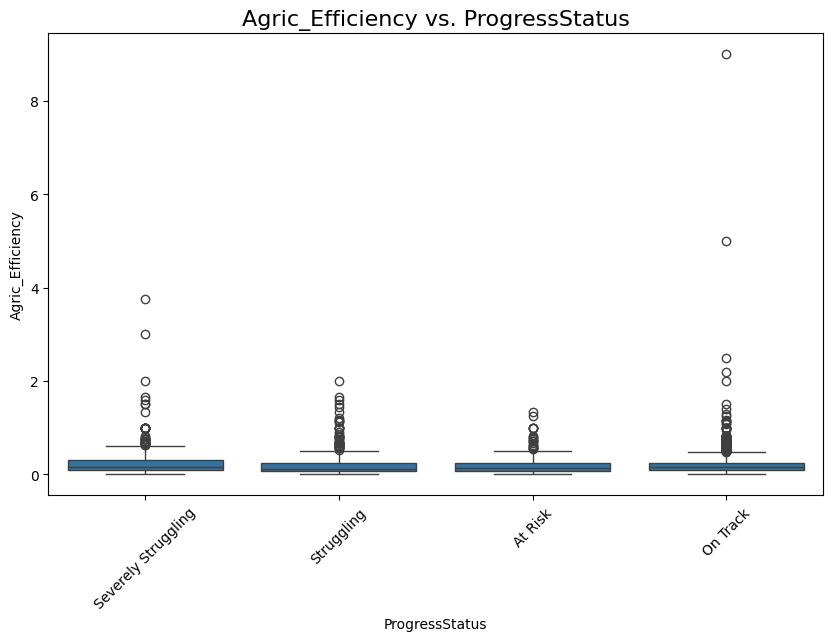

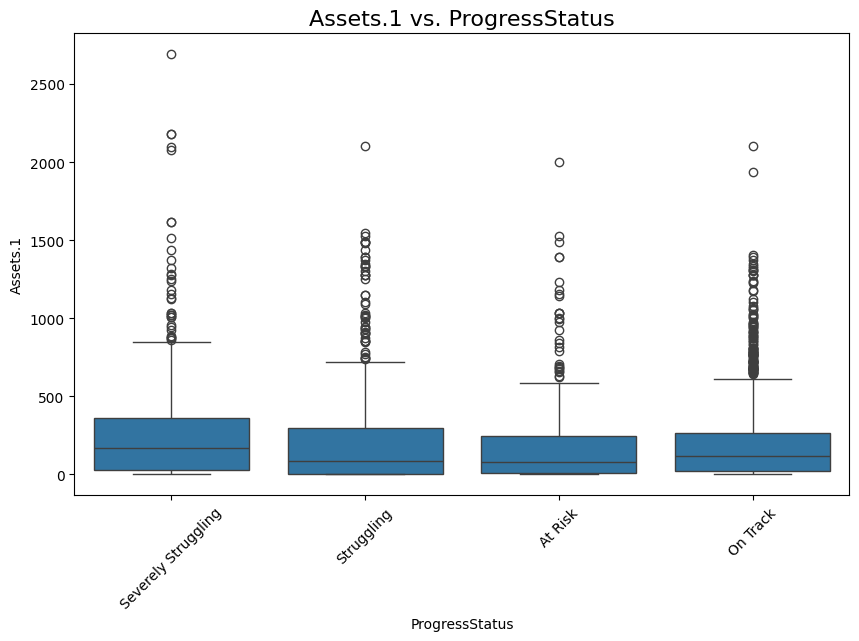

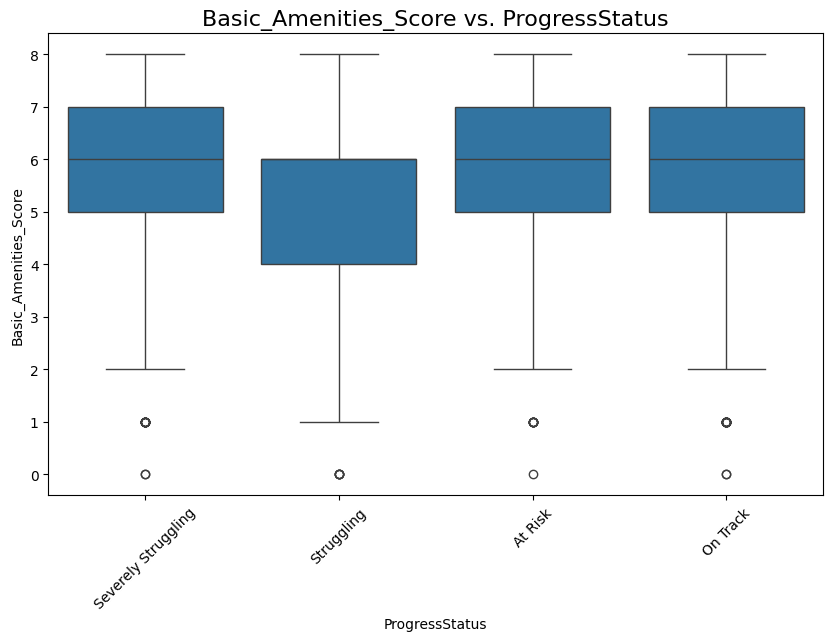

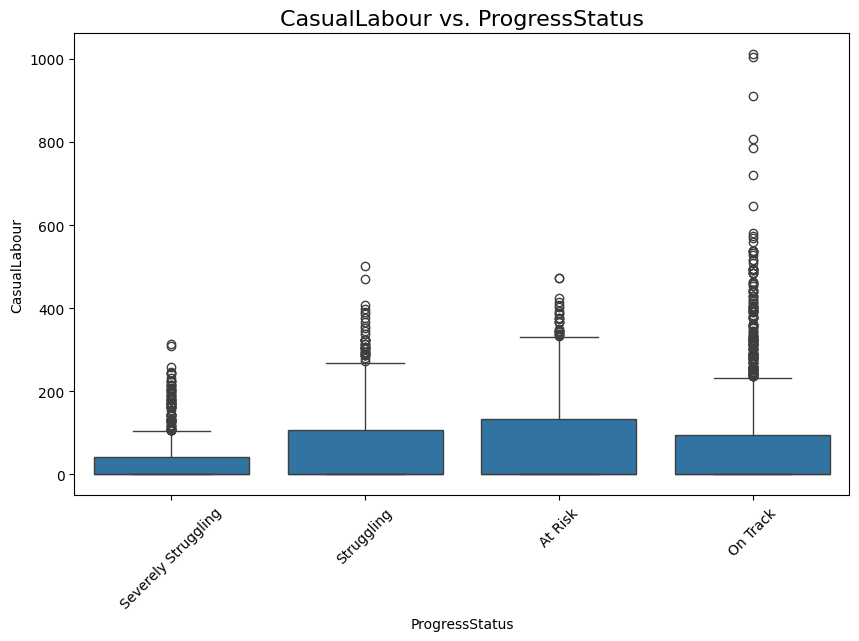

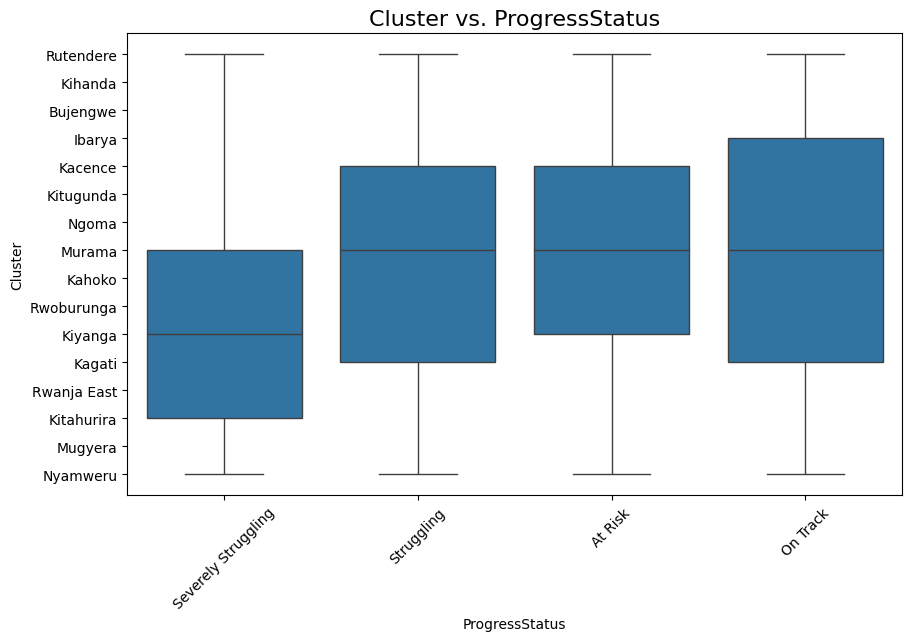

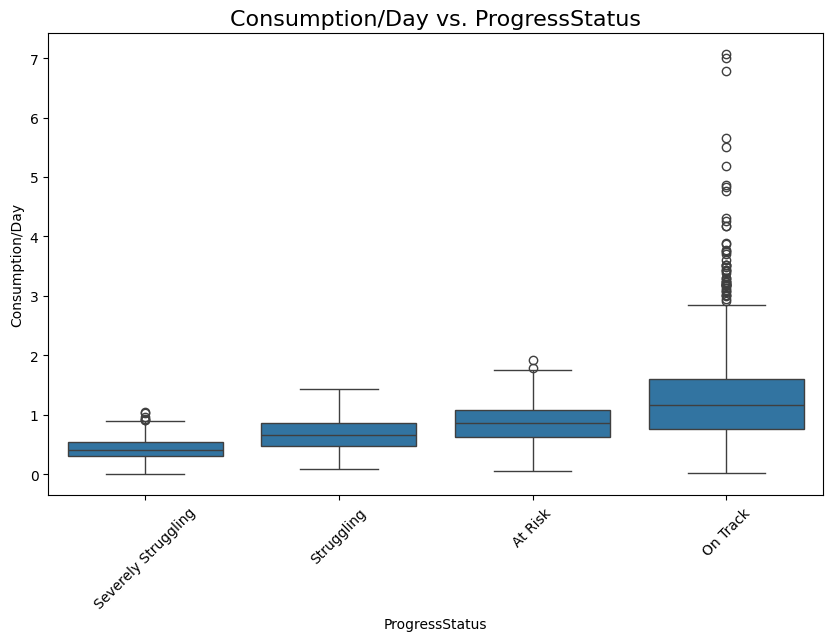

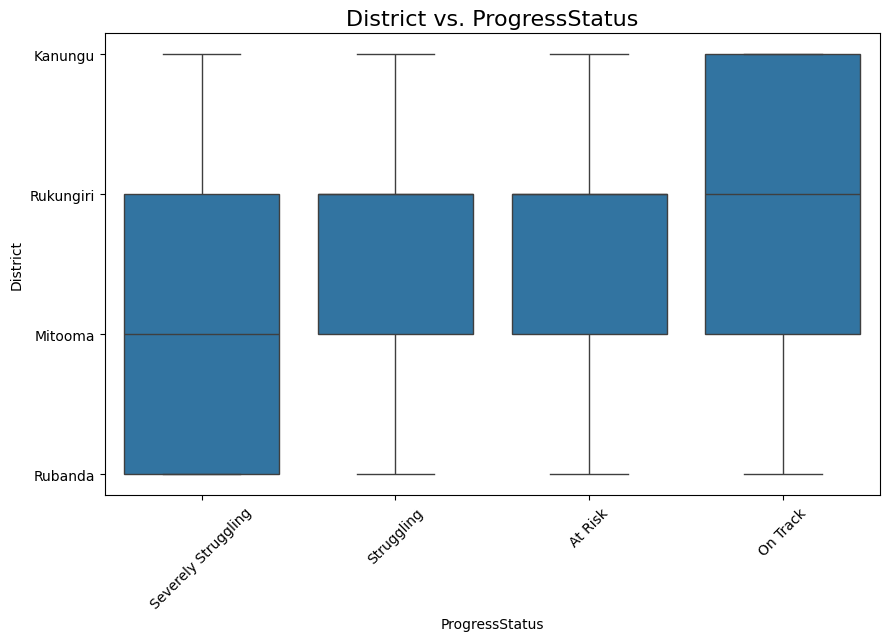

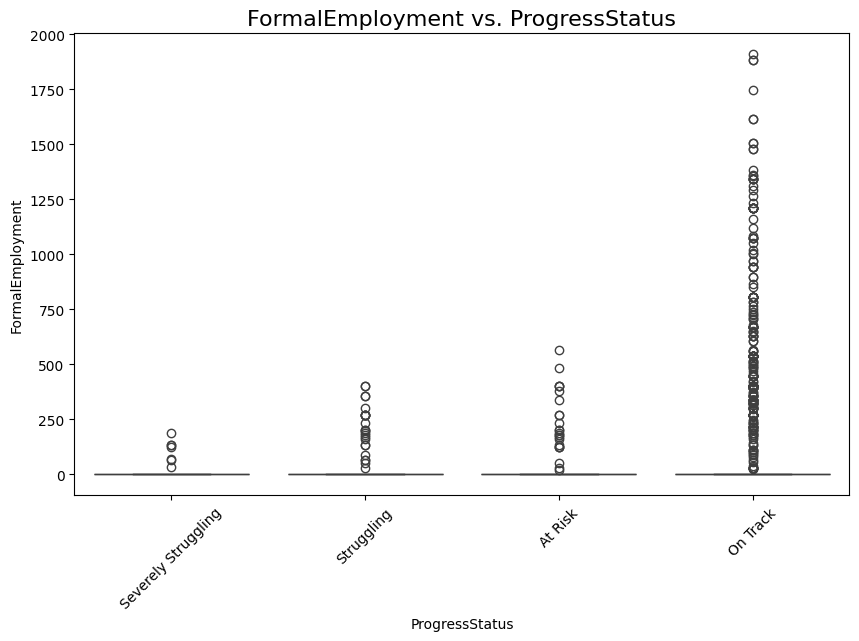

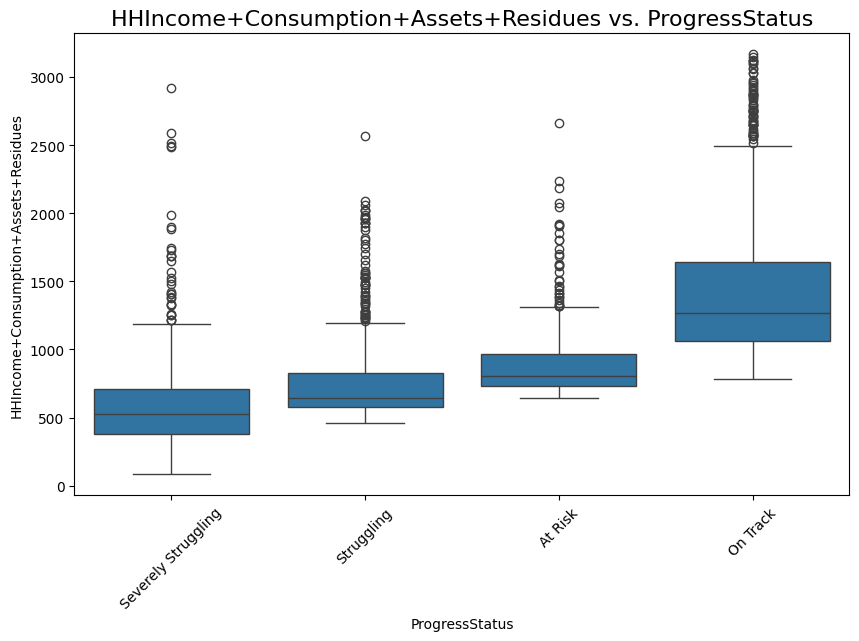

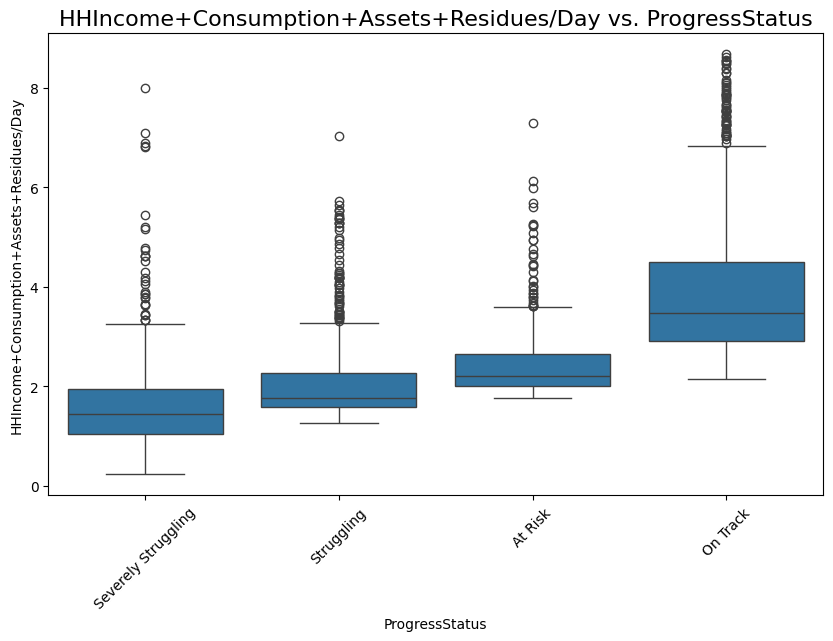

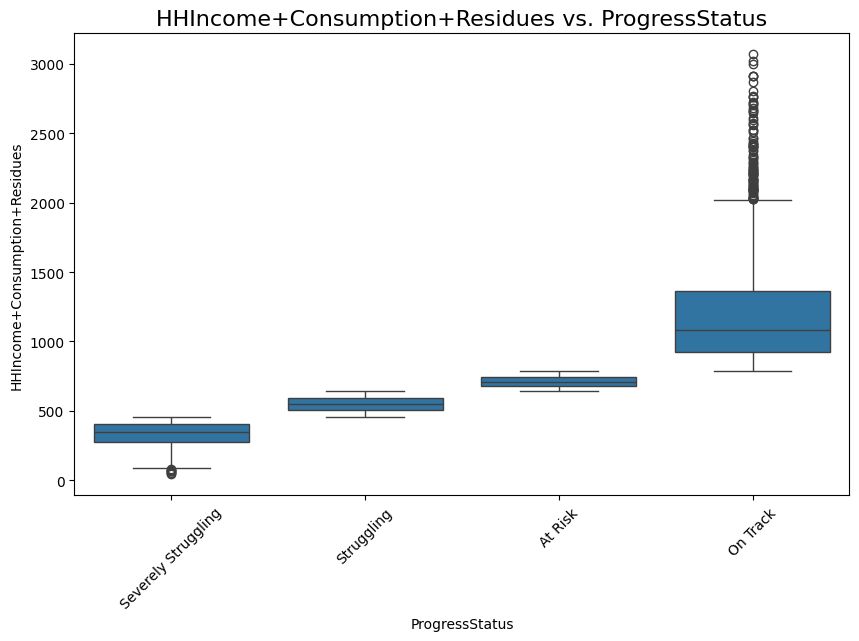

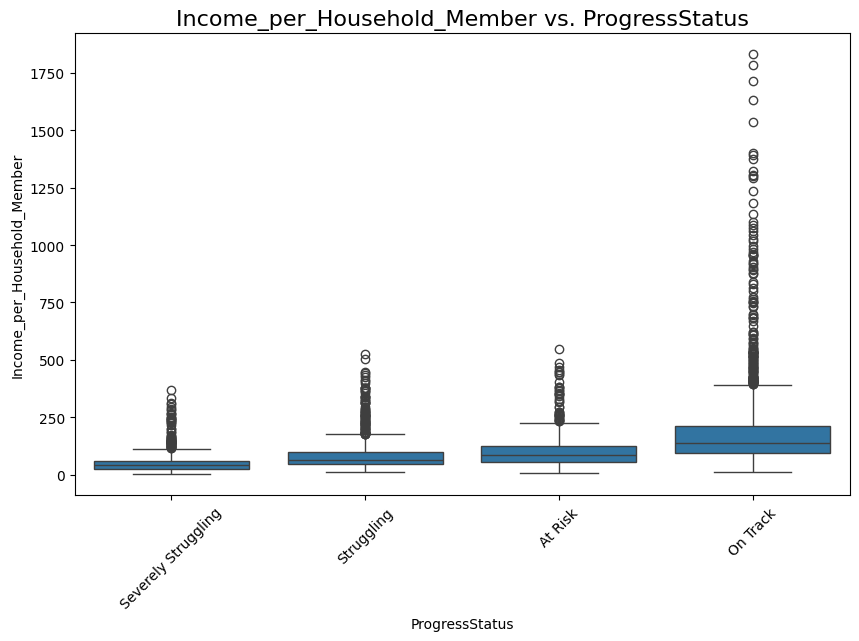

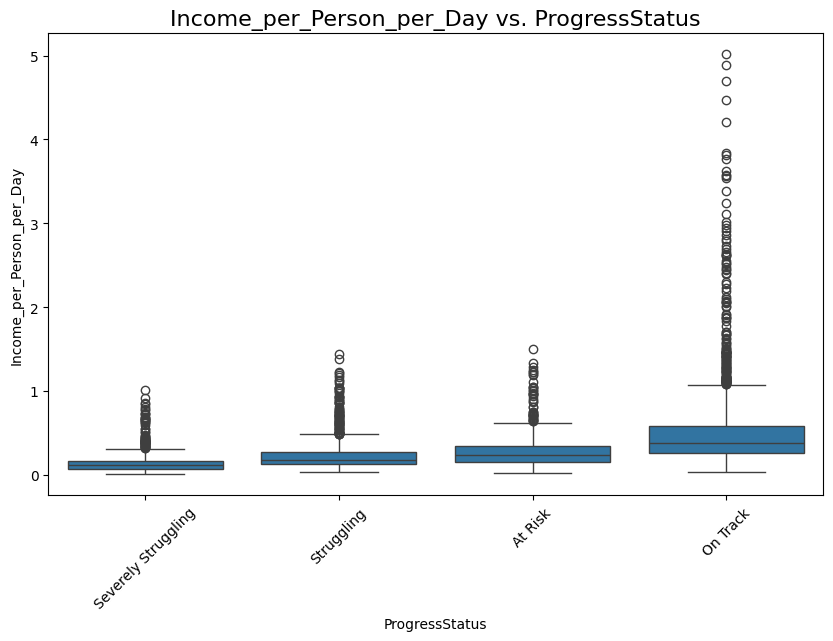

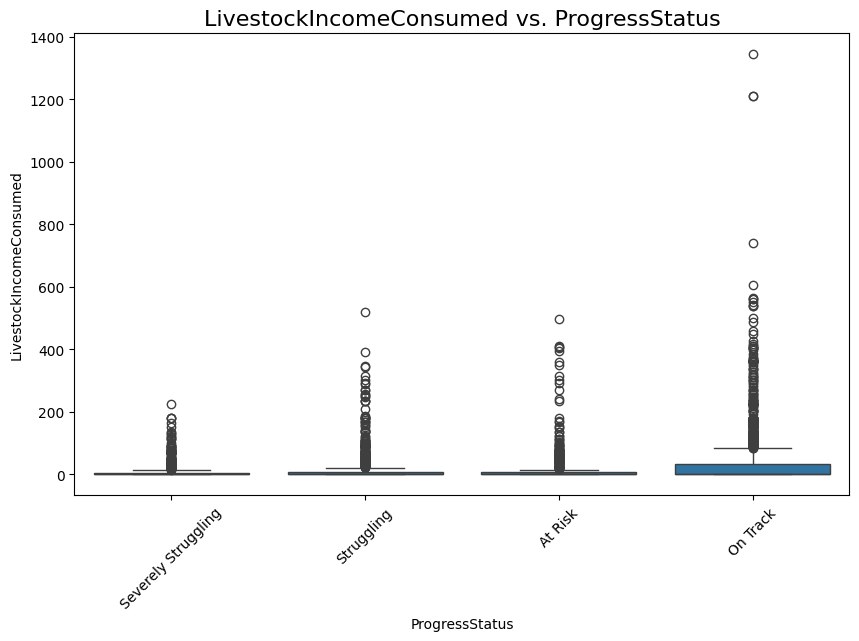

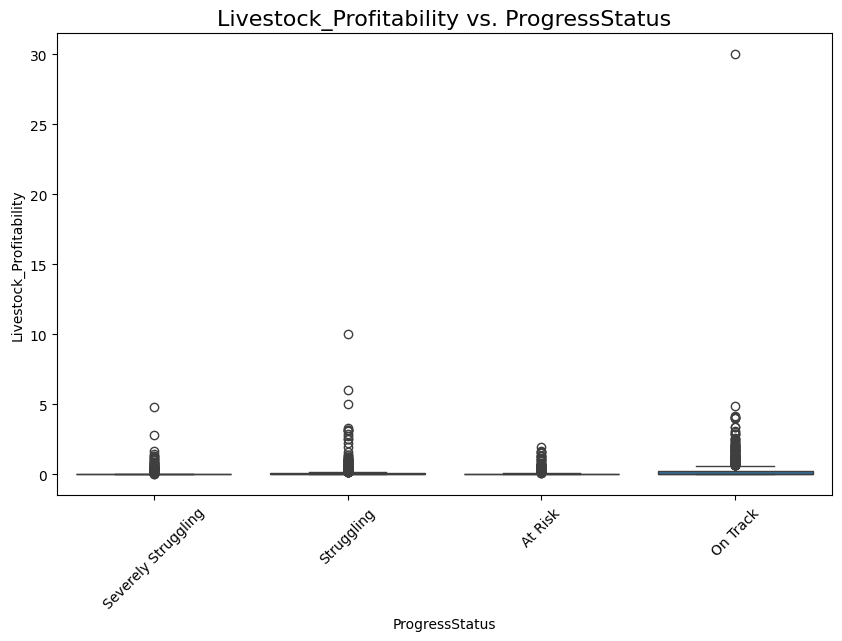

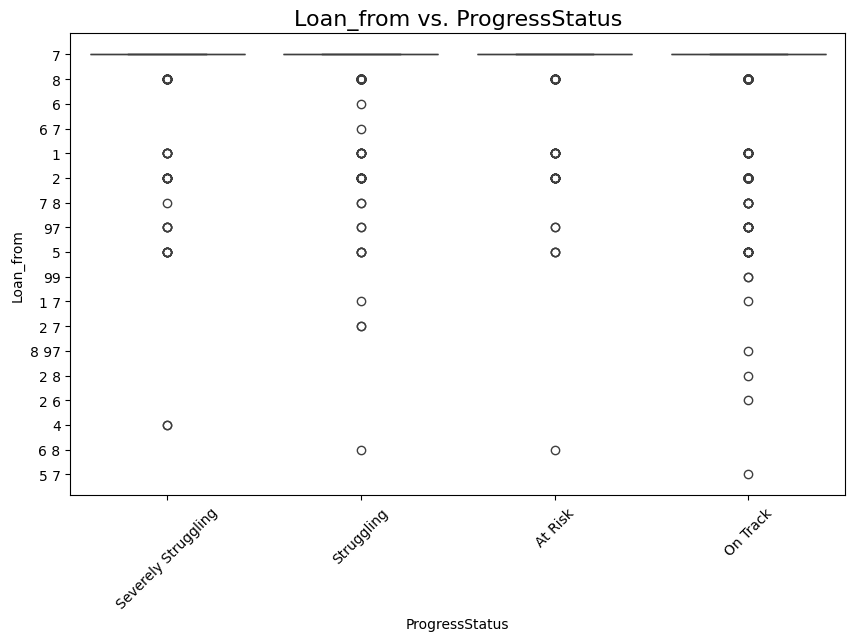

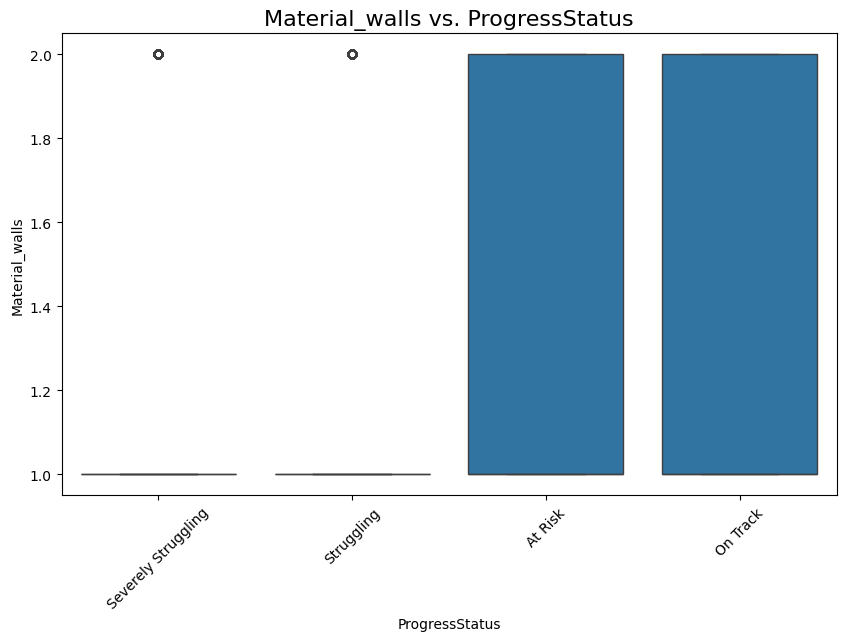

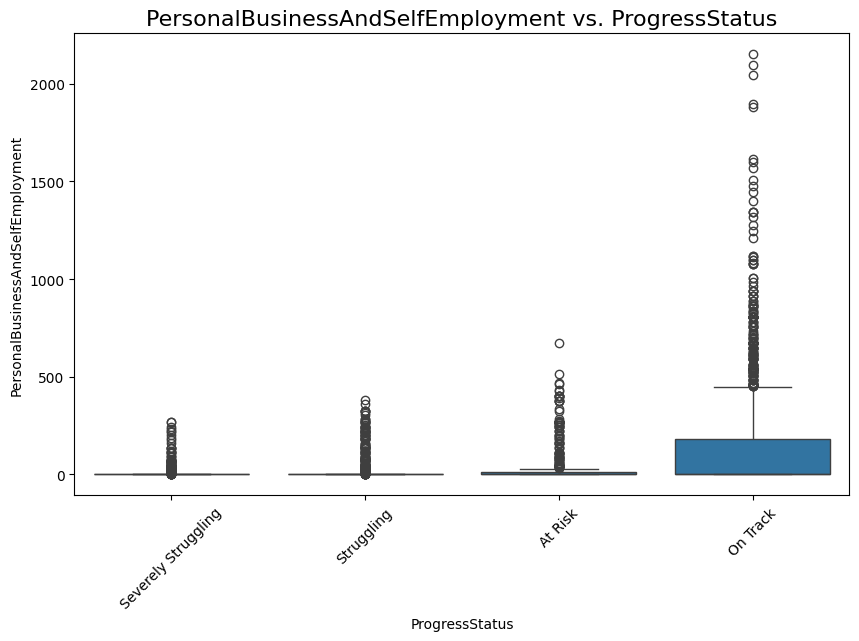

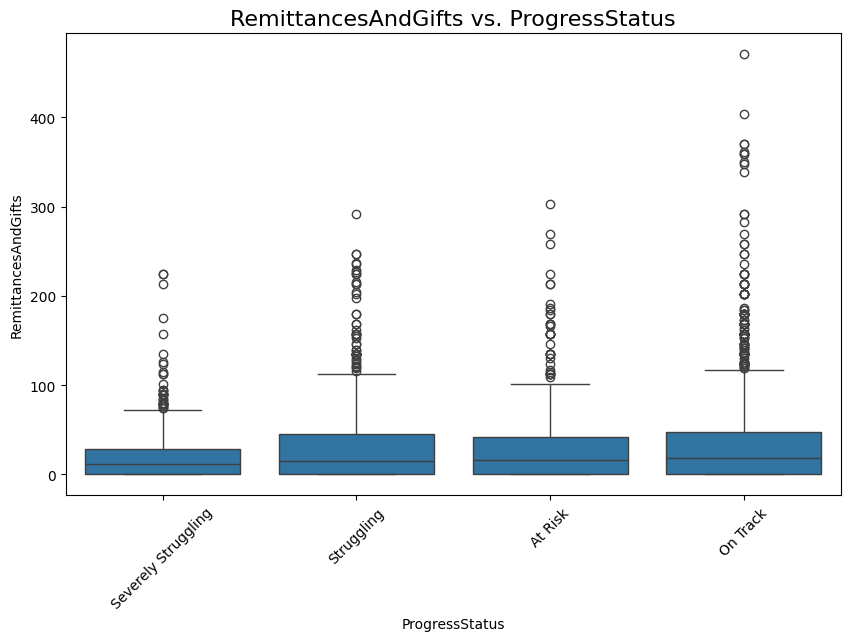

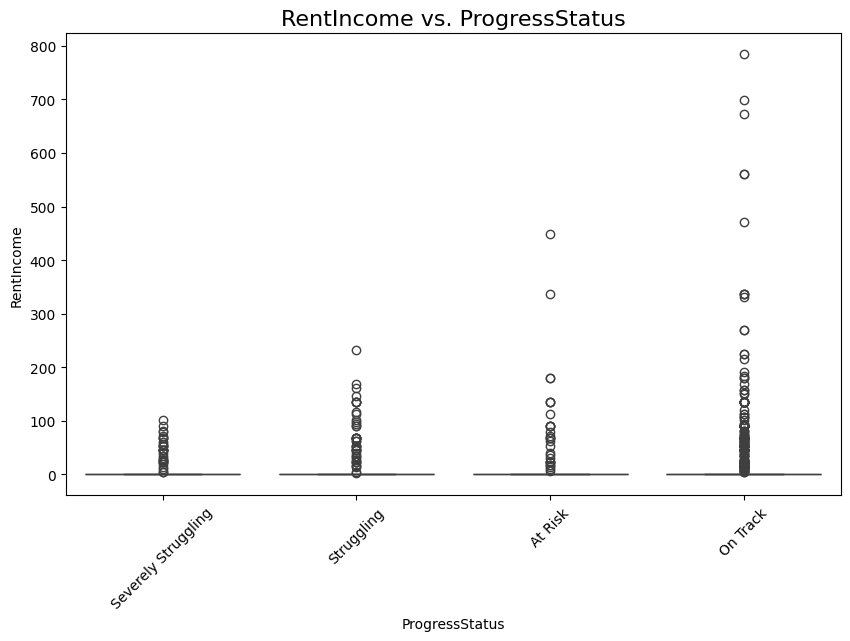

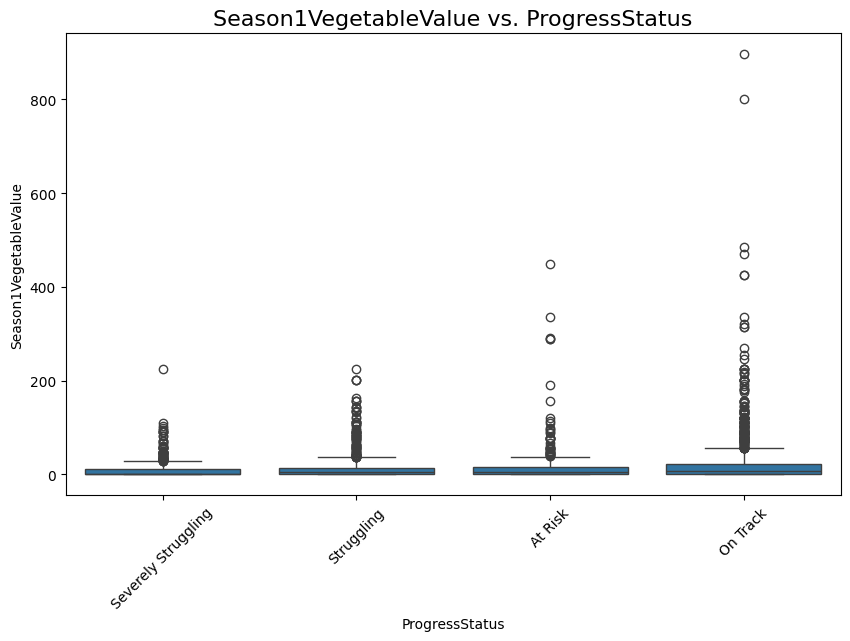

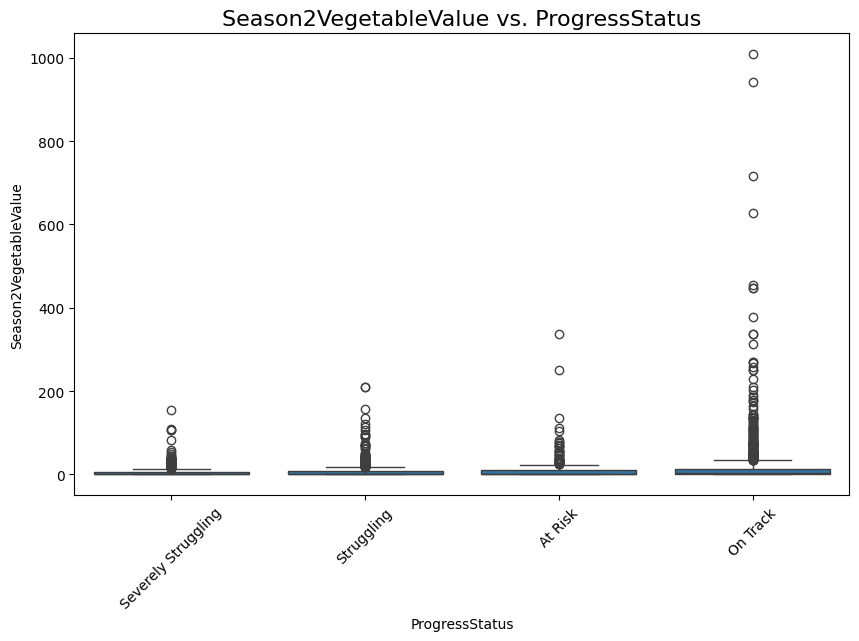

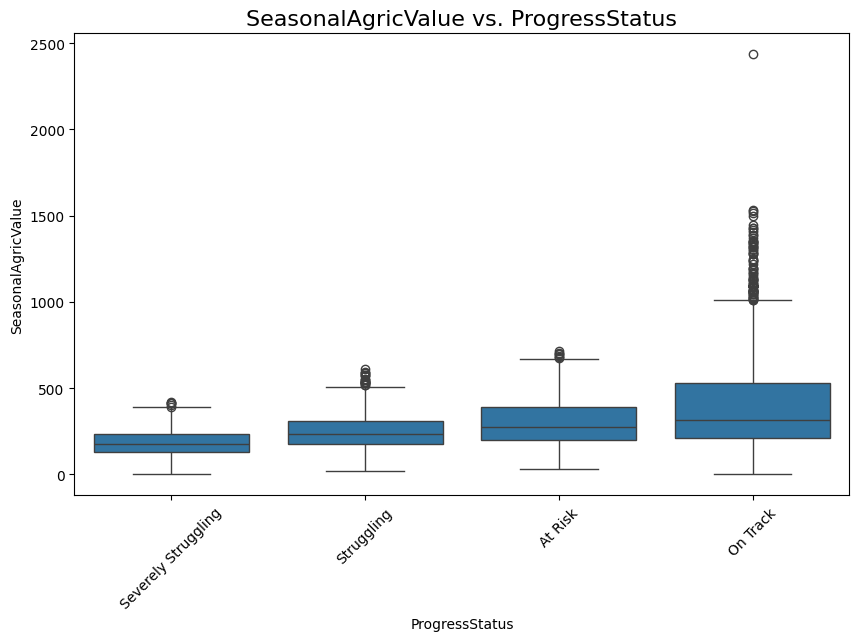

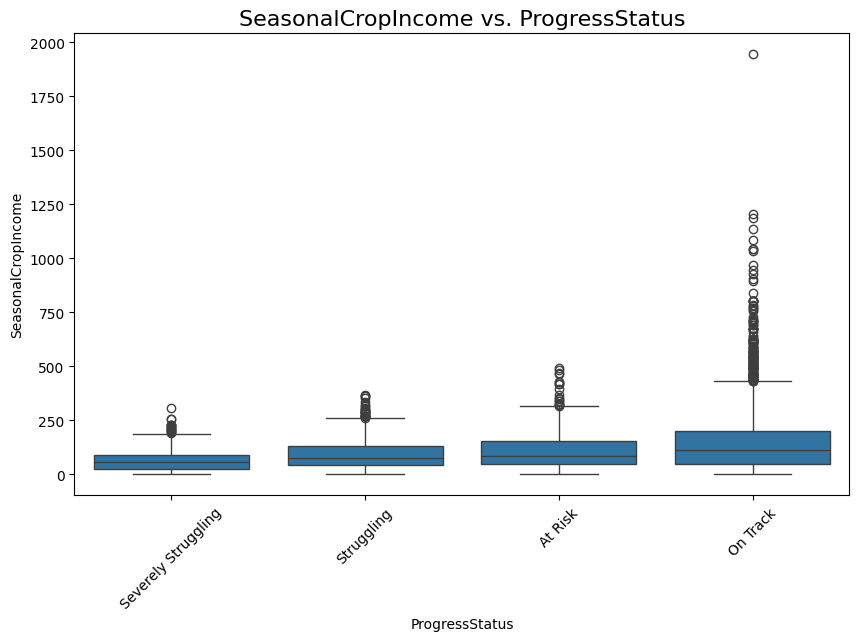

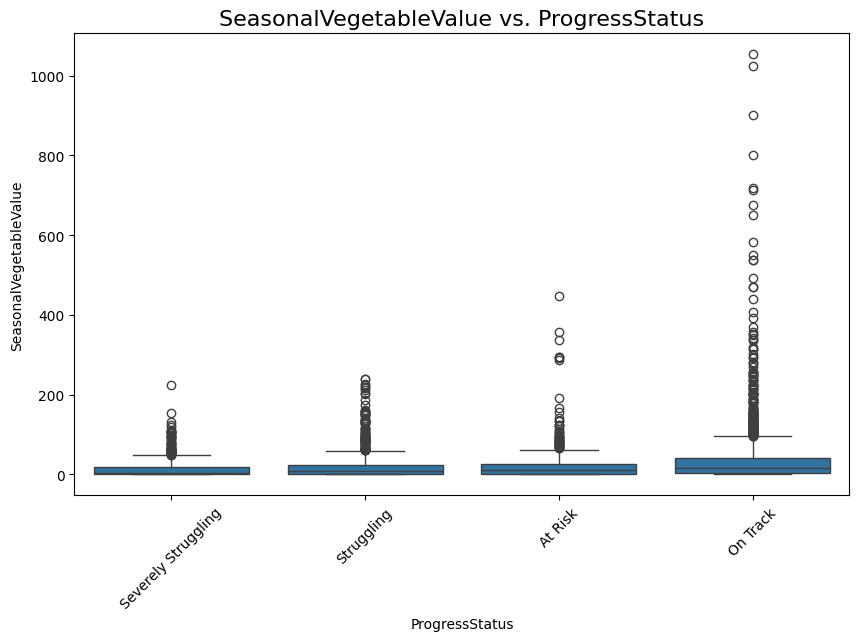

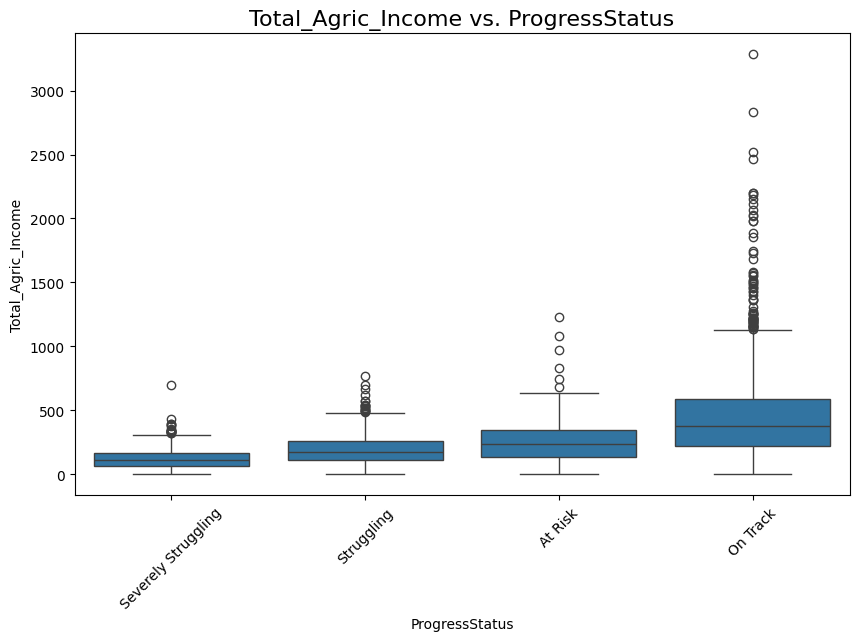

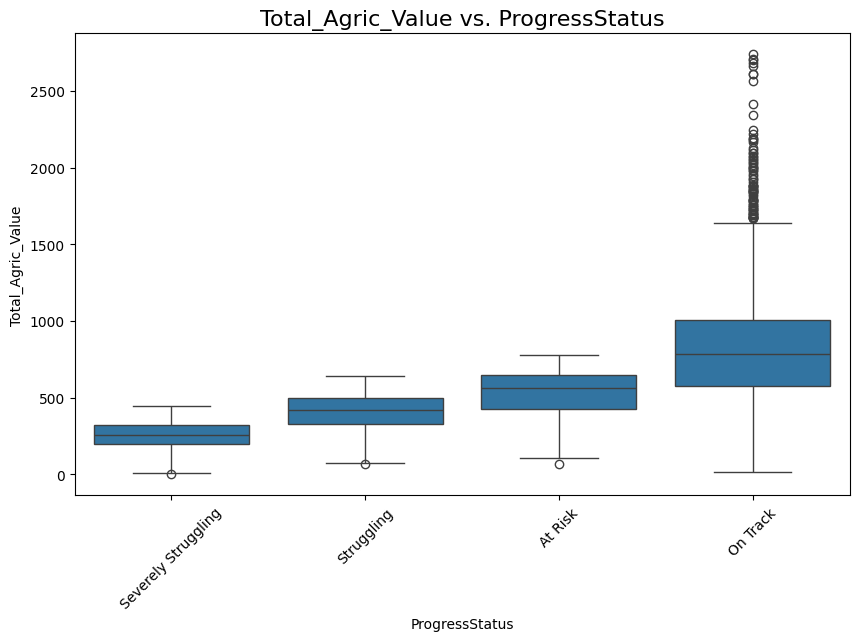

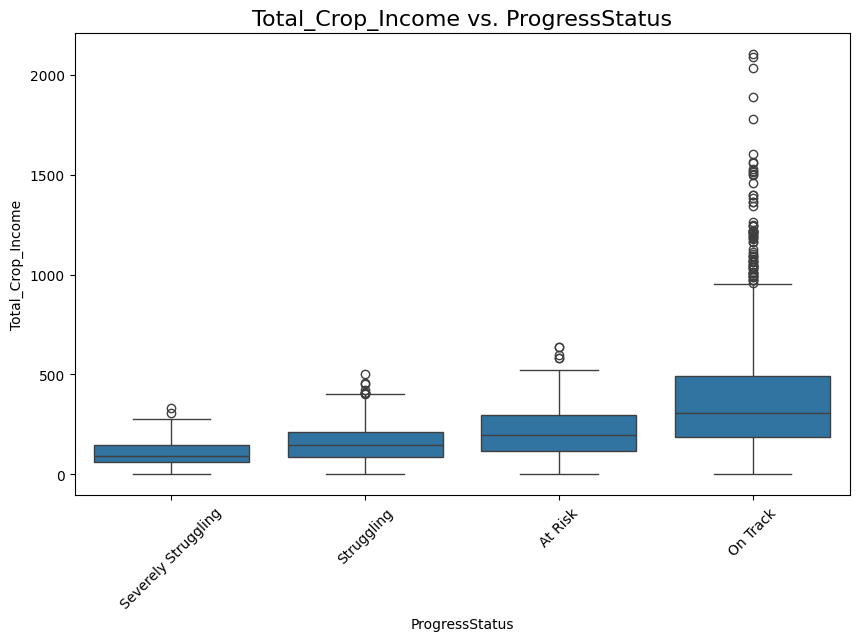

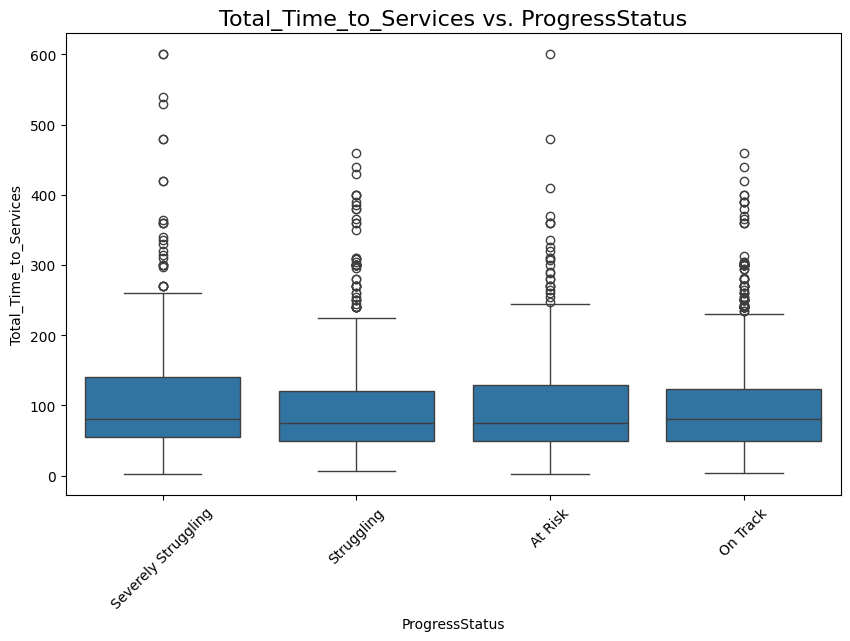

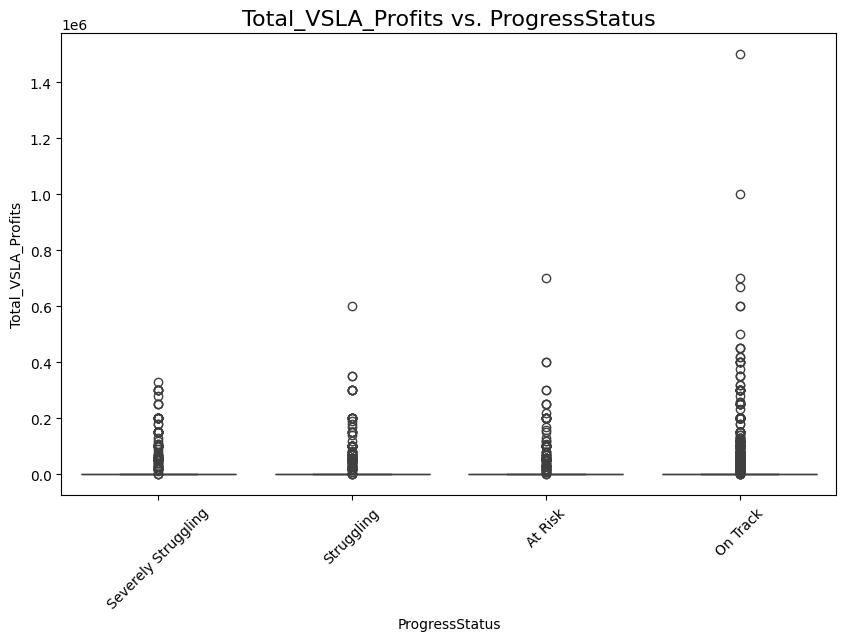

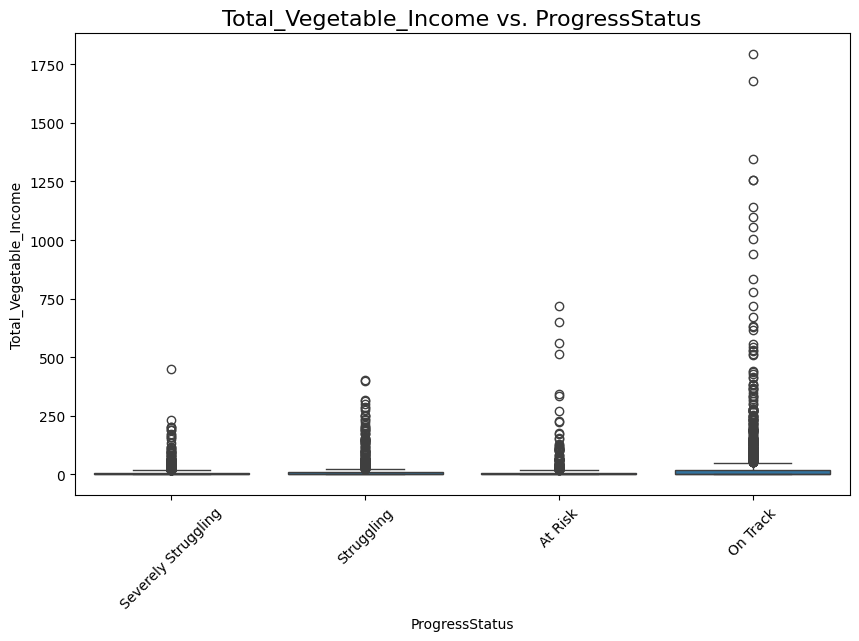

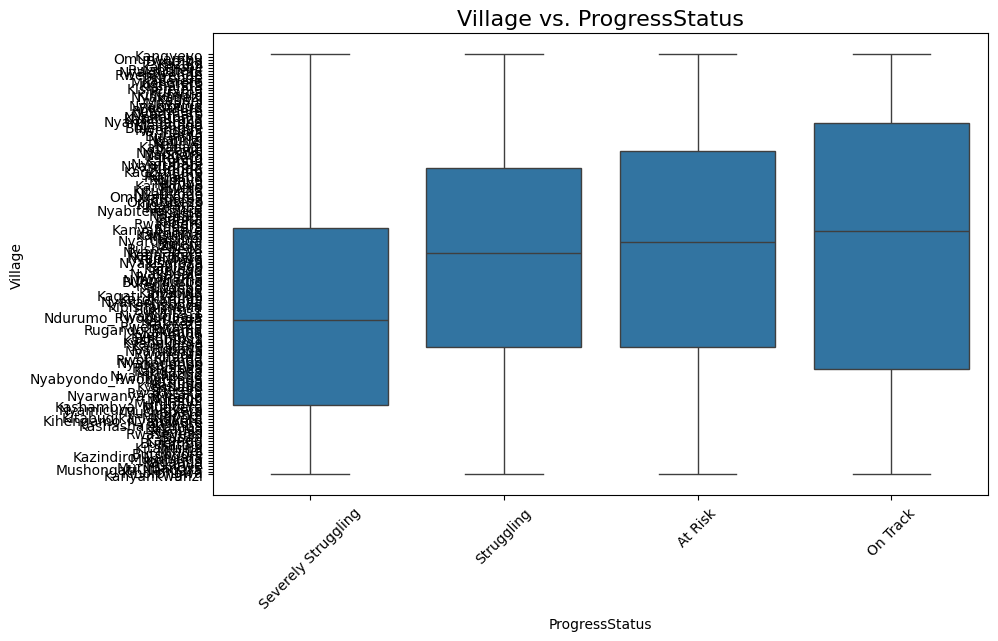

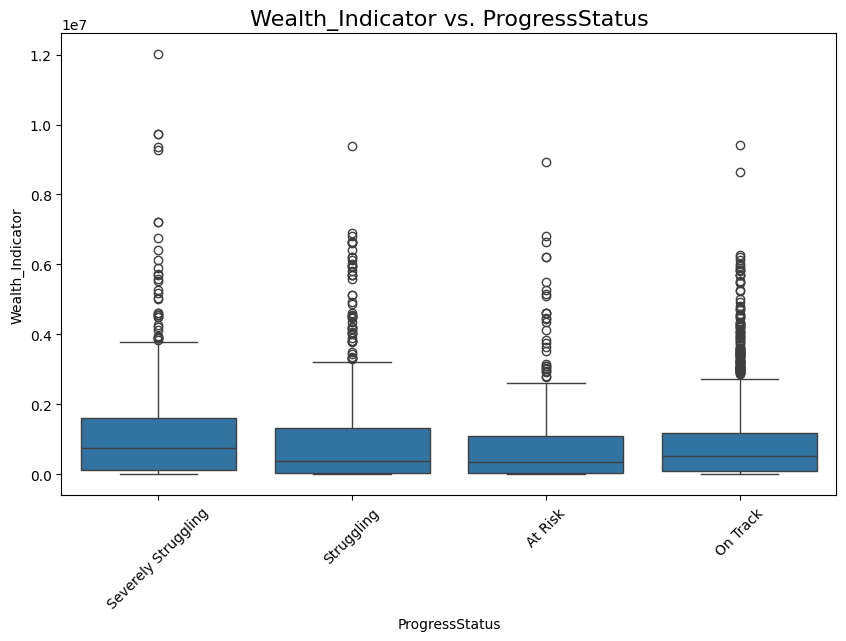

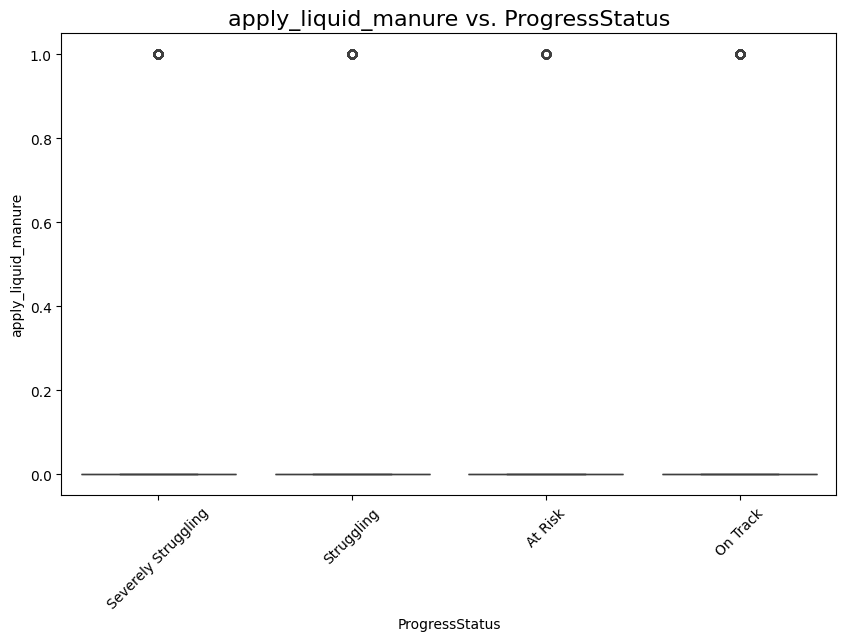

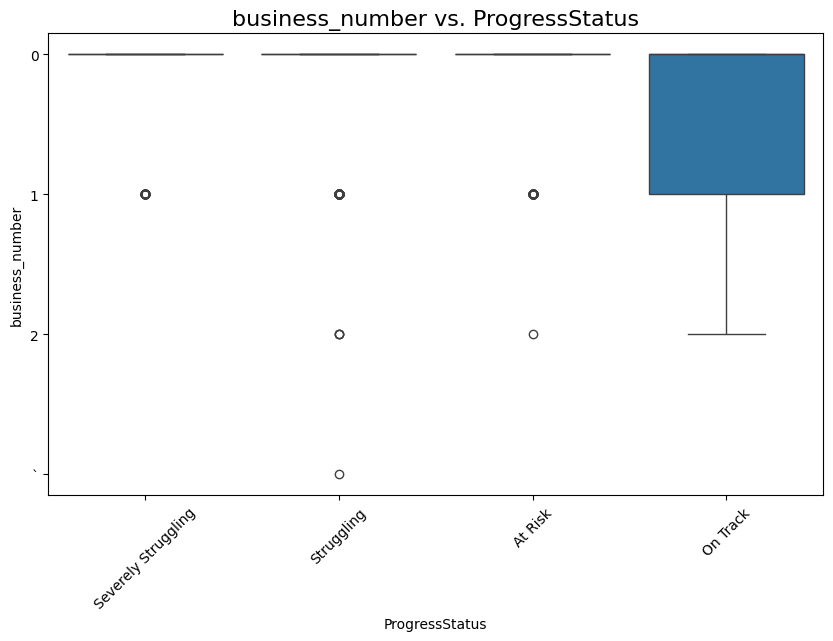

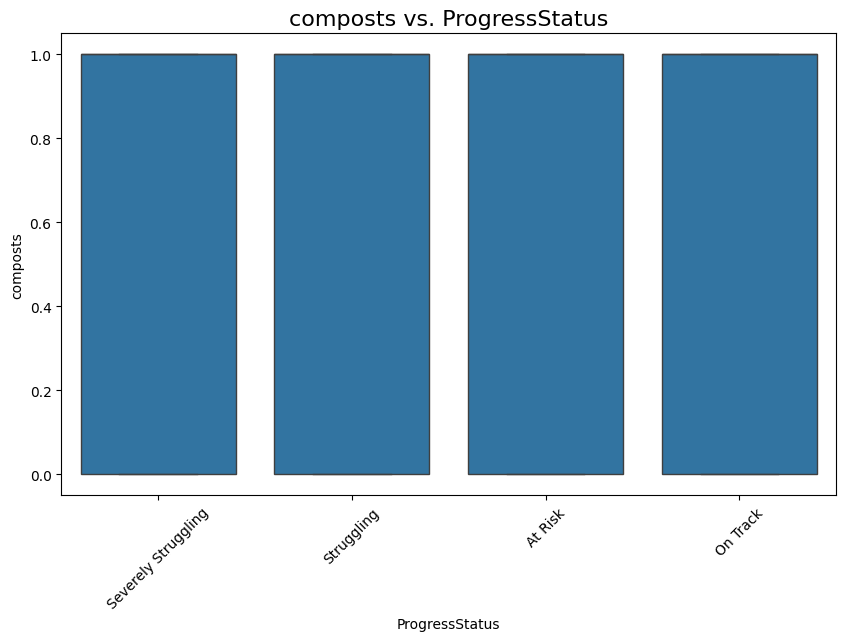

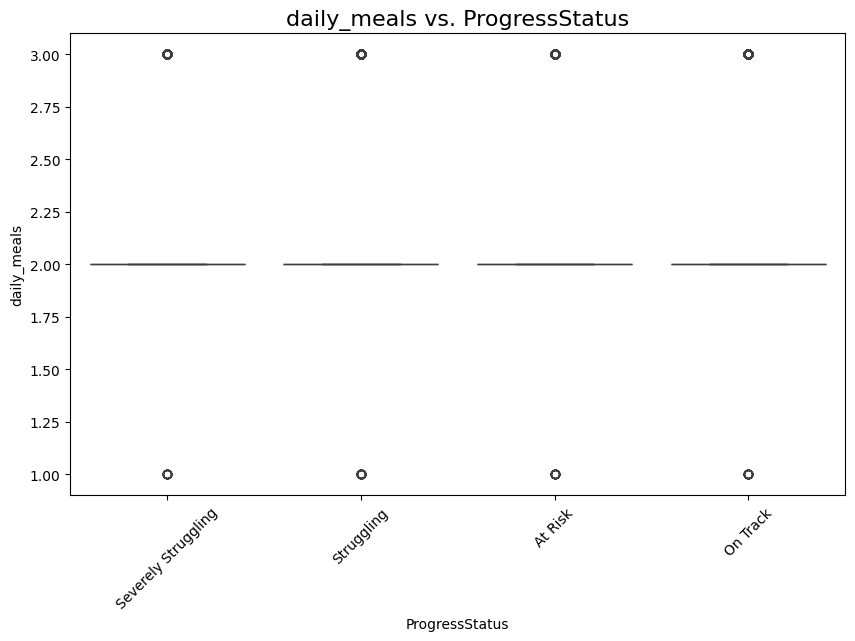

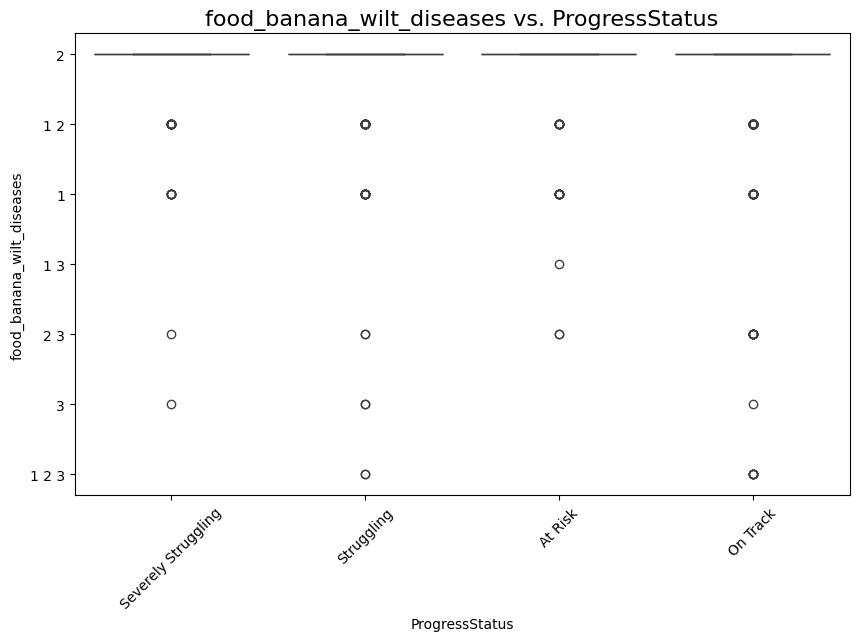

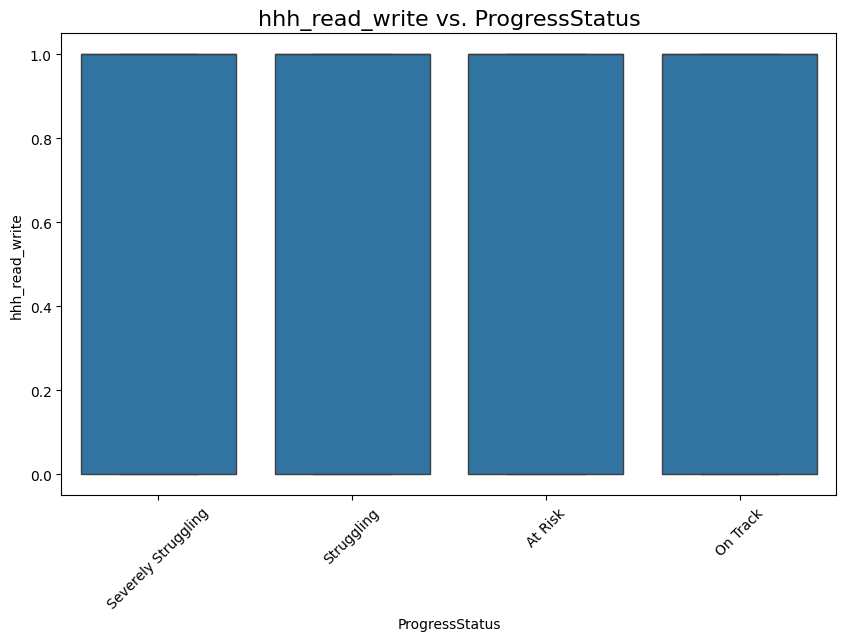

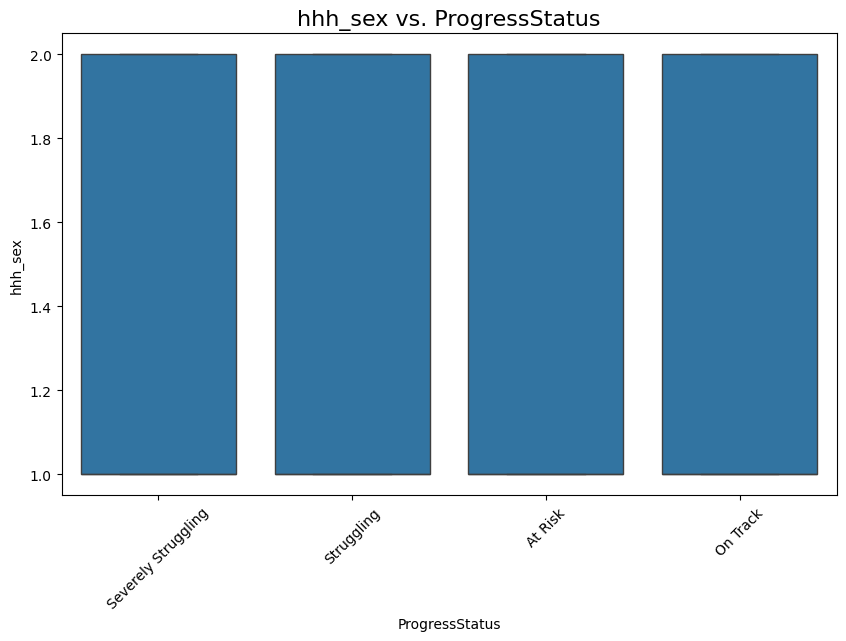

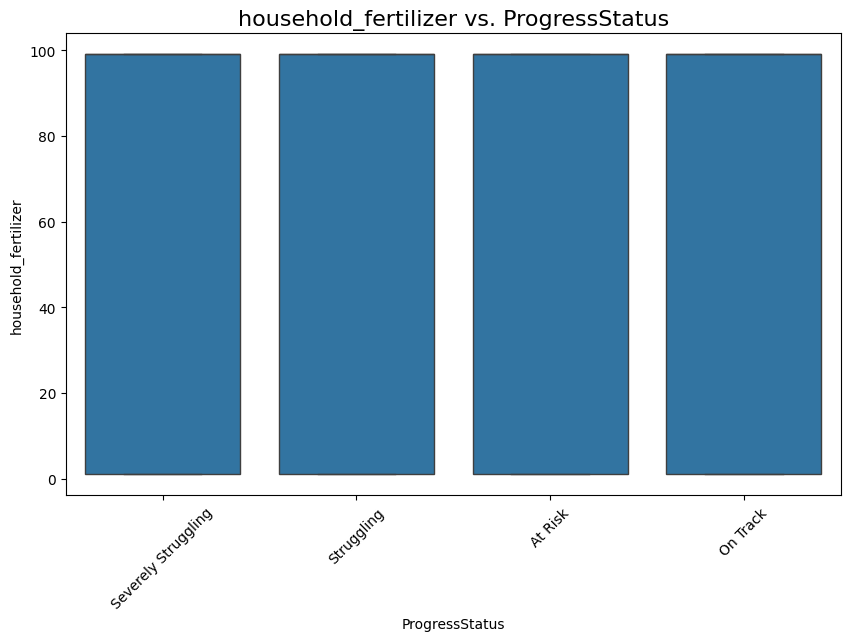

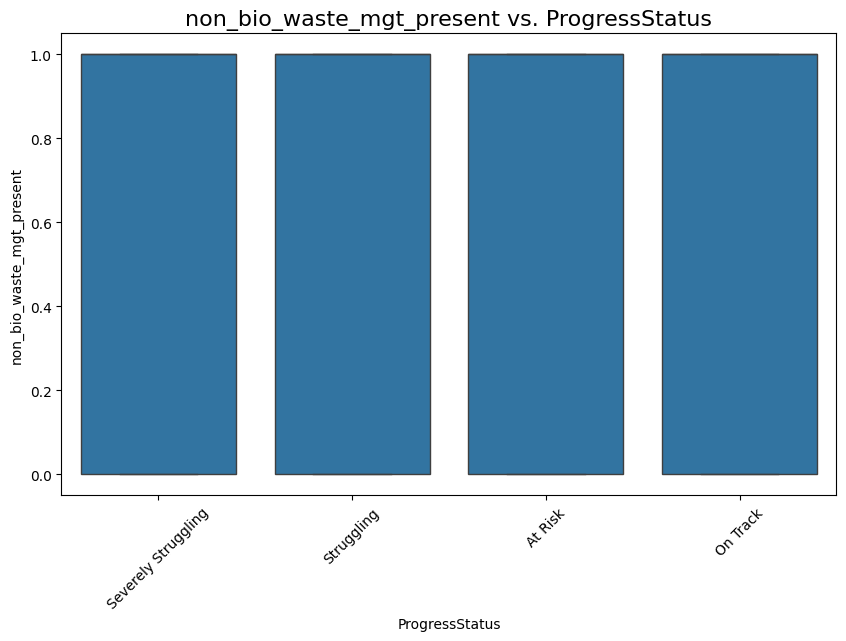

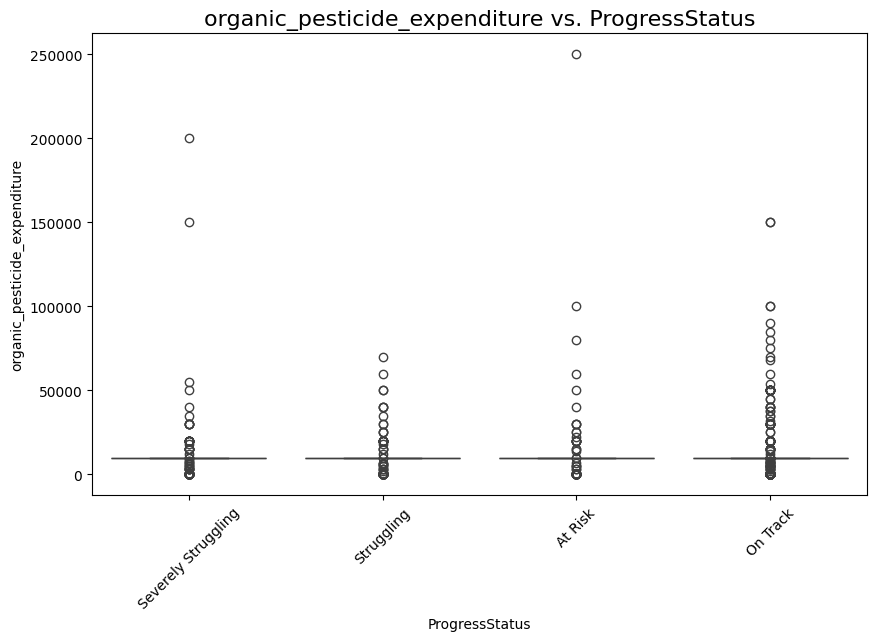

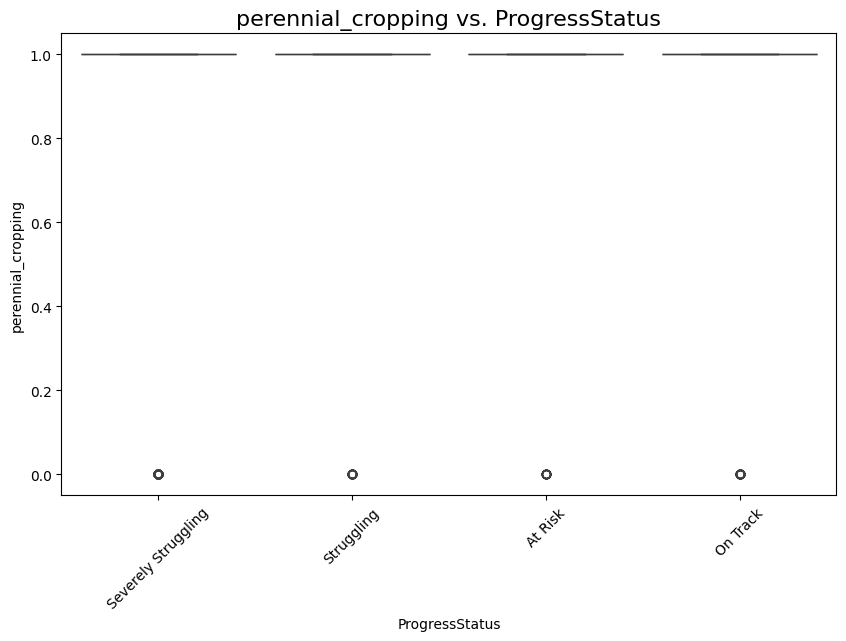

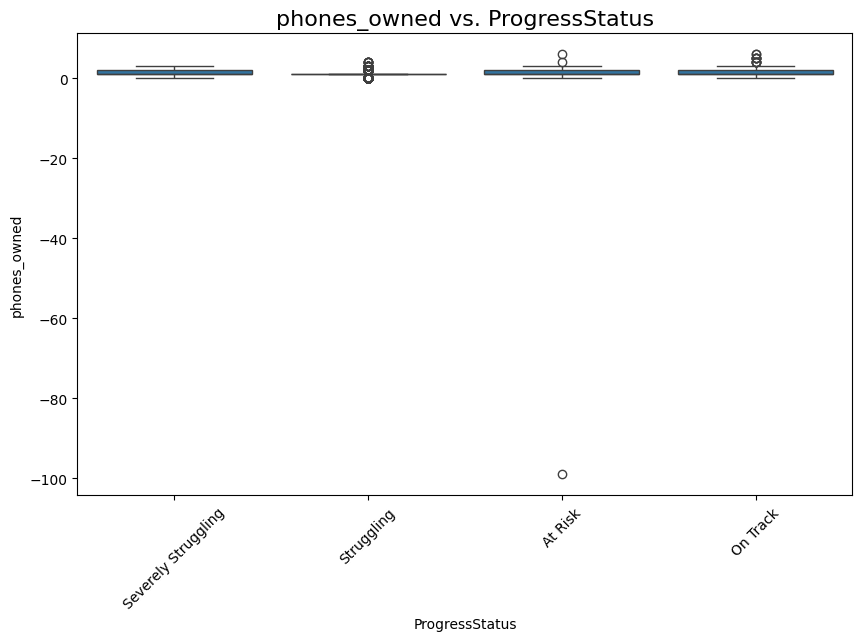

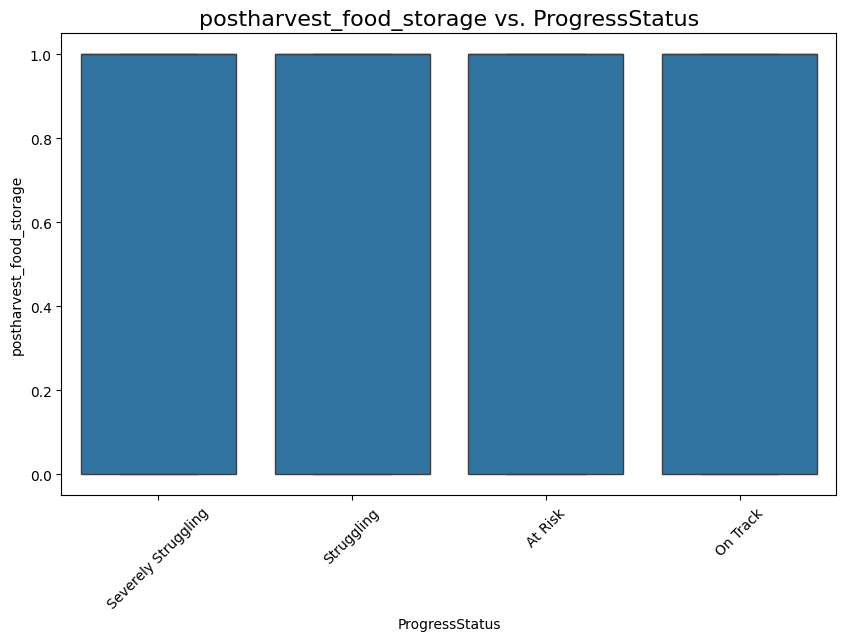

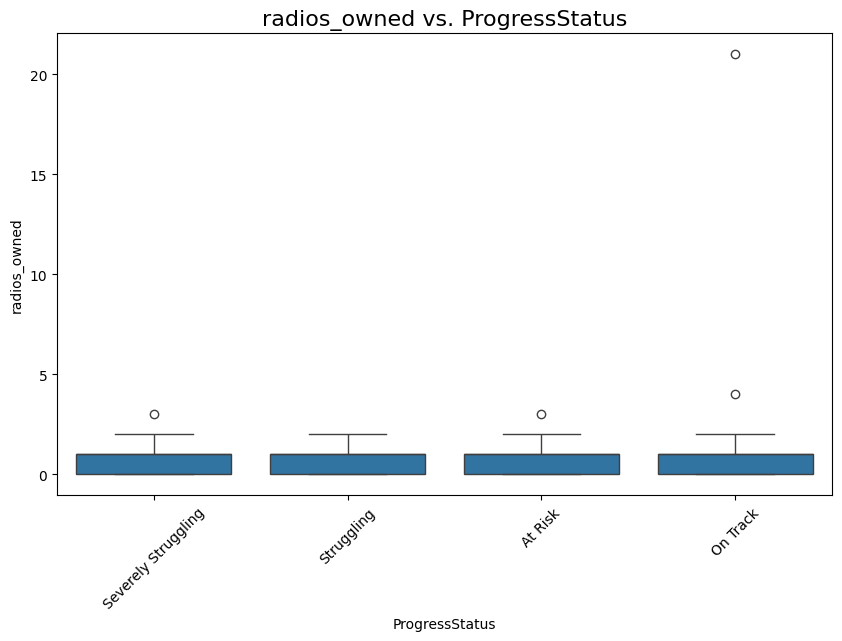

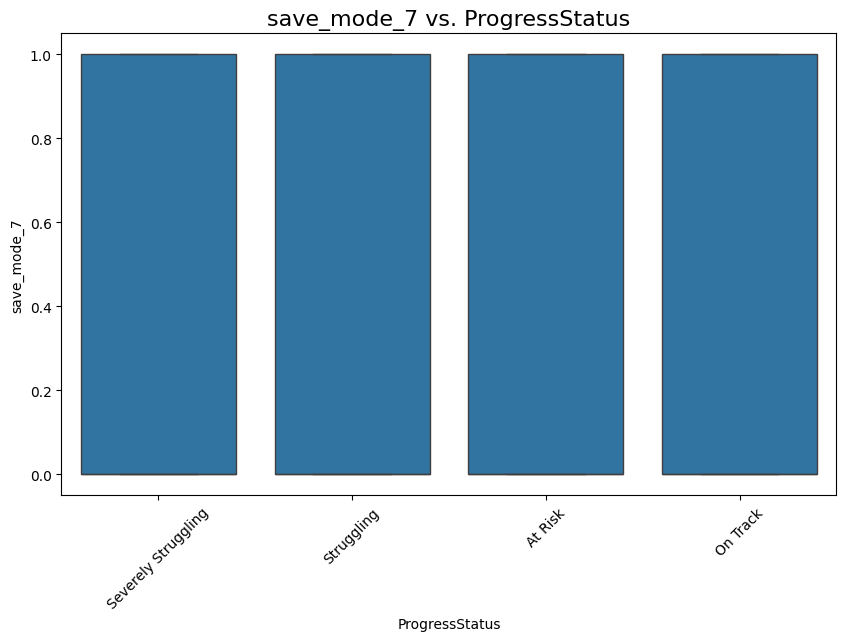

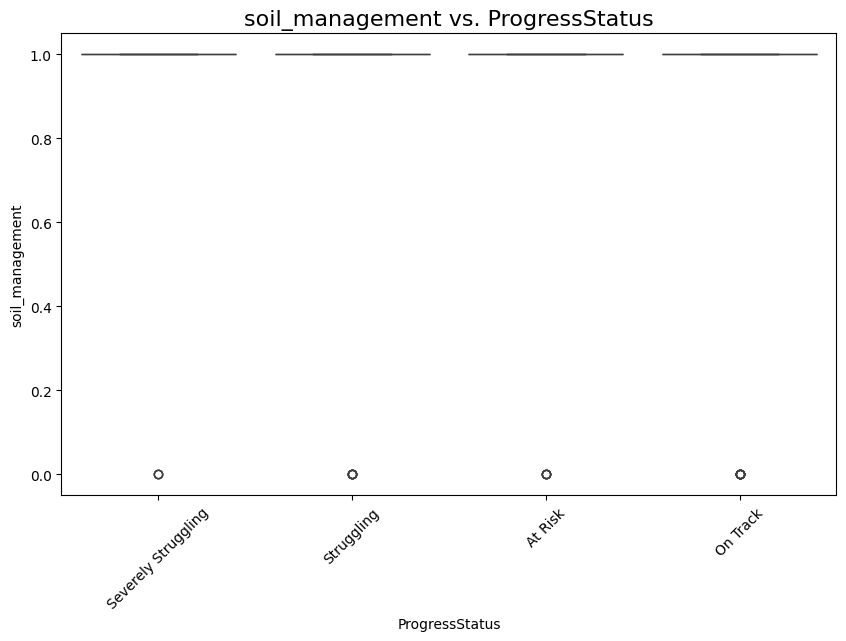

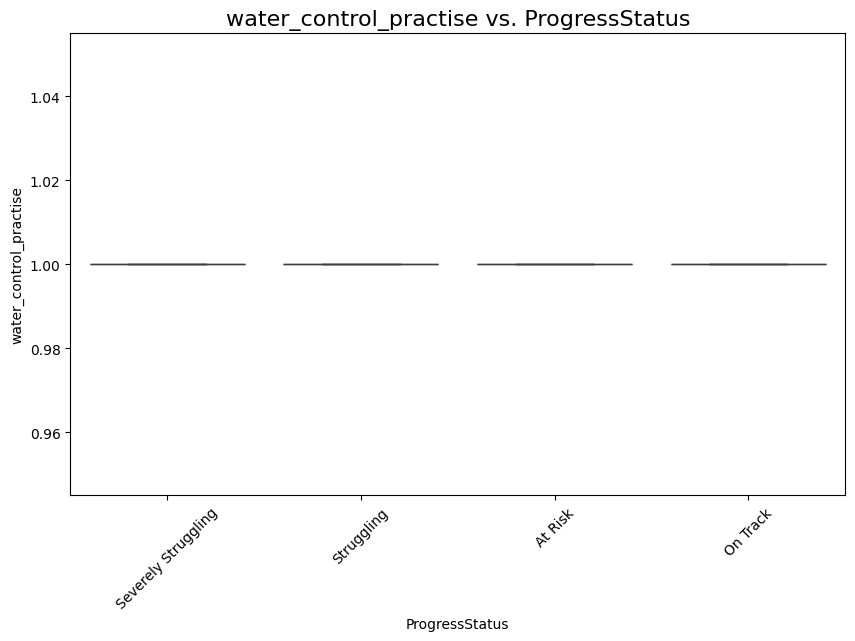

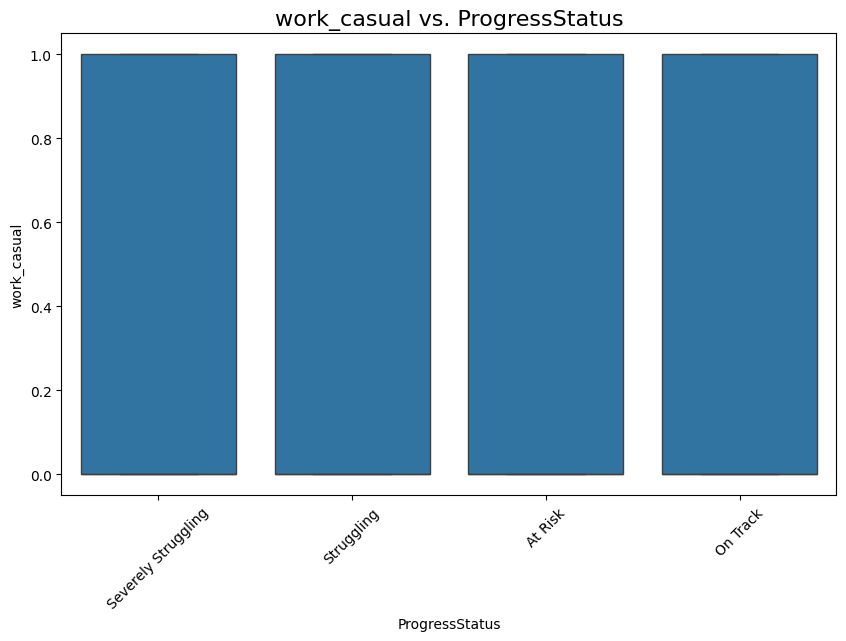

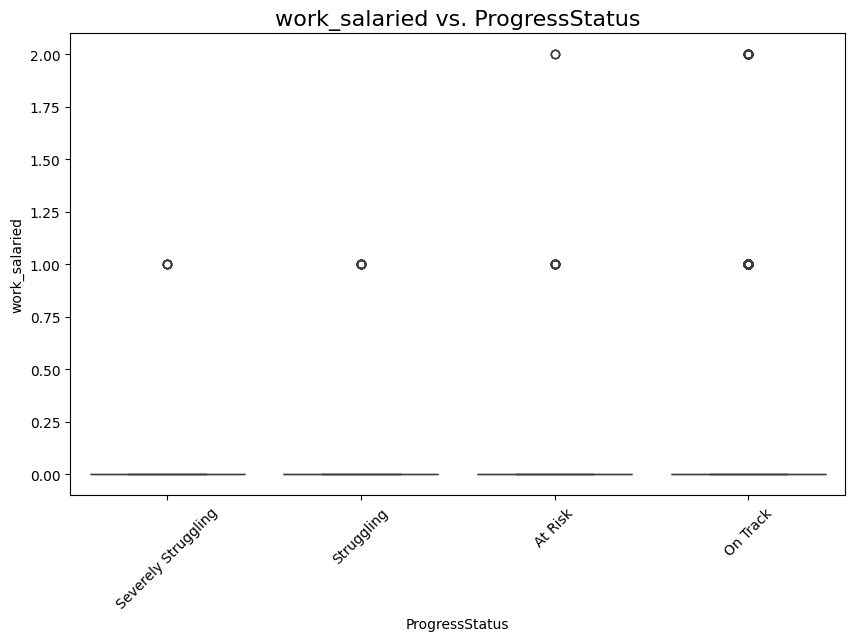

In [257]:
# Plot boxplots for numerical features against the target variable
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='ProgressStatus', y=feature, data=data)
    plt.title(f'{feature} vs. ProgressStatus', fontsize=16)
    plt.xticks(rotation=45)
    plt.show()

In [258]:
data.head()

District    Cluster    Village  Season1VegetableValue  \
0  Kanungu  Rutendere   Kangyeyo               3.920972   
1  Kanungu    Kihanda  Omurwambu               0.000000   
2  Kanungu   Bujengwe     Byumba               0.672167   
3  Kanungu   Bujengwe     Byumba               6.945722   
4  Kanungu   Bujengwe     Kazahi              38.089444   

   Season2VegetableValue  SeasonalVegetableValue  FormalEmployment  \
0               5.601389                9.522361               0.0   
1               1.344333                1.344333               0.0   
2               1.792444                2.464611               0.0   
3               0.000000                6.945722               0.0   
4               0.000000               38.089444               0.0   

   PersonalBusinessAndSelfEmployment  CasualLabour  RemittancesAndGifts  \
0                           0.000000     44.811111            33.608333   
1                           0.000000      0.000000             6.721667   
2                           0.000000     91.414667            26.886667   
3                           4.481111      0.000000             0.000000   
4                           0.000000      0.000000           123.230556   

   RentIncome  SeasonalCropIncome  SeasonalAgricValue  AgricValue  \
0         0.0           45.931389          119.421611  229.208833   
1         0.0           13.219278          132.752917  303.035139   
2         0.0           64.303944          144.403806  179.356472   
3         0.0          126.591389          262.458678  325.194233   
4         0.0           23.301778          103.289611  300.458500   

   LivestockIncomeConsumed  HHIncome+Consumption+Residues  \
0                      0.0                     307.628278   
1                      0.0                     309.756806   
2                      0.0                     297.657806   
3                      0.0                     329.675344   
4                      0.0                     423.689056   

   HHIncome+Consumption+Assets+Residues   Assets.1  Consumption/Day  \
0                            307.628278   0.000000         0.416191   
1                            309.756806   0.000000         0.511645   
2                            358.152806  60.495000         0.274698   
3                            385.689233  56.013889         0.468000   
4                            423.689056   0.000000         0.759333   

   HHIncome+Consumption+Assets+Residues/Day  hhh_sex  hhh_read_write  \
0                                  0.842817        2               0   
1                                  0.848649        1               1   
2                                  0.981241        2               1   
3                                  1.056683        1               1   
4                                  1.160792        2               1   

   Material_walls  radios_owned  phones_owned business_number  work_casual  \
0               2             1             1               0            1   
1               2             1             2               0            0   
2               2             0             0               0            1   
3               2             1             1               0            0   
4               1             2             2               0            0   

   work_salaried  save_mode_7 Loan_from  perennial_cropping  \
0              0            0         7                   1   
1              0            1         7                   1   
2              0            1         7                   1   
3              0            1         7                   1   
4              0            0         7                   1   

   household_fertilizer  daily_meals  composts  non_bio_waste_mgt_present  \
0                    99            2       0.0                          0   
1                    99            2       1.0                          1   
2                     1            2       0.0        

In [259]:
result = data['ProgressStatus'].value_counts()
df = result.reset_index(name = 'count')
#Add percentages column
df['percentage'] = round(df['count'] * 100/ df['count'].sum(),2)
print(df)

        ProgressStatus  count  percentage
0             On Track   1704       43.73
1           Struggling    901       23.12
2  Severely Struggling    757       19.43
3              At Risk    535       13.73


C:\Users\abyaruhanga\AppData\Local\Temp\ipykernel_3600\51467280.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='ProgressStatus', y='percentage', palette=colors)


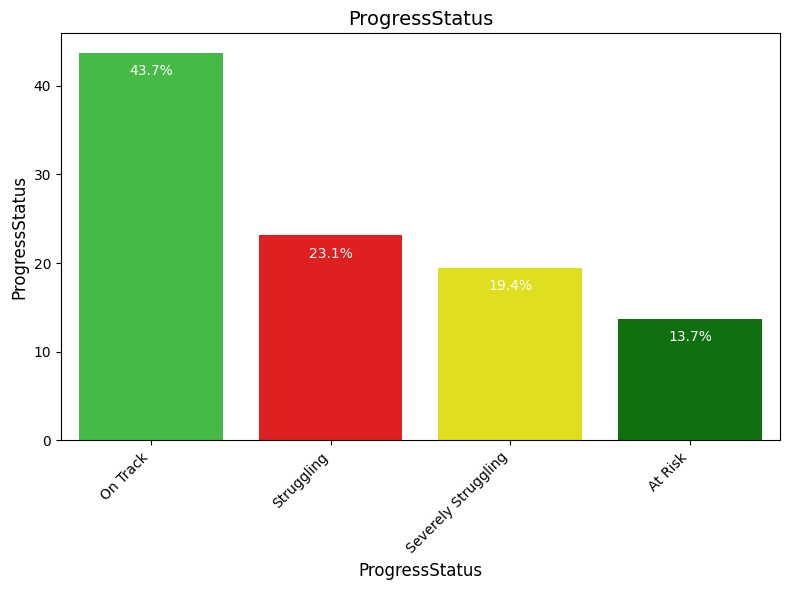

In [260]:
# Plot the histogram
colors = ['#32CD32','red','yellow','green'] # 'orange','chartreuse'
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='ProgressStatus', y='percentage', palette=colors)

# Annotate each bar with the number of orders inside the bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height - 2.5, f"{round(float(height),1)}%", ha="center", fontsize=10, color='white')

# Customize plot labels and title
plt.xlabel('ProgressStatus', fontsize=12)
plt.ylabel('ProgressStatus', fontsize=12)
plt.title('ProgressStatus', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [261]:
# Define feature types
numeric_features = data.select_dtypes(exclude='object').columns
categorical_features = data.select_dtypes(include='object').columns

In [262]:
print(numeric_features)

Index(['Season1VegetableValue', 'Season2VegetableValue',
       'SeasonalVegetableValue', 'FormalEmployment',
       'PersonalBusinessAndSelfEmployment', 'CasualLabour',
       'RemittancesAndGifts', 'RentIncome', 'SeasonalCropIncome',
       'SeasonalAgricValue', 'AgricValue', 'LivestockIncomeConsumed',
       'HHIncome+Consumption+Residues', 'HHIncome+Consumption+Assets+Residues',
       'Assets.1', 'Consumption/Day',
       'HHIncome+Consumption+Assets+Residues/Day', 'hhh_sex', 'hhh_read_write',
       'Material_walls', 'radios_owned', 'phones_owned', 'work_casual',
       'work_salaried', 'save_mode_7', 'perennial_cropping',
       'household_fertilizer', 'daily_meals', 'composts',
       'non_bio_waste_mgt_present', 'apply_liquid_manure',
       'organic_pesticide_expenditure', 'water_control_practise',
       'soil_management', 'postharvest_food_storage',
       'Income_per_Household_Member', 'Total_Crop_Income', 'Total_Agric_Value',
       'Total_Time_to_Services', 'Total_VSLA_P

In [263]:
print(categorical_features)

Index(['District', 'Cluster', 'Village', 'business_number', 'Loan_from',
       'food_banana_wilt_diseases', 'ProgressStatus'],
      dtype='object')


In [264]:
data = data.replace(np.inf, 0)
data.head()

District    Cluster    Village  Season1VegetableValue  \
0  Kanungu  Rutendere   Kangyeyo               3.920972   
1  Kanungu    Kihanda  Omurwambu               0.000000   
2  Kanungu   Bujengwe     Byumba               0.672167   
3  Kanungu   Bujengwe     Byumba               6.945722   
4  Kanungu   Bujengwe     Kazahi              38.089444   

   Season2VegetableValue  SeasonalVegetableValue  FormalEmployment  \
0               5.601389                9.522361               0.0   
1               1.344333                1.344333               0.0   
2               1.792444                2.464611               0.0   
3               0.000000                6.945722               0.0   
4               0.000000               38.089444               0.0   

   PersonalBusinessAndSelfEmployment  CasualLabour  RemittancesAndGifts  \
0                           0.000000     44.811111            33.608333   
1                           0.000000      0.000000             6.721667   
2                           0.000000     91.414667            26.886667   
3                           4.481111      0.000000             0.000000   
4                           0.000000      0.000000           123.230556   

   RentIncome  SeasonalCropIncome  SeasonalAgricValue  AgricValue  \
0         0.0           45.931389          119.421611  229.208833   
1         0.0           13.219278          132.752917  303.035139   
2         0.0           64.303944          144.403806  179.356472   
3         0.0          126.591389          262.458678  325.194233   
4         0.0           23.301778          103.289611  300.458500   

   LivestockIncomeConsumed  HHIncome+Consumption+Residues  \
0                      0.0                     307.628278   
1                      0.0                     309.756806   
2                      0.0                     297.657806   
3                      0.0                     329.675344   
4                      0.0                     423.689056   

   HHIncome+Consumption+Assets+Residues   Assets.1  Consumption/Day  \
0                            307.628278   0.000000         0.416191   
1                            309.756806   0.000000         0.511645   
2                            358.152806  60.495000         0.274698   
3                            385.689233  56.013889         0.468000   
4                            423.689056   0.000000         0.759333   

   HHIncome+Consumption+Assets+Residues/Day  hhh_sex  hhh_read_write  \
0                                  0.842817        2               0   
1                                  0.848649        1               1   
2                                  0.981241        2               1   
3                                  1.056683        1               1   
4                                  1.160792        2               1   

   Material_walls  radios_owned  phones_owned business_number  work_casual  \
0               2             1             1               0            1   
1               2             1             2               0            0   
2               2             0             0               0            1   
3               2             1             1               0            0   
4               1             2             2               0            0   

   work_salaried  save_mode_7 Loan_from  perennial_cropping  \
0              0            0         7                   1   
1              0            1         7                   1   
2              0            1         7                   1   
3              0            1         7                   1   
4              0            0         7                   1   

   household_fertilizer  daily_meals  composts  non_bio_waste_mgt_present  \
0                    99            2       0.0                          0   
1                    99            2       1.0                          1   
2                     1            2       0.0        

In [265]:
#Model Development

In [266]:
#Non ML model
#Multinomial Logistic Regression


In [267]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [268]:
#Transform Target Variable
label_encoder = LabelEncoder()
data['ProgressStatus'] = label_encoder.fit_transform(data['ProgressStatus'])

In [269]:
print(data['ProgressStatus'].sample(5))

46      3
1172    3
3811    1
2248    3
3745    1
Name: ProgressStatus, dtype: int32


In [270]:
# Features and target variable
X = data.drop(columns=['ProgressStatus'])
y = data['ProgressStatus']

In [271]:
# Define feature types
numeric_features = data.select_dtypes(exclude='object').columns
categorical_features = data.select_dtypes(include='object').columns

In [272]:
print(numeric_features)

Index(['Season1VegetableValue', 'Season2VegetableValue',
       'SeasonalVegetableValue', 'FormalEmployment',
       'PersonalBusinessAndSelfEmployment', 'CasualLabour',
       'RemittancesAndGifts', 'RentIncome', 'SeasonalCropIncome',
       'SeasonalAgricValue', 'AgricValue', 'LivestockIncomeConsumed',
       'HHIncome+Consumption+Residues', 'HHIncome+Consumption+Assets+Residues',
       'Assets.1', 'Consumption/Day',
       'HHIncome+Consumption+Assets+Residues/Day', 'hhh_sex', 'hhh_read_write',
       'Material_walls', 'radios_owned', 'phones_owned', 'work_casual',
       'work_salaried', 'save_mode_7', 'perennial_cropping',
       'household_fertilizer', 'daily_meals', 'composts',
       'non_bio_waste_mgt_present', 'apply_liquid_manure',
       'organic_pesticide_expenditure', 'water_control_practise',
       'soil_management', 'postharvest_food_storage',
       'Income_per_Household_Member', 'Total_Crop_Income', 'Total_Agric_Value',
       'Total_Time_to_Services', 'Total_VSLA_P

In [273]:
print(categorical_features)

Index(['District', 'Cluster', 'Village', 'business_number', 'Loan_from',
       'food_banana_wilt_diseases'],
      dtype='object')


In [274]:
from sklearn.preprocessing import OneHotEncoder

# Define the columns to be one-hot encoded
columns_to_encode = data.select_dtypes(include='object').columns

encoder = OneHotEncoder(handle_unknown='ignore')

X_encoded = encoder.fit_transform(X[columns_to_encode])

X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(columns_to_encode))

X_preprocessed = pd.concat([X.drop(columns=columns_to_encode), X_encoded_df], axis=1)

In [275]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X =st.fit_transform(X_preprocessed)


In [276]:
X.shape

(3897, 249)

In [277]:
X

array([[-0.32571497, -0.14300381, -0.30680212, ...,  0.22826702,
        -0.06420786, -0.03205441],
       [-0.42103568, -0.25188743, -0.43893182, ...,  0.22826702,
        -0.06420786, -0.03205441],
       [-0.40469499, -0.240426  , -0.42083186, ..., -4.38083438,
        -0.06420786, -0.03205441],
       ...,
       [ 2.52028919,  1.74813276,  2.77924073, ...,  0.22826702,
        -0.06420786, -0.03205441],
       [ 4.78619873,  3.38138708,  5.31685486, ...,  0.22826702,
        -0.06420786, -0.03205441],
       [ 0.37965831,  0.52863621,  0.58624981, ...,  0.22826702,
        -0.06420786, -0.03205441]])

In [278]:
# Split data into training and test sets and define a model

In [279]:
model_df = {}

def model_val(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"{model} accuracy is {round(accuracy * 100, 2)}%")
    print("Classification Report:")
    print(report)

In [280]:
#Multinomial Logistic Regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_val(model,X,y)


LogisticRegression(max_iter=1000, multi_class='multinomial') accuracy is 90.9%
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       115
           1       0.96      0.97      0.96       347
           2       0.95      0.90      0.93       135
           3       0.86      0.89      0.87       183

    accuracy                           0.91       780
   macro avg       0.89      0.88      0.89       780
weighted avg       0.91      0.91      0.91       780



In [281]:
#Machine Learning models
#Used Models are Support vector machine, Decision tree classifier, Random forest classifer, Gradient Boosting Classifier

In [282]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [283]:
#Split data into train Set, test Set & Applying K-Fold Cross Validation 
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    
    
    score = cross_val_score(model,X,y,cv=5)
    
    print(f"{model} Avg cross val score is {np.mean(score)}")
    
    report = classification_report(y_test, y_pred)
    print(f"{model} classification_report is {classification_report(y_test, y_pred)}")
    model_df[model]=round(np.mean(score)*100,2)

In [284]:
model_df

{}

In [285]:
#SVC
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.7243589743589743
SVC() Avg cross val score is 0.6533260919653732
SVC() classification_report is               precision    recall  f1-score   support

           0       0.28      0.12      0.17       115
           1       0.87      0.93      0.90       347
           2       0.83      0.68      0.75       135
           3       0.55      0.75      0.63       183

    accuracy                           0.72       780
   macro avg       0.63      0.62      0.61       780
weighted avg       0.70      0.72      0.70       780



In [286]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 1.0
DecisionTreeClassifier() Avg cross val score is 0.9997435897435898
DecisionTreeClassifier() classification_report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       347
           2       1.00      1.00      1.00       135
           3       1.00      1.00      1.00       183

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



In [287]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.9794871794871794
RandomForestClassifier() Avg cross val score is 0.955603502188868
RandomForestClassifier() classification_report is               precision    recall  f1-score   support

           0       0.95      0.93      0.94       115
           1       0.99      0.99      0.99       347
           2       1.00      0.99      0.99       135
           3       0.96      0.98      0.97       183

    accuracy                           0.98       780
   macro avg       0.98      0.97      0.97       780
weighted avg       0.98      0.98      0.98       780



In [288]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier() accuracy is 1.0
GradientBoostingClassifier() Avg cross val score is 0.9997435897435898
GradientBoostingClassifier() classification_report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       347
           2       1.00      1.00      1.00       135
           3       1.00      1.00      1.00       183

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



In [289]:
#Save the best Model

#Decision tree of the 4 models used is the best with accuracy 1.0 and Avg cross val score of 0.9997435897435898

X = data.drop('ProgressStatus',axis=1)
y = data['ProgressStatus']

In [290]:
#Decision Tree (DT)
DT = DecisionTreeClassifier(
    min_samples_split=5,     # Minimum number of samples required to split a node
    min_samples_leaf=5,      # Minimum number of samples required at a leaf node
    max_depth=5,             # Maximum depth of the tree
    max_features='sqrt'      # Number of features to consider when looking for the best split
)

In [291]:
DT.fit(X_preprocessed,y)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5)

In [292]:
from tkinter import *
from PIL import Image, ImageTk
from datetime import date
from tkinter import StringVar
from tkinter import filedialog
from tkinter import messagebox
from tkcalendar import DateEntry
import os
from tkinter.ttk import Combobox
import openpyxl,xlrd
from openpyxl import Workbook
import pathlib


def validate_fields():
    if not Name.get() or not NIN.get():
        messagebox.showerror("Error", "HouseHoldID and District are mandatory fields.")
        return False
    return True

background = "orange"

root = Tk() 
root.title("RTV Poverty Detection System")
root.geometry("1200x700+100+3")
root.resizable(False, False) 
root.configure(bg=background)



# Top
Label(root, text="Powered by: Andrew Byaruhanga Interview", width=10, height=1, bg="orange", anchor='e').pack(side=TOP, fill=X)
Label(root, text="RTV Poverty Detection System ", width=10, height=1, bg="orange", fg="white", font="Arial 20 bold").pack(side=TOP, fill=X)


framebg = "#EDEDED"
framefg = "#1f77b4"

#National Identification number/Financial card number
Label(root,text="HouseHoldID:",font = "arial 13",fg= framebg, bg=background).place(x=200, y=65)
NIN = StringVar()
NIN_entry = Entry(root, textvariable=NIN, width=15,font="arial 13")
NIN_entry.place(x=370,y=67)

#Loan Application Date
Label(root,text="Date:",font = "arial 13",fg= framebg, bg=background).place(x=700, y=65)
Date = StringVar()
today = date.today()
curr_date = today.strftime("%d/%m/%Y")
date_entry = Entry(root,textvariable=Date,width=15,font="arial 13")
date_entry.place(x=923,y=65)
Date.set(curr_date)

#Static Details
obj = LabelFrame(root,text = "Static Details",font=20,bd=2,width=1145,bg=framebg,fg=framefg,height=500,relief=GROOVE)
obj.place(x=20,y=105)
Label(obj,text="District:",font = "arial 13",bg= framebg, fg=framefg).place(x=30, y=15)
Label(obj,text="HouseHoldSize:",font = "arial 13",bg= framebg, fg=framefg).place(x=30, y=45)
Label(obj,text="AgricultureLand:",font = "arial 13",bg= framebg, fg=framefg).place(x=30, y=75)
Label(obj,text="VSLA_Profits:",font = "arial 13",bg= framebg, fg=framefg).place(x=30, y=105)
Label(obj,text="RentIncome:",font = "arial 13",bg= framebg, fg=framefg).place(x=30, y=135)
Label(obj,text="LivestockIncome:",font = "arial 13",bg= framebg, fg=framefg).place(x=30, y=165)
Label(obj,text="Assets:",font = "arial 13",bg= framebg, fg=framefg).place(x=30, y=195)


Label(obj,text="Material_walls:",font = "arial 13",bg= framebg, fg=framefg).place(x=600, y=15)
Label(obj,text="radios_owned:",font = "arial 13",bg= framebg, fg=framefg).place(x=600, y=45)
Label(obj,text="standard_hangline:",font = "arial 13",bg= framebg, fg=framefg).place(x=600, y=75)
Label(obj,text="composts:",font = "arial 13",bg= framebg, fg=framefg).place(x=600, y=105)
Label(obj,text="soil_management:",font = "arial 13",bg= framebg, fg=framefg).place(x=600, y=135)
Label(obj,text="food_banana_wilt_diseases:",font = "arial 13",bg= framebg, fg=framefg).place(x=600, y=165)
Label(obj,text="daily_meals:",font = "arial 13",bg= framebg, fg=framefg).place(x=600, y=195)


Label(obj,text="work_salaried:",font = "arial 13",bg= framebg, fg=framefg).place(x=30, y=15)
Label(obj,text="Loan_from:",font = "arial 13",bg= framebg, fg=framefg).place(x=30, y=45)
Label(obj,text="HHIncome/Day:",font = "arial 13",bg= framebg, fg=framefg).place(x=30, y=75)
Label(obj,text="Consumption/Day:",font = "arial 13",bg= framebg, fg=framefg).place(x=30, y=105)


# The ProgressStatus decision
calculate_button = Button(root, text="ProgressStatus", command=get_approved_value)
calculate_button.place(x=3700, y=900, height=20)


root.mainloop()